<a href="https://colab.research.google.com/github/harvey-py/COMP3010/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages

In [287]:
# Basics
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import os
import time

# Regression
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ML Tools
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# RF
from sklearn.ensemble import RandomForestRegressor

# XGB
import xgboost as xgb
from xgboost import XGBRegressor

# NN
import math
import torch
import torch.nn as nn
import tensorflow
import optuna
import optuna.visualization as opt_vis
import copy

## Config

In [2]:
# working_dir = "~/Documents/GitHub/COMP3010/Assignment/Data/"

# train_dir = os.path.join(working_dir, "train.csv")
# test_dir = os.path.join(working_dir, "test.csv")

train_dir = "https://raw.githubusercontent.com/harvey-py/COMP3010/main/Assignment/Data/train.csv"
test_dir = "https://raw.githubusercontent.com/harvey-py/COMP3010/main/Assignment/Data/test.csv"

## Importing Data

In [3]:
raw_data = pd.read_csv(train_dir)
raw_data.rename(columns = {"Target Pressure (bar)": "tgt_pressure"}, inplace = True)

In [4]:
raw_test_data = pd.read_csv(test_dir)
raw_test_data.rename(columns = {"Target Pressure (bar)": "tgt_pressure"}, inplace = True)

# Exploratory Analysis

## Variables

In [5]:
raw_data.columns

Index(['ID', 'Tank Failure Pressure (bar)', 'Liquid Ratio (%)',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Status', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor ID', 'Sensor Position Side', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'tgt_pressure'],
      dtype='object')

In [6]:
raw_data

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0       3203.0                         7.32              0.42            2.42   
1       3204.0                         7.18              0.42            2.39   
2       3205.0                         7.32              0.41            2.39   
3       3206.0                         7.26              0.42            2.40   
4       3207.0                         7.32              0.42            2.40   
...        ...                          ...               ...             ...   
10045  10244.0                        36.91              0.64            1.58   
10046  12758.0                        16.44              0.55            0.80   
10047   9438.0                        36.26              0.57            2.38   
10048   8689.0                        14.27              0.50            2.21   
10049  10302.0                        35.52              0.63            1.60   

       Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0                 5.39             1.00              1.79               0.60   
1                 5.39             1.01              1.81               0.59   
2                 5.38             1.00              1.78               0.62   
3                 5.41             1.00              1.81               0.61   
4                 5.41             1.02              1.79               0.62   
...                ...              ...               ...                ...   
10045             9.39             0.58              1.01               0.22   
10046             5.58             1.99              1.60               0.82   
10047             2.62             2.80              0.60               1.19   
10048             8.40             2.58              1.62               1.40   
10049             7.21             1.60              1.00               0.59   

       Vapour Temperature (K)  Liquid Temperature (K)  ...       Status  \
0                      524.61                  354.49  ...  Superheated   
1                      522.80                  354.31  ...  Superheated   
2                      523.00                  354.59  ...  Superheated   
3                      522.35                  354.37  ...  Superheated   
4                      522.98                  354.33  ...  Superheated   
...                       ...                     ...  ...          ...   
10045                  442.31                  299.28  ...    Subcooled   
10046                  293.54                  285.02  ...    Subcooled   
10047                  349.75                  418.53  ...    Subcooled   
10048                  288.61                  396.96  ...  Superheated   
10049                  436.28                  309.79  ...    Subcooled   

       Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0                                37.9                            -1.0   
1                                37.9                            -1.0   
2                                37.9                            -1.0   
3                                37.9                            -1.0   
4                                37.9                            -1.0   
...                               ...                             ...   
10045                            37.9                             NaN   
10046                            37.9                            -1.0   
10047                            37.9                            -1.0   
10048                            37.9                            -1.0   
10049                            42.5                           -42.0   

       Liquid Critical Temperature (K)  Sensor ID Sensor Position Side  \
0                                152.0       18.0                  2.0   
1                                152.0       19.0                  3.0   
2                                152.0       20.0                  3.0   
3   

## Plots

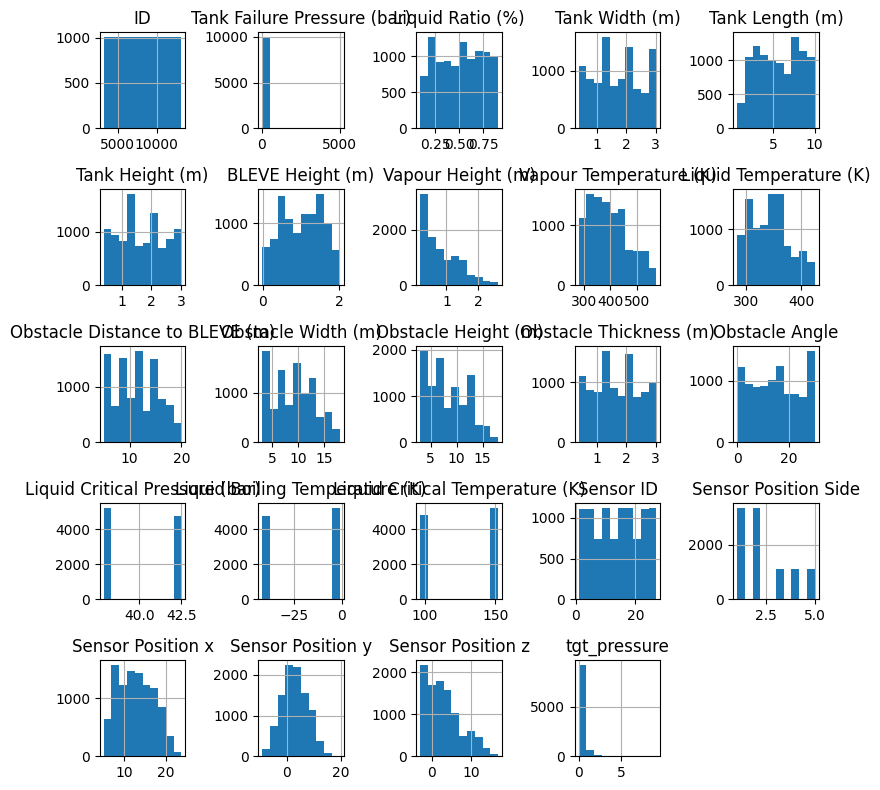

In [7]:
raw_data.hist(figsize = (8,8))
plt.tight_layout()
plt.show()

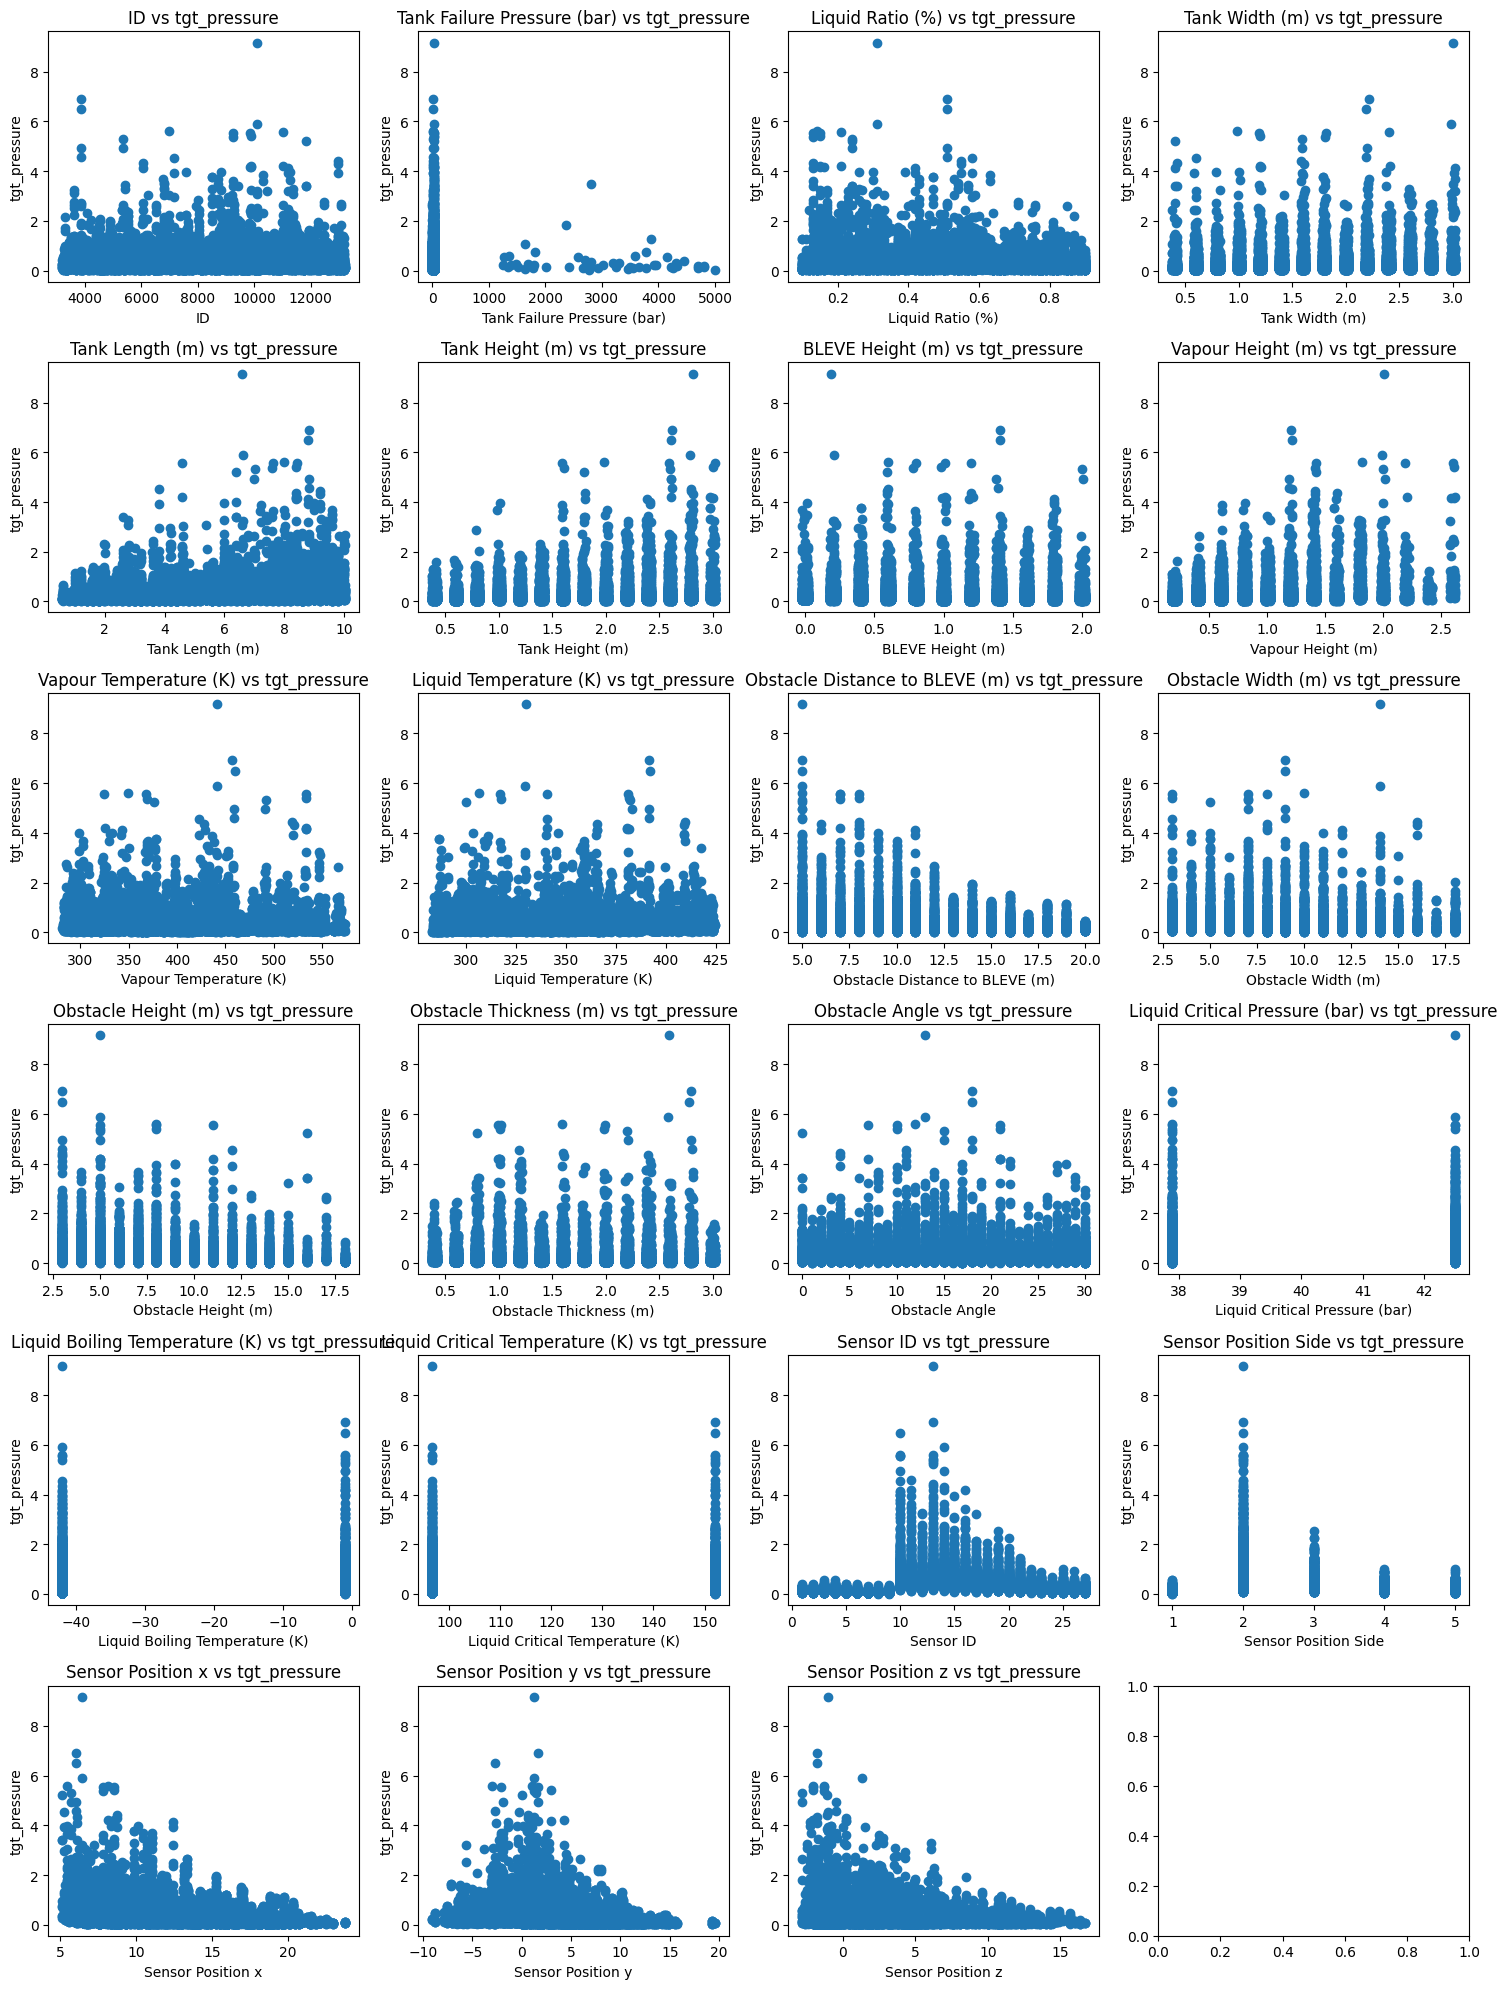

In [8]:
raw_data_num = raw_data.select_dtypes(include=[np.number])

n_cols = 4
n_rows = int(len(raw_data_num.columns) / n_cols) + (len(raw_data_num.columns) % n_cols > 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for i, col_name in enumerate(raw_data_num.columns):
    if col_name != "tgt_pressure":
        ax = axs[i//n_cols, i%n_cols]
        ax.scatter(raw_data_num[col_name], raw_data_num["tgt_pressure"])
        ax.set_title(f"{col_name} vs tgt_pressure")
        ax.set_xlabel(col_name)
        ax.set_ylabel("tgt_pressure")

plt.tight_layout()
plt.show()

In [9]:
raw_data_num.corr().style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [10]:
raw_data_num.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [11]:
raw_data_num["Volume"] = raw_data_num["Tank Length (m)"] * raw_data_num["Tank Height (m)"]

In [12]:
## TURN OFF NIGHT READER WHEN VIEWING CORRPLOTS
raw_data_num.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

# Data Preprocessing

## Missing Values

In [13]:
raw_nans = raw_data[raw_data.isna().any(axis = 1)]
print(f"{len(raw_nans)} points with NaNs out of {len(raw_data)} ({len(raw_nans)/len(raw_data)*100:.3f}%)")

112 points with NaNs out of 10050 (1.114%)


In [14]:
# 1: Removing NaNs
raw_data1 = raw_data.dropna()

## Outliers

In [15]:
outlier_df = raw_data1.drop("ID", axis = 1).select_dtypes(exclude=['object']).copy()

<Axes: >

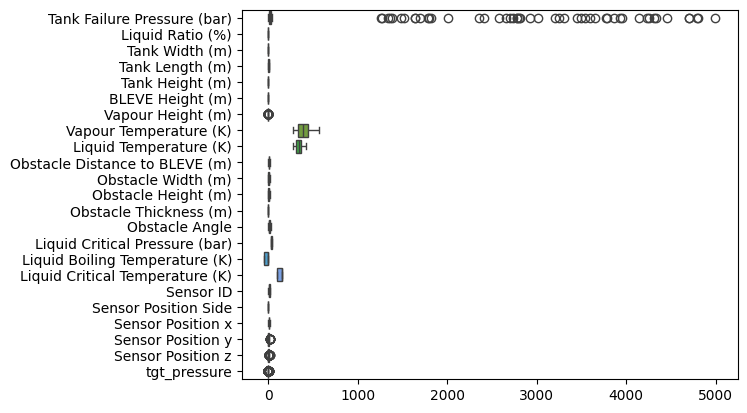

In [16]:
sns.boxplot(outlier_df, orient = "h")

It is apparent that "Tank Failure Pressure" has a large amount of outliers. We'll investigate this further below

In [17]:
outlier_count = len(raw_data1.query("`Tank Failure Pressure (bar)` > 1000"))

In [18]:
outlier_df.sort_values("Tank Failure Pressure (bar)", ascending = False, inplace = True)
display(outlier_df.head())
display(outlier_df.iloc[outlier_count - 3 : outlier_count + 3])

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
4634                  4995.616406              0.73            1.60   
1401                  4807.927645              0.16            0.81   
1198                  4796.894538              0.53            1.19   
9558                  4703.637237              0.55            0.78   
9375                  4702.296095              0.14            2.81   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
4634             8.02             2.39              0.79               0.59   
1401             1.02             2.00              1.21               1.61   
1198             7.58             2.41              1.38               1.18   
9558             5.62             1.99              1.60               0.79   
9375             1.02             1.59              0.82               1.41   

      Vapour Temperature (K)  Liquid Temperature (K)  \
4634                  362.35                  300.93   
1401                  403.73                  330.31   
1198                  407.90                  306.97   
9558                  293.89                  285.08   
9375                  368.05                  332.95   

      Obstacle Distance to BLEVE (m)  ...  Obstacle Angle  \
4634                            11.0  ...             8.0   
1401                            17.0  ...            28.0   
1198                             8.0  ...            10.0   
9558                            15.0  ...            17.0   
9375                             6.0  ...            15.0   

      Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
4634                            42.5                           -42.0   
1401                            42.5                           -42.0   
1198                            42.5                           -42.0   
9558                            37.9                            -1.0   
9375                            42.5                           -42.0   

      Liquid Critical Temperature (K)  Sensor ID  Sensor Position Side  \
4634                             96.7        8.0                   1.0   
1401                             96.7       15.0                   2.0   
1198                             96.7        1.0                   1.0   
9558                            152.0       18.0                   2.0   
9375                             96.7       24.0                   4.0   

      Sensor Position x  Sensor Position y  Sensor Position z  tgt_pressure  
4634              14.65                7.4                5.4      0.042548  
1401              17.35                9.0                5.8      0.130719  
1198               9.85               -0.4               -1.8      0.177109  
9558              15.35                9.9                3.8      0.177894  
9375               8.40                8.4               10.6      0.120019  

[5 rows x 23 columns]

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
1738                  1342.242706              0.20            1.21   
2484                  1270.544969              0.85            2.41   
4647                  1257.523808              0.73            1.61   
5690                    42.180000              0.43            1.80   
5696                    42.160000              0.43            1.80   
5700                    42.120000              0.43            1.82   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
1738             6.22             1.01              0.21               0.78   
2484             5.58             2.38              0.18               0.40   
4647             7.98             2.41              0.81               0.62   
5690             9.80             1.40              0.41               0.82   
5696             9.78             1.42              0.39               0.82   
5700             9.79             1.38              0.39               0.78   

      Vapour Temperature (K)  Liquid Temperature (K)  \
1738                  444.49                  405.76   
2484                  357.61                  378.31   
4647                  362.27                  301.04   
5690                  418.83                  297.97   
5696                  419.09                  298.10   
5700                  419.70                  298.00   

      Obstacle Distance to BLEVE (m)  ...  Obstacle Angle  \
1738                             5.0  ...            18.0   
2484                            11.0  ...            18.0   
4647                            11.0  ...             8.0   
5690                            10.0  ...            19.0   
5696                            10.0  ...            19.0   
5700                            10.0  ...            19.0   

      Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
1738                            37.9                            -1.0   
2484                            37.9                            -1.0   
4647                            42.5                           -42.0   
5690                            42.5                           -42.0   
5696                            42.5                           -42.0   
5700                            42.5                           -42.0   

      Liquid Critical Temperature (K)  Sensor ID  Sensor Position Side  \
1738                            152.0        1.0                   1.0   
2484                            152.0       18.0                   2.0   
4647                             96.7       21.0                   3.0   
5690                             96.7       11.0                   2.0   
5696                             96.7       17.0                   2.0   
5700                             96.7       21.0                   3.0   

      Sensor Position x  Sensor Position y  Sensor Position z  tgt_pressure  
1738               8.65              -0.70               -0.4      0.147148  
2484              12.15               5.90                7.4      0.546492  
4647              13.20              -4.45               11.7      0.236112  
5690              10.85               1.60                2.2      1.965685  
5696              10.85               5.20                2.2      1.428485  
5700              12.30               1.35                5.0      0.877835  

[6 rows x 23 columns]

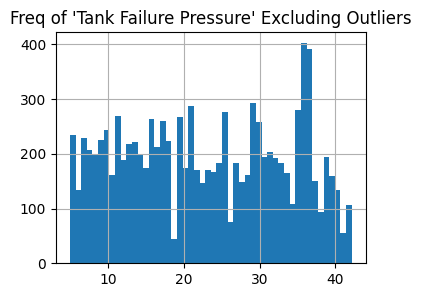



## Smallest 10 values ##


9406    4.92
9422    4.93
9425    4.96
9410    4.97
9417    4.98
9432    5.00
9427    5.00
9421    5.04
5423    5.05
9429    5.06
Name: Tank Failure Pressure (bar), dtype: float64

In [19]:
outlier_df.iloc[outlier_count:]["Tank Failure Pressure (bar)"].hist(bins = 50, figsize = (4,3))
plt.title("Freq of 'Tank Failure Pressure' Excluding Outliers")
plt.show()

print("\n\n## Smallest 10 values ##")
display(outlier_df["Tank Failure Pressure (bar)"].nsmallest(10))

We can see that 1) the outlier values are in the range [1000,5000] and that all the remaining values are roughly between 4 and 40. If we consider for the fact that another popular unit of measurement for pressure, kPa, is 100x the value of bar, these outlier values now make sense and don't appear to be outlier values anymore. Given that these sort of errors are present throughout the data (e.g. use of C instead of K in temperature, mentioned later) and the fact that the rest of the values for these "outlier" data points appear to be reasonable, it appears to be fair to assume that these values are simple recording errors and should be divided by 100, rather than removed.

In [20]:
outlier_df.loc[outlier_df['Tank Failure Pressure (bar)'] > 1000, 'Tank Failure Pressure (bar)'] /= 100

<Axes: >

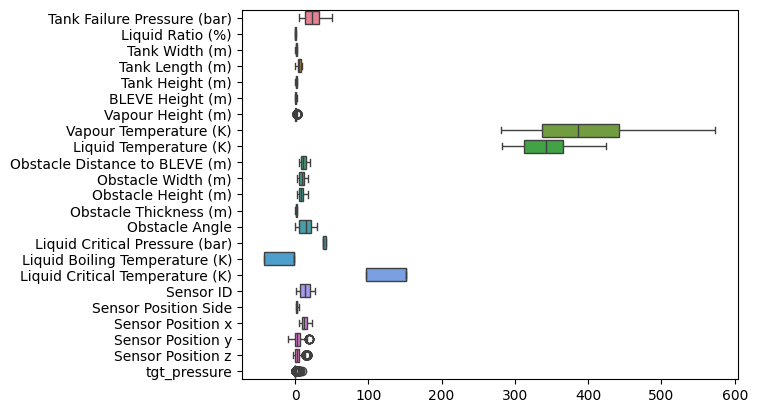

In [21]:
sns.boxplot(outlier_df, orient = "h")

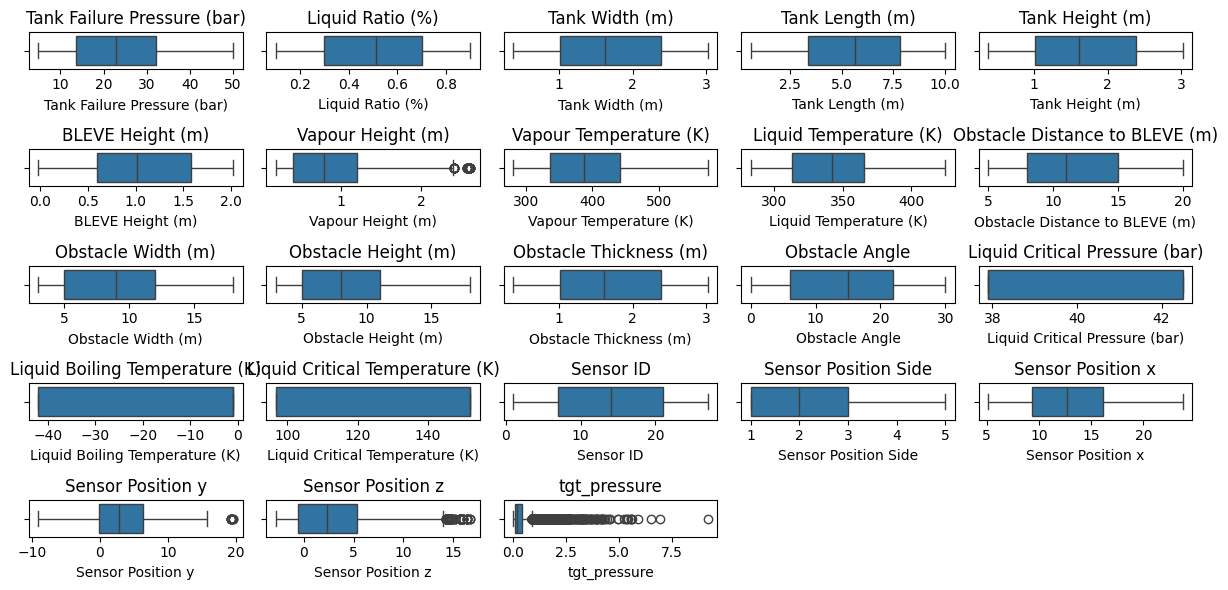

In [22]:
fig, axes = plt.subplots(nrows= 5, ncols=5, figsize=(12, 6))
axes = axes.flatten()

# Plot each boxplot in a separate subplot
for i, column in enumerate(outlier_df.columns):
    sns.boxplot(x=outlier_df[column], ax=axes[i])
    axes[i].set_title(f'{column}')

for j in range(len(outlier_df.columns), len(axes)):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

We can see that most columns do not contain outliers in the strict "1.5 * IQR" sense; only "Vapour Height (m)", "Sensor Position y", "Sensor Position z" and "tgt_pressure" do. Below are the histograms for each of these columns.

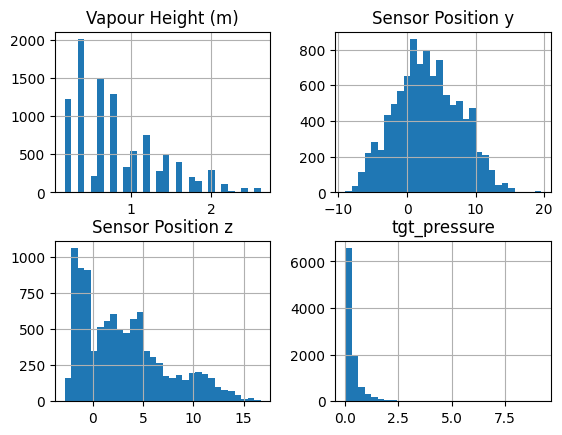

In [23]:
outlier_df[["Vapour Height (m)", "Sensor Position y", "Sensor Position z", "tgt_pressure"]].hist(bins = 30)
plt.show()

In [24]:
outlier_df.query("`Sensor Position y` > 18").sort_index()

Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
5443                         8.90              0.37            1.20   
5444                         8.90              0.37            1.22   
5445                         8.85              0.36            1.22   
5452                         8.88              0.36            1.22   
5453                         8.88              0.37            1.21   
5454                         8.82              0.37            1.19   
5460                         8.99              0.37            1.19   
5461                         8.88              0.37            1.20   
5462                         9.05              0.37            1.18   
5463                         8.82              0.37            1.20   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
5443             3.20             2.21              0.41               1.42   
5444             3.20             2.21              0.39               1.39   
5445             3.20             2.19              0.41               1.41   
5452             3.21             2.21              0.40               1.40   
5453             3.19             2.21              0.42               1.41   
5454             3.19             2.22              0.41               1.42   
5460             3.21             2.22              0.42               1.38   
5461             3.18             2.18              0.41               1.39   
5462             3.21             2.20              0.41               1.39   
5463             3.21             2.20              0.39               1.41   

      Vapour Temperature (K)  Liquid Temperature (K)  \
5443                  352.88                  343.07   
5444                  351.56                  343.28   
5445                  352.50                  342.98   
5452                  351.55                  343.11   
5453                  351.88                  342.87   
5454                  350.64                  343.46   
5460                  351.33                  343.17   
5461                  351.03                  342.86   
5462                  351.57                  343.49   
5463                  351.48                  344.13   

      Obstacle Distance to BLEVE (m)  ...  Obstacle Angle  \
5443                            19.0  ...            30.0   
5444                            19.0  ...            30.0   
5445                            19.0  ...            30.0   
5452                            19.0  ...            30.0   
5453                            19.0  ...            30.0   
5454                            19.0  ...            30.0   
5460                            19.0  ...            30.0   
5461                            19.0  ...            30.0   
5462                            19.0  ...            30.0   
5463                            19.0  ...            30.0   

      Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
5443                            42.5                           -42.0   
5444                            42.5                           -42.0   
5445                            42.5                           -42.0   
5452                            42.5                           -42.0   
5453                            42.5                           -42.0   
5454                            42.5                           -42.0   
5460                            42.5                           -42.0   
5461                            42.5                           -42.0   
5462                            42.5                           -42.0   
5463                            42.5                           -42.0   

      Liquid Critical Temperature (K)  Sensor ID  Sensor Position Side  \
5443                             96.7        7.0                   1.0   
5444                             96.7        8.0                   1.0   
5445                             96.7        9.0  

We can see that the first 3 variables distributions appear to be normal. It appears that all the outlier values for "Sensor Position y" come from the same event, so the "outliers" appear to instead be reasonable values that should not be excluded from our data. 

However, the data for tgt_pressure appears to be more prone to outliers (as there is a large gap in the middle and right of the graph). This is looked into further below

<Axes: >

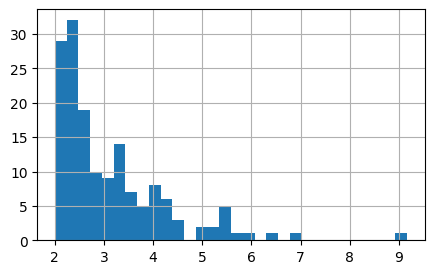

In [25]:
outlier_df.query("`tgt_pressure` > 2")["tgt_pressure"].hist(bins = 30, figsize = (5,3))

In [26]:
outlier_df.sort_values("tgt_pressure", ascending = False).head(10).T

6907        670         667   \
Tank Failure Pressure (bar)       26.150000   25.570000   25.600000   
Liquid Ratio (%)                   0.310000    0.510000    0.510000   
Tank Width (m)                     3.000000    2.220000    2.190000   
Tank Length (m)                    6.580000    8.810000    8.780000   
Tank Height (m)                    2.820000    2.620000    2.610000   
BLEVE Height (m)                   0.190000    1.410000    1.410000   
Vapour Height (m)                  2.010000    1.200000    1.210000   
Vapour Temperature (K)           440.780000  456.360000  459.640000   
Liquid Temperature (K)           329.900000  391.820000  391.920000   
Obstacle Distance to BLEVE (m)     5.000000    5.000000    5.000000   
Obstacle Width (m)                14.000000    9.000000    9.000000   
Obstacle Height (m)                5.000000    3.000000    3.000000   
Obstacle Thickness (m)             2.590000    2.800000    2.780000   
Obstacle Angle                    13.000000   18.000000   18.000000   
Liquid Critical Pressure (bar)    42.500000   37.900000   37.900000   
Liquid Boiling Temperature (K)   -42.000000   -1.000000   -1.000000   
Liquid Critical Temperature (K)   96.700000  152.000000  152.000000   
Sensor ID                         13.000000   13.000000   10.000000   
Sensor Position Side               2.000000    2.000000    2.000000   
Sensor Position x                  6.450000    6.050000    6.050000   
Sensor Position y                  1.200000    1.600000   -2.700000   
Sensor Position z                 -1.000000   -1.800000   -1.800000   
tgt_pressure                       9.170477    6.916218    6.492666   

                                       6908        3775        7822  \
Tank Failure Pressure (bar)       26.270000   15.510000   18.080000   
Liquid Ratio (%)                   0.310000    0.140000    0.210000   
Tank Width (m)                     2.980000    0.980000    2.400000   
Tank Length (m)                    6.610000    7.990000    4.590000   
Tank Height (m)                    2.790000    1.980000    2.590000   
BLEVE Height (m)                   0.210000    0.600000    1.200000   
Vapour Height (m)                  1.990000    1.820000    2.190000   
Vapour Temperature (K)           440.770000  348.900000  323.970000   
Liquid Temperature (K)           329.350000  306.300000  340.390000   
Obstacle Distance to BLEVE (m)     5.000000    5.000000    7.000000   
Obstacle Width (m)                14.000000   10.000000    8.000000   
Obstacle Height (m)                5.000000    8.000000   11.000000   
Obstacle Thickness (m)             2.580000    1.590000    0.990000   
Obstacle Angle                    13.000000   12.000000    7.000000   
Liquid Critical Pressure (bar)    42.500000   37.900000   42.500000   
Liquid Boiling Temperature (K)   -42.000000   -1.000000  -42.000000   
Liquid Critical Temperature (K)   96.700000  152.000000   96.700000   
Sensor ID                         14.000000   13.000000   10.000000   
Sensor Position Side               2.000000    2.000000    2.000000   
Sensor Position x                  6.450000    5.450000    8.150000   
Sensor Position y                  1.200000    1.000000   -3.000000   
Sensor Position z                  1.300000   -1.300000   -2.100000   
tgt_pressure                       5.893072    5.597202    5.571707   

                                       6661        6040        6664  \
Tank Failure Pressure (bar)       26.640000   34.130000   26.710000   
Liquid Ratio (%)                   0.150000    0.130000    0.150000   
Tank Width (m)                     1.190000    1.820000    1.200000   
Tank Length (m)                    8.420000    7.610000    8.400000   
Tank Height (m)                    3.020000    1.590000    3.000000   
BLEVE Height (m)                   1.010000    0.800000    0.980000   
Vapour Height (m)                  2.600000    1.420000    2.610000   
Vapour Temperature (K)           532.950000  368.170000  532.

This data doesn't appear to be too unreasonable - they instead appear to be natural variations in the data, notably when the "tank volume" is large - arguably aside from the value of 9.

In [27]:
outlier_df.sort_index(inplace = True)
outlier_df.loc[6904:6910][["Sensor ID", "tgt_pressure"]].T

6904       6905       6906       6907       6908      6909  \
Sensor ID     10.000000  11.000000  12.000000  13.000000  14.000000  15.00000   
tgt_pressure   3.221491   2.524463   1.529262   9.170477   5.893072   3.08953   

                   6910  
Sensor ID     16.000000  
tgt_pressure   2.263237

Whilst the value of 9.17 from sensor 13 does appear to be quite large, we must consider that it's 1) in the front and middle of the obstacle, and 2) the surrounding 3 sensors (10, 14 and 16) also have abnormally large tgt_pressure values (of 3.22, 5.89 and 2.26 respectively). There is thus not considerable doubt that this value is erroneous, or influenced by measurement error, errors when entering data, poor sampling etc. and so it will not be removed.

In [28]:
# Unused
def remove_outliers_IQR(df, cols, quantile = 0.25, mult = 1.5):
    for col in cols:
        Q1 = df[col].quantile(quantile)
        Q3 = df[col].quantile(1-quantile)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - mult * IQR
        upper_bound = Q3 + mult * IQR

        n_prior = len(df)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        n_after = len(df)
        
        print(f"##### {col} #####\nBounds: {lower_bound:.5f} - {upper_bound:.5f} (IQR: {IQR:.5f})\nn(removed): {n_prior - n_after}\n")
        
    return df

# raw_data2 = remove_outliers_IQR(raw_data1, ["Tank Failure Pressure (bar)"])

In [29]:
raw_data2 = raw_data1.sort_values("ID").reset_index(drop = True).copy()
raw_data2.loc[raw_data2['Tank Failure Pressure (bar)'] > 1000, 'Tank Failure Pressure (bar)'] /= 100

## Data Encoding

In [30]:
# 3.1: Encoding Status Column
raw_data2["Status"].unique()

array(['Superheated', 'Subcooled', 'Subcool', 'subcooled', 'superheated',
       'Subcoled', 'Superheat', 'Saperheated'], dtype=object)

In [31]:
raw_data2.loc[raw_data2['Status'].str.contains('sub|cool', case=False), 'Status'] = 'Subcooled'
raw_data2.loc[raw_data2['Status'].str.contains('super|heat', case=False), 'Status'] = 'Superheated'

In [32]:
raw_data2["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

In [33]:
temp = pd.concat([raw_data2, pd.get_dummies(raw_data2['Status'], drop_first=True).astype(int)], axis=1)
raw_data3 = temp.drop(columns = "Status").rename(columns = {"Superheated": "Superheated_status"})

temp = pd.concat([raw_test_data, pd.get_dummies(raw_test_data['Status'], drop_first=True).astype(int)], axis=1)
raw_test_data2 = temp.drop(columns = "Status").rename(columns = {"Superheated": "Superheated_status"})

In [34]:
raw_data2[["Liquid Critical Pressure (bar)", "Liquid Boiling Temperature (K)", "Liquid Critical Temperature (K)"]].drop_duplicates()

Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0                             37.9                            -1.0   
63                            42.5                           -42.0   

    Liquid Critical Temperature (K)  
0                             152.0  
63                             96.7

In [35]:
dummies = pd.get_dummies(raw_data3['Liquid Critical Pressure (bar)'], drop_first=False)
dummies.columns = ['37.9', '42.5']
dummy_col = dummies['42.5'].rename(f"Liquid Critical Pressure (bar)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Critical Pressure (bar)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_data3['Liquid Boiling Temperature (K)'], drop_first=False)
dummies.columns = ['-42', '-1']
dummy_col = dummies['-42'].rename(f"Liquid Boiling Temperature (K)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Boiling Temperature (K)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_data3['Liquid Critical Temperature (K)'], drop_first=False)
dummies.columns = ['152.0', '96.7']
dummy_col = dummies['152.0'].rename(f"Liquid Critical Temperature (K)") * 1
raw_data3 = pd.concat([raw_data3.drop('Liquid Critical Temperature (K)', axis=1), dummy_col], axis=1)

In [36]:
dummies = pd.get_dummies(raw_test_data2['Liquid Critical Pressure (bar)'], drop_first=False)
dummies.columns = ['37.9', '42.5']
dummy_col = dummies['42.5'].rename(f"Liquid Critical Pressure (bar)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Critical Pressure (bar)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_test_data2['Liquid Boiling Temperature (K)'], drop_first=False)
dummies.columns = ['-42', '-1']
dummy_col = dummies['-42'].rename(f"Liquid Boiling Temperature (K)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Boiling Temperature (K)', axis=1), dummy_col], axis=1)

dummies = pd.get_dummies(raw_test_data2['Liquid Critical Temperature (K)'], drop_first=False)
dummies.columns = ['152.0', '96.7']
dummy_col = dummies['152.0'].rename(f"Liquid Critical Temperature (K)") * 1
raw_test_data2 = pd.concat([raw_test_data2.drop('Liquid Critical Temperature (K)', axis=1), dummy_col], axis=1)

In [37]:
# Creating a lookup for the properties of each substance (there are only 2 distinct substance present; we will denote them 0 and 1). This table will allow us to view their properties later
substance_properties = raw_data2[["Liquid Critical Pressure (bar)", "Liquid Boiling Temperature (K)", "Liquid Critical Temperature (K)"]].drop_duplicates()
substance_properties = substance_properties.rename(index = {substance_properties.index[1]: 1})

## 'Events'

Before we continue, we should establish that the data is grouped into indiviudal explosions. 

Looking at the below example, we can clearly see that the first 4 below belong to the same explosion due to the similarity in values (especially the substance properties), they are just measurements from different sensors - and likewise for the last 4 measurements.

In [38]:
raw_data4 = raw_data3.copy()

In [39]:
raw_data4.iloc[33:41]

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
33  3236.0                        30.64              0.81            1.59   
34  3237.0                        30.59              0.81            1.59   
35  3238.0                        30.46              0.80            1.60   
36  3239.0                        30.59              0.80            1.59   
37  3240.0                        24.11              0.66            2.78   
38  3241.0                        24.05              0.66            2.81   
39  3242.0                        24.14              0.66            2.80   
40  3243.0                        23.90              0.65            2.81   

    Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
33             4.41             0.80              1.19               0.20   
34             4.39             0.78              1.20               0.18   
35             4.42             0.79              1.20               0.21   
36             4.42             0.79              1.18               0.19   
37             8.38             0.78              1.60               0.19   
38             8.38             0.78              1.58               0.21   
39             8.41             0.81              1.61               0.18   
40             8.40             0.81              1.62               0.20   

    Vapour Temperature (K)  Liquid Temperature (K)  ...  Sensor ID  \
33                  363.59                  407.41  ...       24.0   
34                  363.66                  407.68  ...       25.0   
35                  363.64                  407.02  ...       26.0   
36                  364.08                  407.56  ...       27.0   
37                  461.49                  363.16  ...        1.0   
38                  461.70                  363.94  ...        2.0   
39                  462.31                  363.63  ...        3.0   
40                  461.80                  363.41  ...        4.0   

    Sensor Position Side  Sensor Position x  Sensor Position y  \
33                   4.0              10.30               4.40   
34                   5.0              10.30               4.65   
35                   5.0              10.30               4.65   
36                   5.0              10.30               4.65   
37                   1.0              20.05               1.40   
38                   1.0              20.05               1.40   
39                   1.0              20.05               1.40   
40                   1.0              20.05               4.20   

    Sensor Position z  tgt_pressure  Superheated_status  \
33               12.8      0.102690                   0   
34               -1.1      0.149726                   0   
35                5.7      0.100412                   0   
36               12.5      0.103633                   0   
37               -1.5      0.076563                   0   
38                1.3      0.077139                   0   
39                4.1      0.105216                   0   
40               -1.5      0.055952                   0   

    Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
33                               0                               0   
34                               0                               0   
35                               0                               0   
36                               0                               0   
37                               0                               0   
38                               0                               0   
39                               0                               0   
40                               0                               0   

    Liquid Critical Temperature (K)  
33                                0  
34                                0  
35                                0  
36                                0  
37                                0  
38 

It however makes no sense that values which should be constant (e.g. "tank width") are different between measurements. This would be artificially induced noise that will be removed for the sake of consistency. This noise also leads to nonsensical values - for example, where the "Vapour Height" (the height of the vapour in the tank) exceeds the "Tank Height" as can be seen below.

In [40]:
raw_data4.query("`Tank Height (m)` < `Vapour Height (m)`")[["Vapour Height (m)","Tank Height (m)"]].head()

Vapour Height (m)  Tank Height (m)
1353               0.82             0.80
1355               0.82             0.81
1361               0.81             0.78
1364               0.81             0.79
1365               0.82             0.79

To deal with this, we'll separate the data points into their separate events by adding an "event_num". We'll then set the value of appropriate parameters to the median of all the different values for that event - we'll avoid using mean as this is prone to outliers.

In [41]:
event_num = 1
prev_id = raw_data4.loc[0, "Sensor ID"]

event_nums = []

for index, row in raw_data4.iterrows():
    curr_id = row["Sensor ID"]
    if curr_id < prev_id:
        event_num += 1 
    
    event_nums.append(event_num)
    prev_id = curr_id

raw_data4.loc[:,"event_num"] = event_nums

We will now remove the noise from the columns which should be the same across events

In [42]:
raw_data4.T

0            1            2     \
ID                               3203.000000  3204.000000  3205.000000   
Tank Failure Pressure (bar)         7.320000     7.180000     7.320000   
Liquid Ratio (%)                    0.420000     0.420000     0.410000   
Tank Width (m)                      2.420000     2.390000     2.390000   
Tank Length (m)                     5.390000     5.390000     5.380000   
Tank Height (m)                     1.000000     1.010000     1.000000   
BLEVE Height (m)                    1.790000     1.810000     1.780000   
Vapour Height (m)                   0.600000     0.590000     0.620000   
Vapour Temperature (K)            524.610000   522.800000   523.000000   
Liquid Temperature (K)            354.490000   354.310000   354.590000   
Obstacle Distance to BLEVE (m)     11.000000    11.000000    11.000000   
Obstacle Width (m)                 11.000000    11.000000    11.000000   
Obstacle Height (m)                13.000000    13.000000    13.000000   
Obstacle Thickness (m)              0.620000     0.620000     0.600000   
Obstacle Angle                     13.000000    13.000000    13.000000   
Sensor ID                          18.000000    19.000000    20.000000   
Sensor Position Side                2.000000     3.000000     3.000000   
Sensor Position x                  12.150000    12.500000    12.500000   
Sensor Position y                   7.900000    -2.950000    -2.950000   
Sensor Position z                  10.700000    -1.900000     4.400000   
tgt_pressure                        0.199929     0.435681     0.264031   
Superheated_status                  1.000000     1.000000     1.000000   
Liquid Critical Pressure (bar)      0.000000     0.000000     0.000000   
Liquid Boiling Temperature (K)      0.000000     0.000000     0.000000   
Liquid Critical Temperature (K)     0.000000     0.000000     0.000000   
event_num                           1.000000     1.000000     1.000000   

                                        3            4            5     \
ID                               3206.000000  3207.000000  3208.000000   
Tank Failure Pressure (bar)         7.260000     7.320000     7.220000   
Liquid Ratio (%)                    0.420000     0.420000     0.410000   
Tank Width (m)                      2.400000     2.400000     2.390000   
Tank Length (m)                     5.410000     5.410000     5.400000   
Tank Height (m)                     1.000000     1.020000     0.990000   
BLEVE Height (m)                    1.810000     1.790000     1.810000   
Vapour Height (m)                   0.610000     0.620000     0.590000   
Vapour Temperature (K)            522.350000   522.980000   523.300000   
Liquid Temperature (K)            354.370000   354.330000   354.220000   
Obstacle Distance to BLEVE (m)     11.000000    11.000000    11.000000   
Obstacle Width (m)                 11.000000    11.000000    11.000000   
Obstacle Height (m)                13.000000    13.000000    13.000000   
Obstacle Thickness (m)              0.600000     0.620000     0.590000   
Obstacle Angle                     13.000000    13.000000    13.000000   
Sensor ID                          21.000000    22.000000    23.000000   
Sensor Position Side                3.000000     4.000000     4.000000   
Sensor Position x                  12.500000    12.500000    12.500000   
Sensor Position y                  -2.950000    -2.700000     2.600000   
Sensor Position z                  10.700000    11.000000    11.000000   
tgt_pressure                        0.270576     0.204675     0.118211   
Superheated_status                  1.000000     1.000000     1.000000   
Liquid Critical Pressure (bar)      0.000000     0.000000     0.000000   
Liquid Boiling Temperature (K)      0.000000     0.000000     0.000000   
Liquid Critical Temperature (K)     0.000000     0.000000     0.000000   
event_num                           1.000000     1.000000     1.000000   

                                        6 

In [43]:
changing_cols = ['ID', 
                 'Sensor ID', 
                 'Sensor Position Side', 
                 'Sensor Position x', 
                 'Sensor Position y', 
                 'Sensor Position z', 
                 'tgt_pressure', 
                 'event_num']

In [44]:
constant_cols = raw_data4.columns[~raw_data4.columns.isin(changing_cols)]
event_medians = raw_data4.groupby('event_num')[constant_cols].median().reset_index()

# Merge aggregated data back to the original DataFrame based on 'event_num'
raw_data5 = pd.merge(raw_data4[changing_cols],
                       event_medians,
                       on='event_num',
                     )

raw_data5 = raw_data5[raw_data4.columns]

Whilst noise might have been added to a few columns in the dataframe, this is not present in the liquid's properties and thus the value for this should be constant for an event - if these values change, it implies that there is a different substance being used, which implies greater issues with the data or our processing of it. We will check for this below.

In [45]:
check_cols = [
    "Liquid Critical Pressure (bar)",
    "Liquid Boiling Temperature (K)",
    "Liquid Critical Temperature (K)"
]

inconsistent_trials = []
for event_num, group_data in raw_data4.groupby('event_num'):
    group_values = group_data[check_cols].values
    
    if not all(all(val == 1 for val in row) or all(val == 0 for val in row) for row in group_values):
        inconsistent_trials.append(event_num)

print(f"Event_num values with inconsistent values: {inconsistent_trials}")

Event_num values with inconsistent values: []


Thankfully, we can see that each event has the same substance for each of the 27 odd data points, thus there is no issue we need to address.

## Incorrect Values

### Negative and 0 Values

In [46]:
raw_data5

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
0      3203.0                        7.320              0.42           2.395   
1      3204.0                        7.320              0.42           2.395   
2      3205.0                        7.320              0.42           2.395   
3      3206.0                        7.320              0.42           2.395   
4      3207.0                        7.320              0.42           2.395   
...       ...                          ...               ...             ...   
9933  13199.0                       18.285              0.57           2.000   
9934  13200.0                       18.285              0.57           2.000   
9935  13201.0                       18.285              0.57           2.000   
9936  13201.0                       18.285              0.57           2.000   
9937  13202.0                       18.285              0.57           2.000   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
0                5.40              1.0             1.790              0.605   
1                5.40              1.0             1.790              0.605   
2                5.40              1.0             1.790              0.605   
3                5.40              1.0             1.790              0.605   
4                5.40              1.0             1.790              0.605   
...               ...              ...               ...                ...   
9933             7.19              1.0             0.205              0.400   
9934             7.19              1.0             0.205              0.400   
9935             7.19              1.0             0.205              0.400   
9936             7.19              1.0             0.205              0.400   
9937             7.19              1.0             0.205              0.400   

      Vapour Temperature (K)  Liquid Temperature (K)  ...  \
0                    522.915                  354.43  ...   
1                    522.915                  354.43  ...   
2                    522.915                  354.43  ...   
3                    522.915                  354.43  ...   
4                    522.915                  354.43  ...   
...                      ...                     ...  ...   
9933                 540.390                  319.20  ...   
9934                 540.390                  319.20  ...   
9935                 540.390                  319.20  ...   
9936                 540.390                  319.20  ...   
9937                 540.390                  319.20  ...   

      Sensor Position Side  Sensor Position x  Sensor Position y  \
0                      2.0              12.15               7.90   
1                      3.0              12.50              -2.95   
2                      3.0              12.50              -2.95   
3                      3.0              12.50              -2.95   
4                      4.0              12.50              -2.70   
...                    ...                ...                ...   
9933                   4.0              16.10               6.60   
9934                   5.0              16.10               6.85   
9935                   5.0              16.10               6.85   
9936                   5.0              16.10               6.85   
9937                   5.0              16.10               6.85   

      Sensor Position z  tgt_pressure  Superheated_status  \
0                  10.7      0.199929                 1.0   
1                  -1.9      0.435681                 1.0   
2                   4.4      0.264031                 1.0   
3                  10.7      0.270576                 1.0   
4                  11.0      0.204675                 1.0   
...                 ...           ...                 ...   
9933               14.7      0.116293                 0.0   
9934               -0.2      0.112795                 0.0   
99

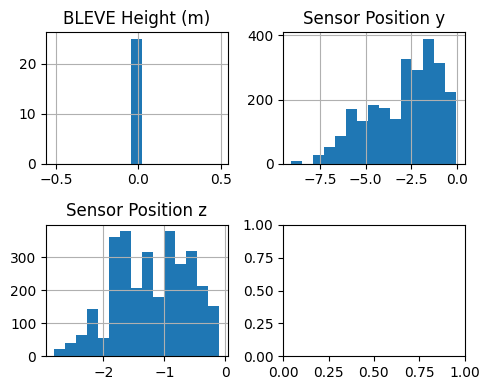

In [47]:
n_cols = 2
n_rows = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*2.5, n_rows*2))

i = 0
for var in raw_data5.columns:
    temp = raw_data5[raw_data5[var] < 0]
    
    if not temp.empty:
        ax = axs[i//n_cols, i%n_cols]
        temp[var].hist(bins=15, ax = ax)
        ax.set_title(f'{var}')
        i += 1

plt.tight_layout()

In [48]:
raw_data5["Liquid Boiling Temperature (K)"].unique()

array([0., 1.])

Note that the "BLEVE Height (m)" is "the distance of the tank to the ground (in meter)" [sic]. After confirming with the source of the data that this can not be negative, we must remove it from our data.

Additionally, the "Liquid Boiling Temperature" is in Kelvin, however, all values in our set are negative (which is impossible as Kelvin is an absolute scale). Whilst this appears to be invalid, we'll discuss in 2.6.6 how this is actually just a mistake in the recording of data

In [49]:
raw_data5["BLEVE Height (m)"] = raw_data5["BLEVE Height (m)"].clip(lower = 0)

### Others

The height of vapour in the tank should not exceed the height of the tank itself

In [50]:
raw_data5.loc[raw_data5["Tank Height (m)"] < raw_data5["Vapour Height (m)"]].head(10)[["Tank Height (m)","Vapour Height (m)"]]

Tank Height (m)  Vapour Height (m)
3413             0.59                0.6
3414             0.59                0.6
3415             0.59                0.6
3416             0.59                0.6
3417             0.59                0.6
3418             0.59                0.6
3419             0.59                0.6
3420             0.59                0.6
3421             0.59                0.6
3422             0.59                0.6

In [51]:
raw_data6 = raw_data5.query("`Tank Height (m)` >= `Vapour Height (m)`")

## Duplicates

In [52]:
# 4: Removing Duplicates
display(raw_data6[raw_data6.duplicated(keep=False)].sort_values(by=raw_data5.columns.tolist()))

ID  Tank Failure Pressure (bar)  Liquid Ratio (%)  Tank Width (m)  \
186    3392.0                       21.090              0.67           1.600   
187    3392.0                       21.090              0.67           1.600   
461    3669.0                       34.910              0.69           2.195   
462    3669.0                       34.910              0.69           2.195   
760    3972.0                       36.875              0.58           2.590   
...       ...                          ...               ...             ...   
9213  12477.0                       31.275              0.28           3.000   
9493  12758.0                       16.390              0.55           0.810   
9494  12758.0                       16.390              0.55           0.810   
9935  13201.0                       18.285              0.57           2.000   
9936  13201.0                       18.285              0.57           2.000   

      Tank Length (m)  Tank Height (m)  BLEVE Height (m)  Vapour Height (m)  \
186              4.20             1.19             1.000               0.40   
187              4.20             1.19             1.000               0.40   
461              4.20             0.60             1.800               0.20   
462              4.20             0.60             1.800               0.20   
760              3.40             2.60             1.205               1.01   
...               ...              ...               ...                ...   
9213             2.61             2.80             0.800               2.00   
9493             5.61             2.00             1.600               0.80   
9494             5.61             2.00             1.600               0.80   
9935             7.19             1.00             0.205               0.40   
9936             7.19             1.00             0.205               0.40   

      Vapour Temperature (K)  Liquid Temperature (K)  ...  \
186                  411.370                 286.875  ...   
187                  411.370                 286.875  ...   
461                  314.120                 347.740  ...   
462                  314.120                 347.740  ...   
760                  331.050                 286.950  ...   
...                      ...                     ...  ...   
9213                 568.335                 315.290  ...   
9493                 293.410                 284.460  ...   
9494                 293.410                 284.460  ...   
9935                 540.390                 319.200  ...   
9936                 540.390                 319.200  ...   

      Sensor Position Side  Sensor Position x  Sensor Position y  \
186                    2.0              15.75              12.20   
187                    2.0              15.75              12.20   
461                    5.0              16.80               2.65   
462                    5.0              16.80               2.65   
760                    1.0              19.95               8.20   
...                    ...                ...                ...   
9213                   1.0              16.35               3.80   
9493                   2.0              15.35               4.60   
9494                   2.0              15.35               4.60   
9935                   5.0              16.10               6.85   
9936                   5.0              16.10               6.85   

      Sensor Position z  tgt_pressure  Superheated_status  \
186                13.6      0.105344                 0.0   
187                13.6      0.105344                 0.0   
461                -1.7      0.131426                 0.0   
462                -1.7      0.131426                 0.0   
760                -1.5      0.083324                 0.0   
...                 ...           ...                 ...   
9213               -1.6      0.142715                 0.0   
9493                3.8      0.294822                 0.0   
94

In [53]:
raw_data7 = raw_data6.drop_duplicates()
print(f"Data dropped: {len(raw_data6) - len(raw_data7)}")

Data dropped: 48


In [54]:
len(raw_data7)

9811

## Major Edits

We will split the data into train, validation and test sets before analysing the data (so we can test our hypotheses locally before submitting them for assessment). However, before we do this, we'll do perform any changes that apply to all datasets here (so we don't have to add them to each dataset separately). This mainly includes renaming the columns to something more friendly for analysis (i.e. snake_case), as well as adding features that we'll explore later.

### Variable Renaming

In [55]:
renamed_cols = [
    "ID",
    "failure_pressure",
    "liquid_pct",
    "tank_w",
    "tank_l",
    "tank_h",
    "BLEVE_h",
    "vapour_height",
    "vapour_temp",
    "liquid_temp",
    "obstacle_dist",
    "obstacle_w",
    "obstacle_h",
    "obstacle_thk",
    "obstacle_angle",
    "sensor_id",
    "sensor_side",
    "sensor_x",
    "sensor_y",
    "sensor_z",
    "tgt_pressure",
    "superheated_status",
    "lqd_crit_pressure",
    "lqd_boil_temp",
    "lqd_crit_temp",
    "event_num",
    "tank_volume",
    "net_sensor_dist"
]

In [56]:
dict_names = dict(zip(raw_data7.columns, renamed_cols))

raw_data8 = raw_data7.rename(columns = dict_names)
raw_test_data3 = raw_test_data2.rename(columns = dict_names)

### Feature Addition

In [57]:
#### FIX ####

In [58]:
temp = raw_data8[["liquid_pct","vapour_height","tank_h"]].copy()

In [59]:
temp["vapour_height_calc"] = temp["tank_h"] * (1 - temp["liquid_pct"])
temp["dif"] = 1 - temp["vapour_height_calc"]/temp["vapour_height"]

In [60]:
temp.sort_values("dif")

liquid_pct  vapour_height  tank_h  vapour_height_calc       dif
8154        0.51           0.19     0.6               0.294 -0.547368
8161        0.51           0.19     0.6               0.294 -0.547368
8162        0.51           0.19     0.6               0.294 -0.547368
8163        0.51           0.19     0.6               0.294 -0.547368
8158        0.51           0.19     0.6               0.294 -0.547368
...          ...            ...     ...                 ...       ...
1085        0.90           0.20     0.4               0.040  0.800000
1084        0.90           0.20     0.4               0.040  0.800000
1083        0.90           0.20     0.4               0.040  0.800000
1094        0.90           0.20     0.4               0.040  0.800000
1107        0.90           0.20     0.4               0.040  0.800000

[9811 rows x 5 columns]

Immediately we can see that many of our variables relate to each other
* E.g. we have tank height, length and width, which suggest that we should create a variable for the tank volume.
* Also, we have the location of sensors. This is quite important, but we can group sensors by "front", "back" and "side" (rather than looking at them individually)
* Furthermore, we can try convert the sensor's position into a distance metric

In [61]:
tank_axis = ["tank_w", "tank_h", "tank_l"]
raw_data8["tank_volume"] = raw_data8[tank_axis].prod(axis = 1)
raw_data8.drop(columns = tank_axis, inplace = True)

raw_data8["sensor_location"] = raw_data8["sensor_side"].map({1: 1, 2: 2, 3: 3, 4: 3, 5: 3}) # changes 4 and 5 (both sides) to 3 (1 = back, 2 = front, 3 = sides)

sensor_vars = ["sensor_x", "sensor_y", "net_z"]
raw_data8["net_z"] = raw_data8["sensor_z"] - raw_data8["BLEVE_h"]
raw_data8["net_sensor_dist"] = np.linalg.norm(raw_data8[sensor_vars], axis=1)
sensor_vars.append("sensor_z")
raw_data8.drop(columns = sensor_vars, inplace = True)

lqd_properties = ["lqd_crit_pressure", "lqd_boil_temp", "lqd_crit_temp"]
raw_data8["substance"] = raw_data8[lqd_properties].prod(axis = 1)
raw_data8.drop(columns = lqd_properties, inplace = True)

# raw_data8["vapour_volume"] = 

In [62]:
raw_test_data3["tank_volume"] = raw_test_data3[tank_axis].prod(axis = 1)
raw_test_data3.drop(columns = tank_axis, inplace = True)

raw_test_data3["sensor_location"] = raw_test_data3["sensor_side"].map({1: 1, 2: 2, 3: 3, 4: 3, 5: 3})
raw_test_data3["net_z"] = raw_test_data3["sensor_z"] - raw_test_data3["BLEVE_h"]
raw_test_data3["net_sensor_dist"] = np.linalg.norm(raw_test_data3[sensor_vars], axis=1)
raw_test_data3.drop(columns = sensor_vars, inplace = True)

raw_test_data3["substance"] = raw_test_data3[lqd_properties].prod(axis = 1)
raw_test_data3.drop(columns = lqd_properties, inplace = True)

## Real-World Research

In [63]:
expl_data = raw_data8.copy()

Here we have the properties of the 2 unique substances present in our data

In [64]:
substance_properties

Liquid Critical Pressure (bar)  Liquid Boiling Temperature (K)  \
0                            37.9                            -1.0   
1                            42.5                           -42.0   

   Liquid Critical Temperature (K)  
0                            152.0  
1                             96.7

As mentioned in 2.3.2 (and by using common sense), a sub-0 boiling temperature raises some red flags and that they instead might be in degrees celsius. 

Through some elementary research, we can discover that these are the distinct properties of 2 unique molecules; n-butane and propane respectively.

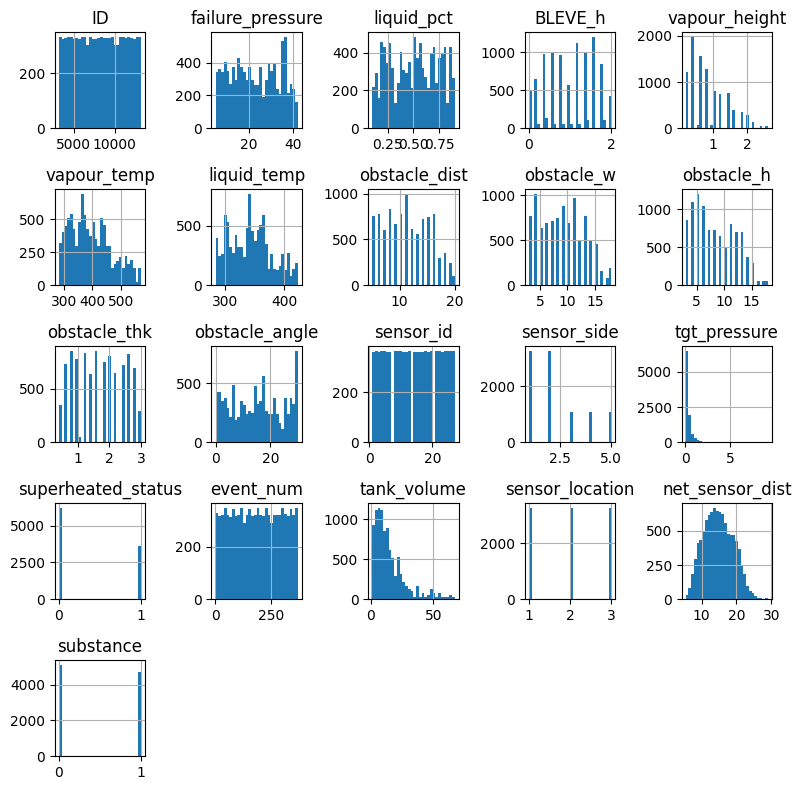

In [65]:
expl_data.hist(bins = 30, figsize = (8,8))
plt.tight_layout()
plt.show()

In [66]:
expl_data

ID  failure_pressure  liquid_pct  BLEVE_h  vapour_height  \
0      3203.0             7.320        0.42    1.790          0.605   
1      3204.0             7.320        0.42    1.790          0.605   
2      3205.0             7.320        0.42    1.790          0.605   
3      3206.0             7.320        0.42    1.790          0.605   
4      3207.0             7.320        0.42    1.790          0.605   
...       ...               ...         ...      ...            ...   
9932  13198.0            18.285        0.57    0.205          0.400   
9933  13199.0            18.285        0.57    0.205          0.400   
9934  13200.0            18.285        0.57    0.205          0.400   
9935  13201.0            18.285        0.57    0.205          0.400   
9937  13202.0            18.285        0.57    0.205          0.400   

      vapour_temp  liquid_temp  obstacle_dist  obstacle_w  obstacle_h  ...  \
0         522.915       354.43           11.0        11.0        13.0  ...   
1         522.915       354.43           11.0        11.0        13.0  ...   
2         522.915       354.43           11.0        11.0        13.0  ...   
3         522.915       354.43           11.0        11.0        13.0  ...   
4         522.915       354.43           11.0        11.0        13.0  ...   
...           ...          ...            ...         ...         ...  ...   
9932      540.390       319.20           14.0        12.0        15.0  ...   
9933      540.390       319.20           14.0        12.0        15.0  ...   
9934      540.390       319.20           14.0        12.0        15.0  ...   
9935      540.390       319.20           14.0        12.0        15.0  ...   
9937      540.390       319.20           14.0        12.0        15.0  ...   

      obstacle_angle  sensor_id  sensor_side  tgt_pressure  \
0               13.0       18.0          2.0      0.199929   
1               13.0       19.0          3.0      0.435681   
2               13.0       20.0          3.0      0.264031   
3               13.0       21.0          3.0      0.270576   
4               13.0       22.0          4.0      0.204675   
...              ...        ...          ...           ...   
9932             3.0       23.0          4.0      0.100168   
9933             3.0       24.0          4.0      0.116293   
9934             3.0       25.0          5.0      0.112795   
9935             3.0       26.0          5.0      0.126599   
9937             3.0       27.0          5.0      0.113586   

      superheated_status  event_num  tank_volume  sensor_location  \
0                    1.0          1       12.933                2   
1                    1.0          1       12.933                3   
2                    1.0          1       12.933                3   
3                    1.0          1       12.933                3   
4                    1.0          1       12.933                3   
...                  ...        ...          ...              ...   
9932                 0.0        371       14.380                3   
9933                 0.0        371       14.380                3   
9934                 0.0        371       14.380                3   
9935                 0.0        371       14.380                3   
9937                 0.0        371       14.380                3   

      net_sensor_dist  substance  
0           17.012366        0.0  
1           13.362956        0.0  
2           13.105899        0.0  
3           15.631398        0.0  
4           15.759572        0.0  
...               ...        ...  
9932        21.678446        0.0  
9933        22.646744        0.0  
9934        17.501329        0.0  
9935        18.806210        0.0  
9937        22.530657        0.0  

[9811 rows x 21 columns]

In [67]:
def enthalpy_of_vap(substance_dict, df):
    lookup = substance_dict
    # t0 = df[]
    tb = lookup["tb"]
    tc = lookup["tc"]
    pc = lookup["pc"]

    num = 1.092 * 8.3145 * tb * (np.log(pc) - 1.013)
    denom = 0.93 - tb / tc
    frac = (tc - t0) / (tc - tb)

    return num / denom * frac ** 0.383

In [68]:
n_butane_props = {
    "tb": -1 + 273.15,
    "tc": 425.1,
    "pc": 3796.0,
}

propane_props = {
    "tb": -42 + 273.15 ,
    "tc": 369.522,
    "pc": 4249.24,
}

In [69]:
# Calculating the boiling point at the failure pressure through the Classius-Clayperton equation

def calc_new_BP(p2, element):
    if element == "n-butane" or element == 0:
        h = 22.40 * 1000
        p1 = 1
        t1 = -1 + 273.15
    elif element == "propane" or element == 1:
        h = 16.25 * 1000
        p1 = 1
        t1 = -42 + 273.15
    else:
        raise ValueError("Element must be propane or n-butane")

    calc = 1/t1 - 8.3145 * np.log(p2/p1)/h
    return round(1/calc, 3)

In [70]:
map_dict = {0: -1.0, 1: -42.0}
expl_data["BP_orig"] = expl_data["substance"].map(map_dict)
expl_data["BP_new"] = expl_data.apply(lambda row: calc_new_BP(row["failure_pressure"], row["substance"]), axis = 1)
expl_data["temp_excess"] =  expl_data["liquid_temp"] - expl_data["BP_new"]

In [71]:
expl_data

ID  failure_pressure  liquid_pct  BLEVE_h  vapour_height  \
0      3203.0             7.320        0.42    1.790          0.605   
1      3204.0             7.320        0.42    1.790          0.605   
2      3205.0             7.320        0.42    1.790          0.605   
3      3206.0             7.320        0.42    1.790          0.605   
4      3207.0             7.320        0.42    1.790          0.605   
...       ...               ...         ...      ...            ...   
9932  13198.0            18.285        0.57    0.205          0.400   
9933  13199.0            18.285        0.57    0.205          0.400   
9934  13200.0            18.285        0.57    0.205          0.400   
9935  13201.0            18.285        0.57    0.205          0.400   
9937  13202.0            18.285        0.57    0.205          0.400   

      vapour_temp  liquid_temp  obstacle_dist  obstacle_w  obstacle_h  ...  \
0         522.915       354.43           11.0        11.0        13.0  ...   
1         522.915       354.43           11.0        11.0        13.0  ...   
2         522.915       354.43           11.0        11.0        13.0  ...   
3         522.915       354.43           11.0        11.0        13.0  ...   
4         522.915       354.43           11.0        11.0        13.0  ...   
...           ...          ...            ...         ...         ...  ...   
9932      540.390       319.20           14.0        12.0        15.0  ...   
9933      540.390       319.20           14.0        12.0        15.0  ...   
9934      540.390       319.20           14.0        12.0        15.0  ...   
9935      540.390       319.20           14.0        12.0        15.0  ...   
9937      540.390       319.20           14.0        12.0        15.0  ...   

      tgt_pressure  superheated_status  event_num  tank_volume  \
0         0.199929                 1.0          1       12.933   
1         0.435681                 1.0          1       12.933   
2         0.264031                 1.0          1       12.933   
3         0.270576                 1.0          1       12.933   
4         0.204675                 1.0          1       12.933   
...            ...                 ...        ...          ...   
9932      0.100168                 0.0        371       14.380   
9933      0.116293                 0.0        371       14.380   
9934      0.112795                 0.0        371       14.380   
9935      0.126599                 0.0        371       14.380   
9937      0.113586                 0.0        371       14.380   

      sensor_location  net_sensor_dist  substance  BP_orig   BP_new  \
0                   2        17.012366        0.0     -1.0  340.650   
1                   3        13.362956        0.0     -1.0  340.650   
2                   3        13.105899        0.0     -1.0  340.650   
3                   3        15.631398        0.0     -1.0  340.650   
4                   3        15.759572        0.0     -1.0  340.650   
...               ...              ...        ...      ...      ...   
9932                3        21.678446        0.0     -1.0  385.244   
9933                3        22.646744        0.0     -1.0  385.244   
9934                3        17.501329        0.0     -1.0  385.244   
9935                3        18.806210        0.0     -1.0  385.244   
9937                3        22.530657        0.0     -1.0  385.244   

      temp_excess  
0          13.780  
1          13.780  
2          13.780  
3          13.780  
4          13.780  
...           ...  
9932      -66.044  
9933      -66.044  
9934      -66.044  
9935      -66.044  
9937      -66.044  

[9811 rows x 24 columns]

In [72]:
sensor1 = list(expl_data.groupby("sensor_id"))[14][1]

In [73]:
# Plotting Variables vs tgt_pressure
def plot_tgt_var(df, vars = None, n_cols = 4):
    if vars == None:
        vars = df.columns
        
    numeric_cols = df[vars].select_dtypes(include = np.number).columns.to_list()
    n_cols = n_cols
    n_rows = int(len(numeric_cols) / n_cols) + (len(numeric_cols) % n_cols > 0)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))
    
    i = 0
    for col_name in numeric_cols:
        if col_name != "tgt_pressure":
            ax = axs[i//n_cols, i%n_cols]
            ax.scatter(df[col_name], df["tgt_pressure"])
            ax.set_title(f"{col_name}")
            i += 1
    
    plt.tight_layout()
    plt.show()

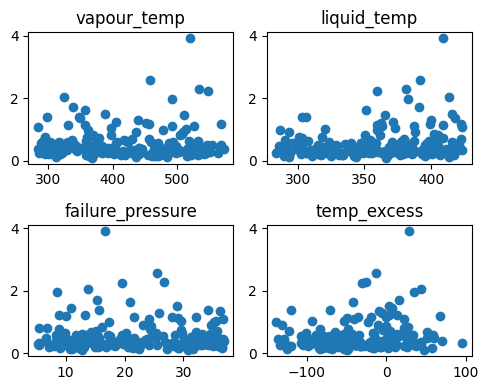

In [74]:
plot_tgt_var(sensor1.query("substance == 0"),["vapour_temp", "liquid_temp","failure_pressure", "temp_excess"], n_cols = 2)

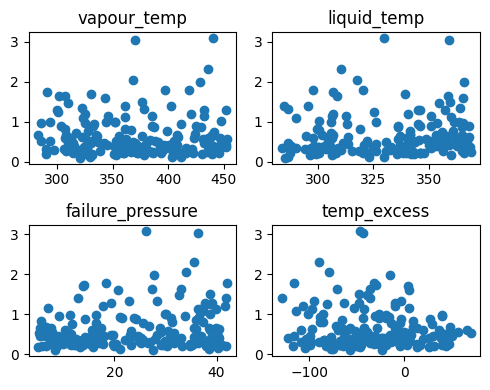

In [75]:
plot_tgt_var(sensor1.query("substance == 1"),["vapour_temp", "liquid_temp","failure_pressure", "temp_excess"], n_cols = 2)

## Splitting Data

In [76]:
# # Train, Validation and Test Splits
# val_train_ratio = 0.7
# val_val_ratio = 0.15

# n_events = max(raw_data8["event_num"])
# val_train_qty = int(val_train_ratio * n_events)
# val_val_qty = int(val_val_ratio * n_events) + val_train_qty

# train_split = raw_data8[raw_data8["event_num"]<val_train_qty]
# validation_split = raw_data8[(raw_data8["event_num"]>=val_train_qty) & (raw_data8["event_num"]<val_val_qty)]
# test_split = raw_data8[raw_data8["event_num"]>=val_val_qty]

In [77]:
n_events = max(raw_data8["event_num"])
train_cutoff = int(0.8 * n_events)
train_split = raw_data8[raw_data8["event_num"]<train_cutoff]
validation_split = raw_data8[raw_data8["event_num"]>=train_cutoff]

## Feature Selection

In [78]:
ft_data = train_split.copy()

Immediately based off priors, we can see that many of our variables relate to each other. E.g. we have tank height, length and width, which suggest that we should create a variable for the tank volume.

### Exploration

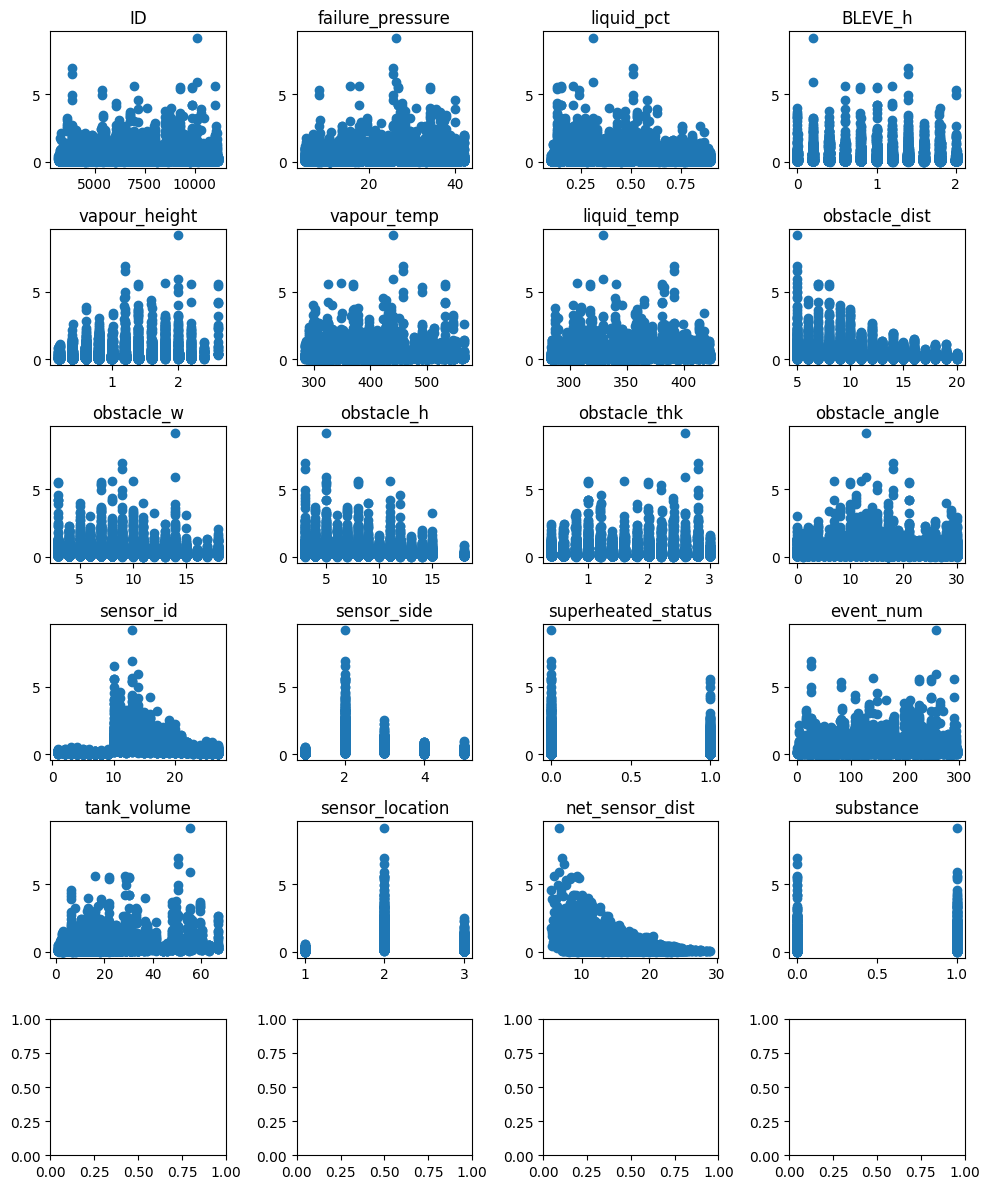

In [83]:
plot_tgt_var(ft_data)

In [84]:
ft_data.corr().style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [85]:
ft_data.corr()[["tgt_pressure"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [86]:
sample = ft_data.loc[10:36]

In [87]:
sample

ID  failure_pressure  liquid_pct  BLEVE_h  vapour_height  vapour_temp  \
10  3213.0             30.59        0.81      1.2            0.2       363.62   
11  3214.0             30.59        0.81      1.2            0.2       363.62   
12  3215.0             30.59        0.81      1.2            0.2       363.62   
13  3216.0             30.59        0.81      1.2            0.2       363.62   
14  3217.0             30.59        0.81      1.2            0.2       363.62   
15  3218.0             30.59        0.81      1.2            0.2       363.62   
16  3219.0             30.59        0.81      1.2            0.2       363.62   
17  3220.0             30.59        0.81      1.2            0.2       363.62   
18  3221.0             30.59        0.81      1.2            0.2       363.62   
19  3222.0             30.59        0.81      1.2            0.2       363.62   
20  3223.0             30.59        0.81      1.2            0.2       363.62   
21  3224.0             30.59        0.81      1.2            0.2       363.62   
22  3225.0             30.59        0.81      1.2            0.2       363.62   
23  3226.0             30.59        0.81      1.2            0.2       363.62   
24  3227.0             30.59        0.81      1.2            0.2       363.62   
25  3228.0             30.59        0.81      1.2            0.2       363.62   
26  3229.0             30.59        0.81      1.2            0.2       363.62   
27  3230.0             30.59        0.81      1.2            0.2       363.62   
28  3231.0             30.59        0.81      1.2            0.2       363.62   
29  3232.0             30.59        0.81      1.2            0.2       363.62   
30  3233.0             30.59        0.81      1.2            0.2       363.62   
31  3234.0             30.59        0.81      1.2            0.2       363.62   
32  3235.0             30.59        0.81      1.2            0.2       363.62   
33  3236.0             30.59        0.81      1.2            0.2       363.62   
34  3237.0             30.59        0.81      1.2            0.2       363.62   
35  3238.0             30.59        0.81      1.2            0.2       363.62   
36  3239.0             30.59        0.81      1.2            0.2       363.62   

    liquid_temp  obstacle_dist  obstacle_w  obstacle_h  ...  obstacle_angle  \
10       407.56            9.0         4.0        14.0  ...            16.0   
11       407.56            9.0         4.0        14.0  ...            16.0   
12       407.56            9.0         4.0        14.0  ...            16.0   
13       407.56            9.0         4.0        14.0  ...            16.0   
14       407.56            9.0         4.0        14.0  ...            16.0   
15       407.56            9.0         4.0        14.0  ...            16.0   
16       407.56            9.0         4.0        14.0  ...            16.0   
17       407.56            9.0         4.0        14.0  ...            16.0   
18       407.56            9.0         4.0        14.0  ...            16.0   
19       407.56            9.0         4.0        14.0  ...            16.0   
20       407.56            9.0         4.0        14.0  ...            16.0   
21       407.56            9.0         4.0        14.0  ...            16.0   
22       407.56            9.0         4.0        14.0  ...            16.0   
23       407.56            9.0         4.0        14.0  ...            16.0   
24       407.56            9.0         4.0        14.0  ...            16.0   
25       407.56            9.0         4.0        14.0  ...            16.0   
26       407.56            9.0         4.0        14.0  ...            16.0   
27       407.56            9.0         4.0        14.0  ...            16.0   
28       407.56            9.0         4.0        14.0  ...            16.0   
29       407.56            9.0         4.0        14.0  ...            16.0   
30       407.56            9.0         4.0        14.0  ...            16.0   
3

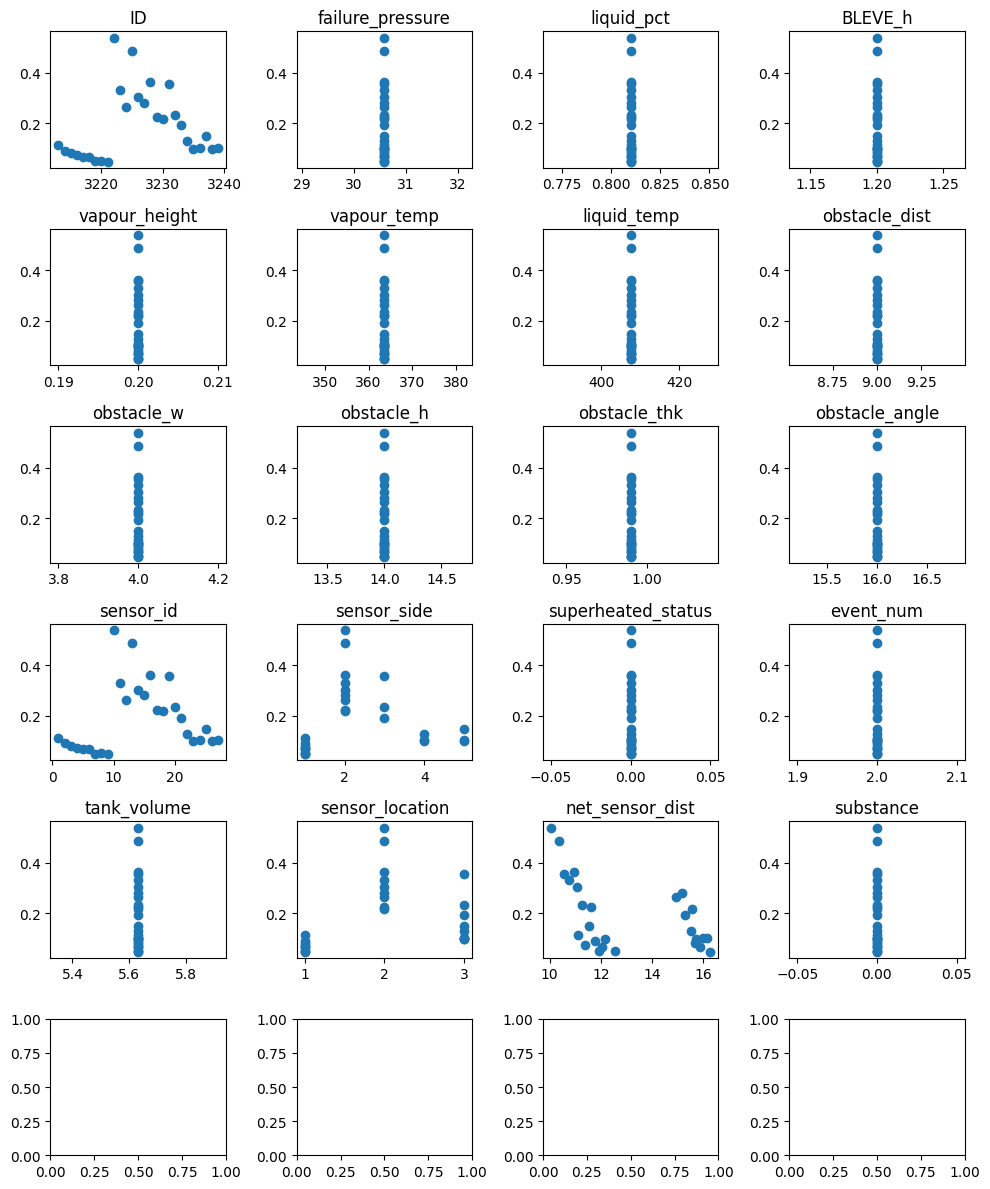

In [88]:
plot_tgt_var(sample)

Looking into distinguishing by sensor_side (instead of individual sensors)

In [89]:
raw_data2[["Sensor Position Side", "Sensor ID"]].drop_duplicates().sort_values(by = "Sensor ID")

Sensor Position Side  Sensor ID
10                   1.0        1.0
11                   1.0        2.0
12                   1.0        3.0
13                   1.0        4.0
14                   1.0        5.0
15                   1.0        6.0
16                   1.0        7.0
17                   1.0        8.0
18                   1.0        9.0
19                   2.0       10.0
20                   2.0       11.0
21                   2.0       12.0
22                   2.0       13.0
23                   2.0       14.0
24                   2.0       15.0
25                   2.0       16.0
26                   2.0       17.0
0                    2.0       18.0
1                    3.0       19.0
2                    3.0       20.0
3                    3.0       21.0
4                    4.0       22.0
5                    4.0       23.0
6                    4.0       24.0
7                    5.0       25.0
8                    5.0       26.0
9                    5.0       27.0

In [90]:
# We can group IDs by Position Side as such:
# 1: 1-9
# 2: 10-18
# 3: 19-21
# 4: 22-24
# 5: 25-27

# This was done above in 2.5.1 "sensor_location" (using 1 = back, 2 = front, 3 = sides)

In [91]:
grpd_sensor_loc = ft_data.groupby("sensor_location")
grpd_sensor_loc_vld = validation_split.groupby("sensor_location")

### Net Sensor Distance

In [91]:
# Plotting Variables vs tgt_pressure for Each Sensor
def plot_sensor_data(grpd_data, vars = None, n_cols = 4):
    if vars == None:
        vars = df.columns
        
    n_cols = min(len(vars), n_cols)
    n_rows = 27
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))
    
    i = 0
    for sensor_id, df in grpd_data:
        for col_name in vars:
            ax = axs[i//n_cols, i%n_cols]
            ax.scatter(df[col_name], df["tgt_pressure"])
            ax.set_title(f"{i//n_cols+1}: {col_name}")
            i += 1
        
    plt.tight_layout()
    plt.show()

In [92]:
grpd = ft_data.groupby("sensor_id")

# plot_sensor_data(grpd, ["sensor_x", "sensor_y", "sensor_z", "net_sensor_dist"])

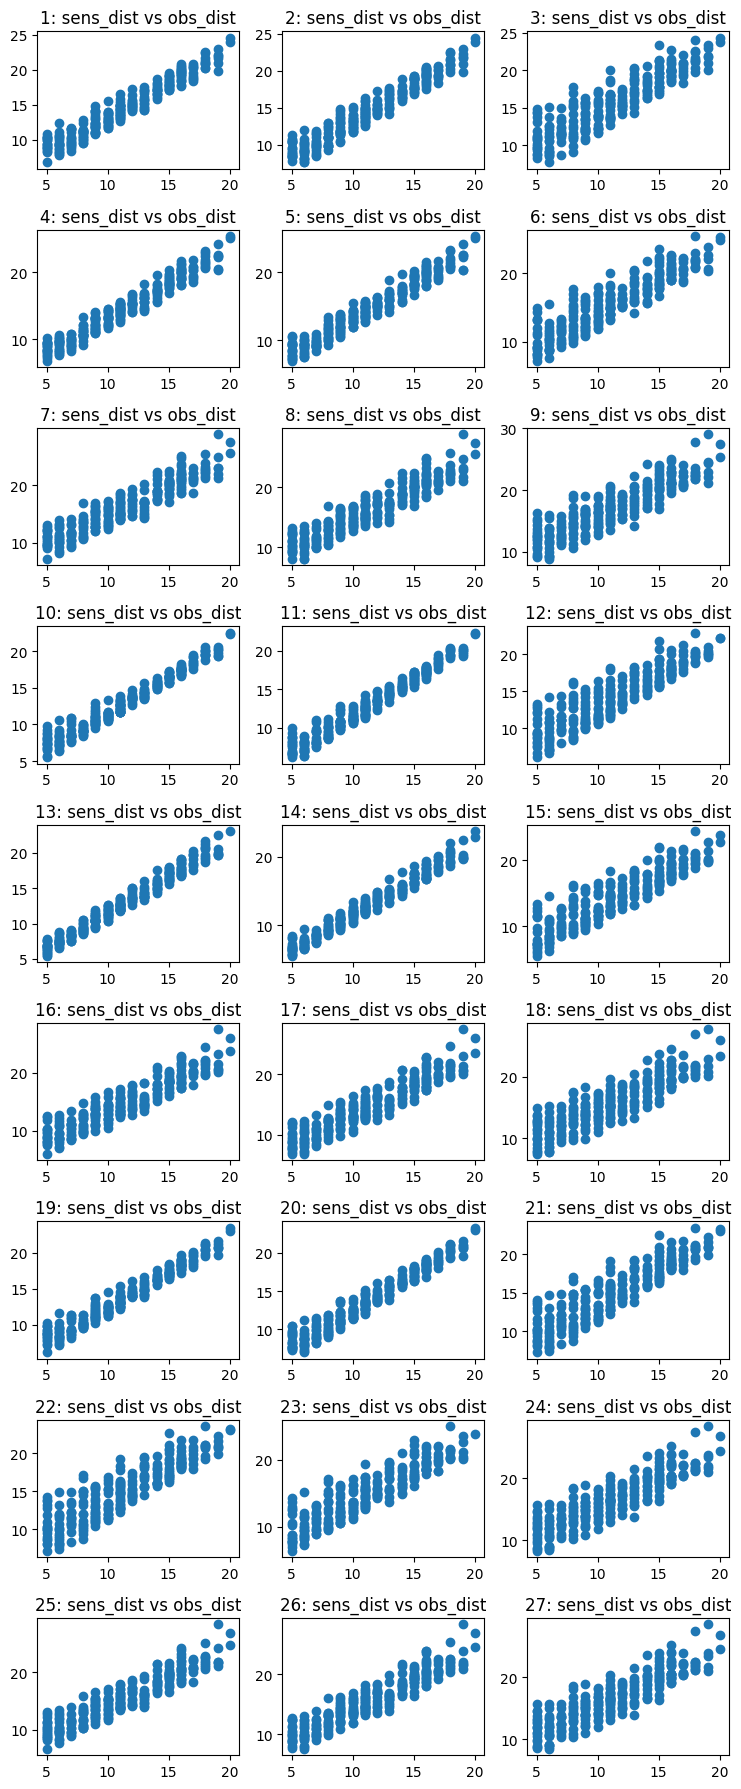

In [93]:
n_cols = 3
n_rows = 9
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2.5, n_rows * 2))

i = 0
for sensor_id, df in grpd:
    ax = axs[i//n_cols, i%n_cols]
    ax.scatter(df["obstacle_dist"], df["net_sensor_dist"])
    ax.set_title(f"{i+1}: sens_dist vs obs_dist")
    i += 1
    
plt.tight_layout()
plt.show()

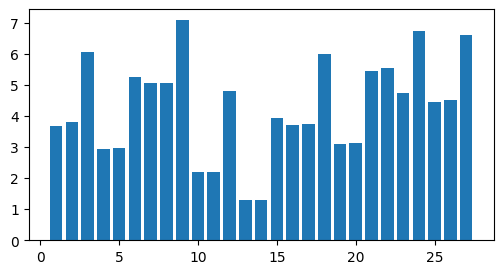

In [94]:
y_intercepts = []

for sensor_id, df in grpd:
    X = df[["obstacle_dist"]]
    y = df["net_sensor_dist"]
    model = LinearRegression()
    model.fit(X, y)

    # Get y-intercept
    y_intercept = model.intercept_
    y_intercepts.append(y_intercept)

# Plot y-intercepts on a bar graph
plt.figure(figsize=(6, 3))
plt.bar(range(1, len(y_intercepts) + 1), y_intercepts)
plt.show()

In [95]:
ft_data.corr()[["tgt_pressure","net_sensor_dist","obstacle_dist"]].T.style.background_gradient(cmap = "coolwarm", vmin = -1, vmax = 1)

In [96]:
def reg_stats(df, vars):
    r_sq_result = {}
    
    for predictor in vars:
        X = df[[predictor]]
        y = df["tgt_pressure"]
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = r2_score(y, y_pred)
        coefficients = model.coef_  # Get the coefficients
        r_sq_result[predictor] = {"R-squared": r_squared, "Coefficients": coefficients}
    
    
    for key, val in r_sq_result.items():
        print(f"### {key} ###\nCoeff = {val['Coefficients'][0]:.4f}\nR^2 = {val['R-squared']:.6f}\n")

In [97]:
X = ft_data[["net_sensor_dist"]]
y = ft_data["tgt_pressure"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
coefficients = model.coef_  # Get the coefficients
display(pd.DataFrame({"R-squared": r_squared, "Coefficients": coefficients}))

R-squared  Coefficients
0   0.133924     -0.045336

In [98]:
reg_stats(ft_data, ["net_sensor_dist", "obstacle_dist"])

### net_sensor_dist ###
Coeff = -0.0453
R^2 = 0.133924

### obstacle_dist ###
Coeff = -0.0276
R^2 = 0.044939



Conclusion: it appears that the net_sensor_dist and obstacle_distance_to_BLEVE are very similar in nature, and without more information regarding the nature of the experiment, it is hard to pinpoint where exactly this difference comes from.net_sensor_dist has a stronger correlation with tgt_pressure than the obstacle_distance, we will use that instead.

### Functions

In [79]:
def mape_calc(y_tgt, y_pred):
        return np.mean(np.abs(1 - y_pred / y_tgt))

In [80]:
def out_of_sample_test(model, data, print_output = True):
    y2 = data["tgt_pressure"]
    X2 = data.drop(columns=["tgt_pressure"])
    y2_pred = model.predict(X2)
    
    r2_2 = r2_score(y2, y2_pred)
    mape2 = mape_calc(y2, y2_pred)

    print(f"R^2: {r2_2:.4f}, MAPE: {mape2:.4f}")
    if print_output == False:
        return r2_2, mape2

In [81]:
def forward_selected_r2(data, response, max_features=5, select_features = 5, criterion='aic', k = False):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    if k == False:
        k = '-1 +'
    else:
        k = ''
    while remaining and len(selected) < max_features:
        scores_with_candidates = []
        if not selected:
            curr_score = float("inf")
            curr_r2 = 0
        else:
            curr_formula = f"{response} ~ {k}{' + '.join(selected)}"
            curr_model = sm.OLS.from_formula(curr_formula, data).fit()
            curr_r2 = curr_model.rsquared
            if criterion == "aic":
                curr_score = curr_model.aic
            elif criterion == "bic":
                curr_score = curr_model.bic
        for candidate in remaining:
            formula = f"{response} ~ {k}{' + '.join(selected + [candidate])}"
            if criterion == 'aic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.aic
                r_squared = model.rsquared
            elif criterion == 'bic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.bic
                r_squared = model.rsquared
            else:
                raise ValueError("Invalid: use 'aic' or 'bic'")
            scores_with_candidates.append((score, r_squared, candidate))
        scores_with_candidates.sort()
        
        print(f"\nBest variables (current: {criterion.upper()} = {curr_score:.2f}, R^2 = {curr_r2:.4f}):")
        for i, (score, r_squared, candidate) in enumerate(scores_with_candidates[:select_features], 1): # enumerate from 1 instead of 0
            print(f"{i}. {candidate.ljust(20)} \tAIC={score:.2f}, \tR^2={r_squared:.4f}")
        
        user_input = input(f"Variable to add (1-{select_features}): ")
        try:
            choice = int(user_input)
            if 1 <= choice <= select_features:
                best_candidate = scores_with_candidates[choice - 1][2]
                print(f"\n### Adding {best_candidate} ###")
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                current_score = scores_with_candidates[choice - 1][0]
            else:
                break
        except ValueError:
            print("Invalid. Enter a number")

    if not selected:
        raise ValueError("No variables added to model")
            
    formula = f"{response} ~ {k}{' + '.join(selected)}"
    model = sm.OLS.from_formula(formula, data).fit()

    y_tgt = data[response]
    y_pred = model.predict(data).clip(0)
    mape = mape_calc(y_tgt, y_pred)
    
    print(f"\n\n### METRICS ###\nMape:\t{mape:.4f} \nR^2:\t{model.rsquared:.4f}")
    print("\n",model.summary(),"\n")

    
    plt.figure(figsize=(6, 3))
    plt.scatter(y_pred, y_tgt)
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--', label='y = x')
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Accuracy of Predictions")
    plt.grid(True)
    plt.show()
    
    return model

In [82]:
def forward_selected_mape(data, response, max_features=5, select_features=5, criterion='aic', k=False):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    if k == False:
        k = '-1 +'
    else:
        k = ''
    while remaining and len(selected) < max_features:
        scores_with_candidates = []
        if not selected:
            curr_score = float("inf")
            curr_mape = float("inf")
            curr_r2 = 0
        else:
            curr_formula = f"{response} ~ {k}{' + '.join(selected)}"
            curr_model = sm.OLS.from_formula(curr_formula, data).fit()
            curr_mape = mape_calc(data[response], curr_model.predict(data))
            curr_r2 = curr_model.rsquared
            if criterion == "aic":
                curr_score = curr_model.aic
            elif criterion == "bic":
                curr_score = curr_model.bic
        for candidate in remaining:
            formula = f"{response} ~ {k}{' + '.join(selected + [candidate])}"
            if criterion == 'aic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.aic
            elif criterion == 'bic':
                model = sm.OLS.from_formula(formula, data).fit()
                score = model.bic
            else:
                raise ValueError("Invalid: use 'aic' or 'bic'")
            mape = mape_calc(data[response], model.predict(data))
            r2 = model.rsquared
            scores_with_candidates.append((score, mape, r2, candidate))
        scores_with_candidates.sort(key=lambda x: x[1])
        
        print(f"\nBest variables (current: {criterion.upper()} = {curr_score:.2f}, MAPE = {curr_mape:.4f}, R^2 = {curr_r2:.4f}):")
        for i, (score, mape, r2, candidate) in enumerate(scores_with_candidates[:select_features], 1):
            print(f"{i}. {candidate.ljust(20)} \tAIC={score:.2f}, \tMAPE={mape:.4f}, \tR^2={r2:.4f}")

        user_input = input(f"Variable to add (1-{select_features}): ")
        try:
            choice = int(user_input)
            if 1 <= choice <= select_features:
                best_candidate = scores_with_candidates[choice - 1][3]
                print(f"\n### Adding {best_candidate} ###")
                remaining.remove(best_candidate)
                selected.append(best_candidate)
                current_score = scores_with_candidates[choice - 1][0]
            else:
                break
        except ValueError:
            print("Invalid. Enter a number")

    if not selected:
        raise ValueError("No variables added to model")

    formula = f"{response} ~ {k}{' + '.join(selected)}"
    model = sm.OLS.from_formula(formula, data).fit()

    y_tgt = data[response]
    y_pred = model.predict(data).clip(0)
    mape = mape_calc(y_tgt, y_pred)

    print(f"\n\n### METRICS ###\nMAPE:\t{mape:.4f} \n{criterion.upper()}:\t{current_score:.2f}")
    print("\n",model.summary(),"\n")

    plt.figure(figsize=(6, 3))
    plt.scatter(y_pred, y_tgt)
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--', label='y = x')

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Accuracy of Predictions")
    plt.grid(True)
    plt.show()

    return model


### Automatic Variable Selection


Best variables (current: AIC = inf, R^2 = 0.0000):
1. vapour_height        	AIC=9606.49, 	R^2=0.3766
2. tank_volume          	AIC=9746.95, 	R^2=0.3633
3. liquid_temp          	AIC=9959.00, 	R^2=0.3427
4. sensor_location      	AIC=10016.01, 	R^2=0.3370
5. vapour_temp          	AIC=10029.38, 	R^2=0.3357


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = 9606.49, R^2 = 0.3766):
1. tank_volume          	AIC=8996.12, 	R^2=0.4315
2. sensor_location      	AIC=9323.54, 	R^2=0.4028
3. failure_pressure     	AIC=9356.13, 	R^2=0.3999
4. liquid_pct           	AIC=9420.27, 	R^2=0.3940
5. ID                   	AIC=9423.96, 	R^2=0.3937


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 8996.12, R^2 = 0.4315):
1. net_sensor_dist      	AIC=8846.09, 	R^2=0.4443
2. failure_pressure     	AIC=8903.60, 	R^2=0.4395
3. sensor_location      	AIC=8903.97, 	R^2=0.4395
4. obstacle_dist        	AIC=8933.57, 	R^2=0.4370
5. sensor_id            	AIC=8960.23, 	R^2=0.4347


Variable to add (1-5):  0




### METRICS ###
Mape:	1.4888 
R^2:	0.4315

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.431
Model:                            OLS   Adj. R-squared (uncentered):              0.431
Method:                 Least Squares   F-statistic:                              2522.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:47:36   Log-Likelihood:                         -4496.1
No. Observations:                6648   AIC:                                      8996.
Df Residuals:                    6646   BIC:                                      9010.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025     

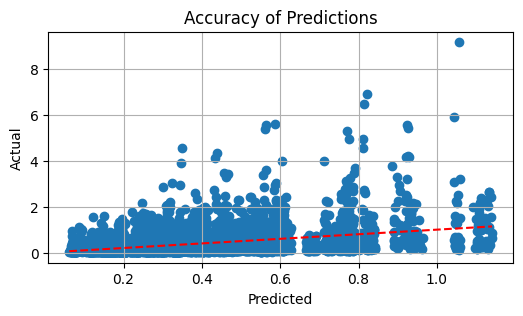

In [67]:
selected_model = forward_selected_r2(ft_data, "tgt_pressure", criterion='aic', k = False)

In [68]:
out_of_sample_test(selected_model, validation_split)

R^2: 0.0855, MAPE: 1.3275


In [ ]:
preds = selected_model.predict(raw_test_data3).clip(0)

In [ ]:
output_df = pd.DataFrame({'ID': preds.index, 'Target Pressure (bar)': preds.values})
output_df.to_csv('predictions.csv', index=False)

### Testing by Sensor Side

In [69]:
grpd_sensor_side = ft_data.groupby("sensor_side")
grpd_sensor_side_vld = validation_split.groupby("sensor_side")
grpd_sensor_side_test = raw_test_data3.groupby("sensor_side")


##### SIDE: back #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-5080.49, 	MAPE=0.5625, 	R^2=0.6565
2. vapour_height        	AIC=-5322.28, 	MAPE=0.6003, 	R^2=0.6921
3. failure_pressure     	AIC=-4836.65, 	MAPE=0.6900, 	R^2=0.6163
4. liquid_temp          	AIC=-5341.87, 	MAPE=0.6957, 	R^2=0.6948
5. ID                   	AIC=-5113.83, 	MAPE=0.6982, 	R^2=0.6616


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -5080.49, MAPE = 0.5625, R^2 = 0.6565):
1. vapour_height        	AIC=-6136.33, 	MAPE=0.4972, 	R^2=0.7873
2. failure_pressure     	AIC=-5948.27, 	MAPE=0.5359, 	R^2=0.7684
3. substance            	AIC=-5310.91, 	MAPE=0.5464, 	R^2=0.6908
4. superheated_status   	AIC=-5224.12, 	MAPE=0.5482, 	R^2=0.6784
5. BLEVE_h              	AIC=-5497.06, 	MAPE=0.5521, 	R^2=0.7158


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -6136.33, MAPE = 0.4972, R^2 = 0.7873):
1. sensor_id            	AIC=-6147.34, 	MAPE=0.4902, 	R^2=0.7886
2. substance            	AIC=-6204.91, 	MAPE=0.4974, 	R^2=0.7940
3. superheated_status   	AIC=-6141.40, 	MAPE=0.4976, 	R^2=0.7880
4. obstacle_dist        	AIC=-6143.88, 	MAPE=0.5021, 	R^2=0.7882
5. net_sensor_dist      	AIC=-6145.40, 	MAPE=0.5051, 	R^2=0.7884


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.4972 
AIC:	-6136.33

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.787
Model:                            OLS   Adj. R-squared (uncentered):              0.787
Method:                 Least Squares   F-statistic:                              4080.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:48:13   Log-Likelihood:                          3070.2
No. Observations:                2206   AIC:                                     -6136.
Df Residuals:                    2204   BIC:                                     -6125.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025   

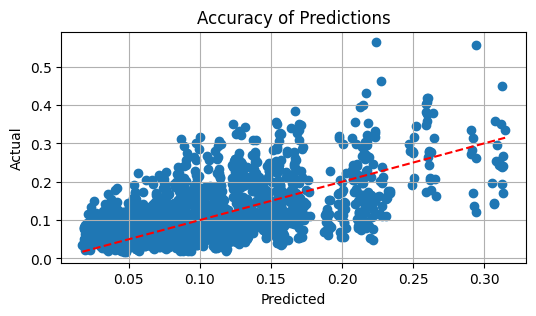




##### SIDE: front #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=4620.02, 	MAPE=0.6422, 	R^2=0.5495
2. vapour_height        	AIC=4522.88, 	MAPE=0.7488, 	R^2=0.5688
3. liquid_pct           	AIC=5491.24, 	MAPE=0.8787, 	R^2=0.3322
4. failure_pressure     	AIC=5077.39, 	MAPE=0.9074, 	R^2=0.4461
5. superheated_status   	AIC=5913.36, 	MAPE=0.9128, 	R^2=0.1920


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 4620.02, MAPE = 0.6422, R^2 = 0.5495):
1. superheated_status   	AIC=4589.22, 	MAPE=0.6417, 	R^2=0.5561
2. obstacle_dist        	AIC=4598.78, 	MAPE=0.6476, 	R^2=0.5542
3. liquid_pct           	AIC=4609.07, 	MAPE=0.6483, 	R^2=0.5521
4. net_sensor_dist      	AIC=4602.64, 	MAPE=0.6497, 	R^2=0.5534
5. substance            	AIC=4538.96, 	MAPE=0.6634, 	R^2=0.5660


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.6422 
AIC:	4620.02

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.549
Model:                            OLS   Adj. R-squared (uncentered):              0.549
Method:                 Least Squares   F-statistic:                              2699.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                        0.00
Time:                        14:48:16   Log-Likelihood:                         -2309.0
No. Observations:                2214   AIC:                                      4620.
Df Residuals:                    2213   BIC:                                      4626.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      

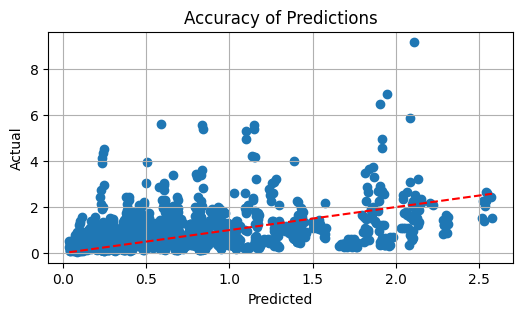




##### SIDE: side_L #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=361.59, 	MAPE=0.5547, 	R^2=0.6602
2. vapour_height        	AIC=286.51, 	MAPE=0.6113, 	R^2=0.6927
3. failure_pressure     	AIC=518.53, 	MAPE=0.7074, 	R^2=0.5805
4. ID                   	AIC=444.61, 	MAPE=0.7171, 	R^2=0.6201
5. obstacle_dist        	AIC=674.39, 	MAPE=0.7208, 	R^2=0.4829


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 361.59, MAPE = 0.5547, R^2 = 0.6602):
1. vapour_height        	AIC=9.12, 	MAPE=0.5031, 	R^2=0.7888
2. obstacle_dist        	AIC=305.12, 	MAPE=0.5234, 	R^2=0.6858
3. failure_pressure     	AIC=131.33, 	MAPE=0.5289, 	R^2=0.7512
4. substance            	AIC=310.42, 	MAPE=0.5328, 	R^2=0.6836
5. net_sensor_dist      	AIC=295.72, 	MAPE=0.5329, 	R^2=0.6898


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = 9.12, MAPE = 0.5031, R^2 = 0.7888):
1. substance            	AIC=2.51, 	MAPE=0.4996, 	R^2=0.7913
2. net_sensor_dist      	AIC=4.64, 	MAPE=0.5011, 	R^2=0.7907
3. superheated_status   	AIC=10.67, 	MAPE=0.5030, 	R^2=0.7890
4. obstacle_dist        	AIC=2.64, 	MAPE=0.5035, 	R^2=0.7912
5. obstacle_h           	AIC=8.95, 	MAPE=0.5070, 	R^2=0.7894


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.5031 
AIC:	9.12

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              1388.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                   1.25e-251
Time:                        14:48:19   Log-Likelihood:                         -2.5596
No. Observations:                 745   AIC:                                      9.119
Df Residuals:                     743   BIC:                                      18.35
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0

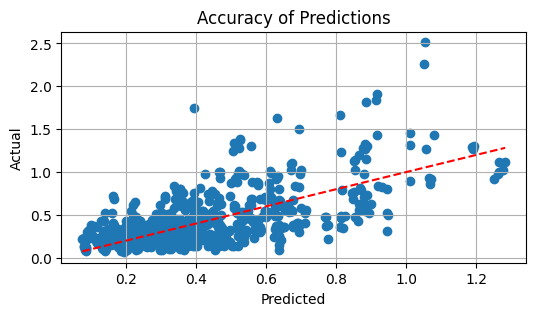




##### SIDE: side_T #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-804.39, 	MAPE=0.5131, 	R^2=0.7080
2. vapour_height        	AIC=-735.89, 	MAPE=0.6166, 	R^2=0.6797
3. failure_pressure     	AIC=-557.06, 	MAPE=0.6845, 	R^2=0.5923
4. ID                   	AIC=-646.70, 	MAPE=0.6872, 	R^2=0.6388
5. liquid_pct           	AIC=-374.16, 	MAPE=0.6892, 	R^2=0.4782


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -804.39, MAPE = 0.5131, R^2 = 0.7080):
1. vapour_height        	AIC=-1115.07, 	MAPE=0.4637, 	R^2=0.8085
2. failure_pressure     	AIC=-1048.02, 	MAPE=0.4738, 	R^2=0.7904
3. event_num            	AIC=-959.01, 	MAPE=0.4801, 	R^2=0.7637
4. ID                   	AIC=-1014.27, 	MAPE=0.4882, 	R^2=0.7806
5. obstacle_dist        	AIC=-905.31, 	MAPE=0.4885, 	R^2=0.7459


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -1115.07, MAPE = 0.4637, R^2 = 0.8085):
1. obstacle_h           	AIC=-1115.79, 	MAPE=0.4595, 	R^2=0.8092
2. substance            	AIC=-1127.74, 	MAPE=0.4624, 	R^2=0.8123
3. net_sensor_dist      	AIC=-1113.07, 	MAPE=0.4637, 	R^2=0.8085
4. obstacle_dist        	AIC=-1114.55, 	MAPE=0.4638, 	R^2=0.8089
5. superheated_status   	AIC=-1116.12, 	MAPE=0.4640, 	R^2=0.8093


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.4637 
AIC:	-1115.07

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.808
Method:                 Least Squares   F-statistic:                              1560.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                   5.38e-266
Time:                        14:48:22   Log-Likelihood:                          559.54
No. Observations:                 741   AIC:                                     -1115.
Df Residuals:                     739   BIC:                                     -1106.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025   

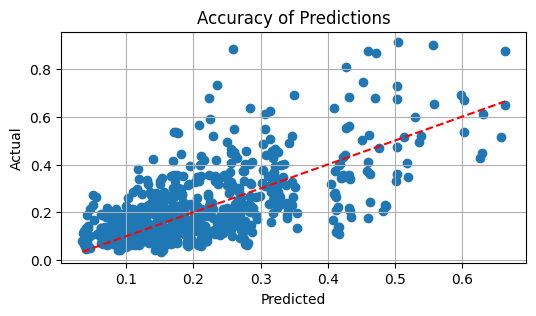




##### SIDE: side_R #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-979.20, 	MAPE=0.5305, 	R^2=0.6772
2. vapour_height        	AIC=-1088.27, 	MAPE=0.5442, 	R^2=0.7214
3. failure_pressure     	AIC=-841.07, 	MAPE=0.6363, 	R^2=0.6112
4. liquid_temp          	AIC=-1022.01, 	MAPE=0.6436, 	R^2=0.6953
5. vapour_temp          	AIC=-980.45, 	MAPE=0.6479, 	R^2=0.6778


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -979.20, MAPE = 0.5305, R^2 = 0.6772):
1. vapour_height        	AIC=-1392.60, 	MAPE=0.4280, 	R^2=0.8156
2. failure_pressure     	AIC=-1258.39, 	MAPE=0.4721, 	R^2=0.7790
3. obstacle_dist        	AIC=-1079.08, 	MAPE=0.4951, 	R^2=0.7186
4. obstacle_w           	AIC=-1055.24, 	MAPE=0.5002, 	R^2=0.7095
5. net_sensor_dist      	AIC=-1082.06, 	MAPE=0.5015, 	R^2=0.7198


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -1392.60, MAPE = 0.4280, R^2 = 0.8156):
1. substance            	AIC=-1412.49, 	MAPE=0.4248, 	R^2=0.8210
2. failure_pressure     	AIC=-1496.09, 	MAPE=0.4256, 	R^2=0.8400
3. obstacle_angle       	AIC=-1396.23, 	MAPE=0.4269, 	R^2=0.8170
4. superheated_status   	AIC=-1396.10, 	MAPE=0.4276, 	R^2=0.8170
5. net_sensor_dist      	AIC=-1391.02, 	MAPE=0.4279, 	R^2=0.8157


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.4280 
AIC:	-1392.60

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                              1637.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                   2.13e-272
Time:                        14:48:23   Log-Likelihood:                          698.30
No. Observations:                 742   AIC:                                     -1393.
Df Residuals:                     740   BIC:                                     -1383.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025   

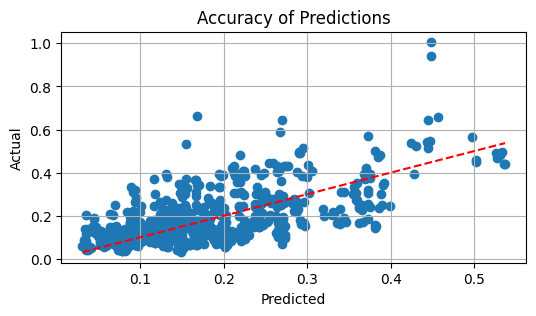

In [71]:
models = {}
side_dict = {1: "back", 2: "front", 3: "side_L", 4: "side_T", 5: "side_R"}

for side, df in grpd_sensor_side:
    print(f"\n##### SIDE: {side_dict[side]} #####\n")
    model_side = f"model_{side_dict[side]}" 
    model = forward_selected_mape(df, "tgt_pressure", criterion='aic', k=False)
    models[model_side] = model
    print("\n")

In [72]:
for model, (side, df) in zip(models.values(), grpd_sensor_side_vld):
    out_of_sample_test(model, df)

R^2: 0.1135, MAPE: 0.4616
R^2: -0.1179, MAPE: 0.6890
R^2: 0.2875, MAPE: 0.4292
R^2: 0.2700, MAPE: 0.4455
R^2: 0.1490, MAPE: 0.4196


In [73]:
for model, (side, df) in zip(models.values(), grpd_sensor_side_test):
    model.predict(df).clip(0)

In [ ]:
preds = [model.predict(df).clip(0) for model, (_, df) in zip(models.values(), grpd_sensor_side_test)]
preds_concat = pd.concat(preds).sort_index()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

### Testing by Sensor

In [103]:
grpd_sensor = ft_data.groupby("sensor_id")
grpd_sensor_vld = validation_split.groupby("sensor_id")
grpd_sensor_tst = test_split.groupby("sensor_id")
grpd_sensor_test = raw_test_data3.groupby("sensor_id")


##### SIDE: 4.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-550.73, 	MAPE=0.5662, 	R^2=0.6932
2. vapour_height        	AIC=-540.14, 	MAPE=0.6618, 	R^2=0.6800
3. failure_pressure     	AIC=-459.57, 	MAPE=0.7800, 	R^2=0.5595
4. liquid_pct           	AIC=-395.54, 	MAPE=0.7893, 	R^2=0.4320
5. ID                   	AIC=-478.37, 	MAPE=0.8029, 	R^2=0.5911


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -550.73, MAPE = 0.5662, R^2 = 0.6932):
1. vapour_height        	AIC=-658.15, 	MAPE=0.5476, 	R^2=0.8012
2. obstacle_h           	AIC=-565.49, 	MAPE=0.5604, 	R^2=0.7129
3. superheated_status   	AIC=-559.29, 	MAPE=0.5611, 	R^2=0.7058
4. substance            	AIC=-562.79, 	MAPE=0.5647, 	R^2=0.7098
5. liquid_pct           	AIC=-552.98, 	MAPE=0.5647, 	R^2=0.6983


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.5662 
AIC:	-550.73

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.692
Method:                 Least Squares   F-statistic:                              567.1
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                    2.42e-66
Time:                        22:21:33   Log-Likelihood:                          276.37
No. Observations:                 252   AIC:                                     -550.7
Df Residuals:                     251   BIC:                                     -547.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      

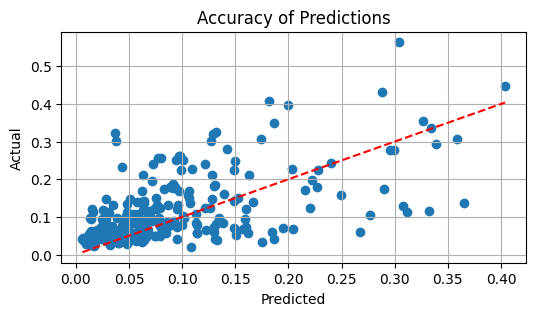




##### SIDE: 8.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-797.88, 	MAPE=0.5124, 	R^2=0.6664
2. vapour_height        	AIC=-843.19, 	MAPE=0.5157, 	R^2=0.7211
3. liquid_temp          	AIC=-822.57, 	MAPE=0.5736, 	R^2=0.6974
4. vapour_temp          	AIC=-807.20, 	MAPE=0.5803, 	R^2=0.6784
5. sensor_id            	AIC=-825.20, 	MAPE=0.5873, 	R^2=0.0000


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -797.88, MAPE = 0.5124, R^2 = 0.6664):
1. vapour_height        	AIC=-939.02, 	MAPE=0.3853, 	R^2=0.8105
2. failure_pressure     	AIC=-916.54, 	MAPE=0.4372, 	R^2=0.7929
3. vapour_temp          	AIC=-891.92, 	MAPE=0.4419, 	R^2=0.7718
4. liquid_temp          	AIC=-897.18, 	MAPE=0.4474, 	R^2=0.7765
5. BLEVE_h              	AIC=-838.54, 	MAPE=0.4481, 	R^2=0.7182


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -939.02, MAPE = 0.3853, R^2 = 0.8105):
1. substance            	AIC=-952.56, 	MAPE=0.3769, 	R^2=0.8218
2. BLEVE_h              	AIC=-941.03, 	MAPE=0.3807, 	R^2=0.8135
3. obstacle_dist        	AIC=-938.20, 	MAPE=0.3809, 	R^2=0.8114
4. net_sensor_dist      	AIC=-938.40, 	MAPE=0.3810, 	R^2=0.8116
5. obstacle_thk         	AIC=-942.17, 	MAPE=0.3815, 	R^2=0.8144


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.3853 
AIC:	-939.02

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              536.9
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                    2.14e-91
Time:                        22:21:37   Log-Likelihood:                          471.51
No. Observations:                 253   AIC:                                     -939.0
Df Residuals:                     251   BIC:                                     -932.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025    

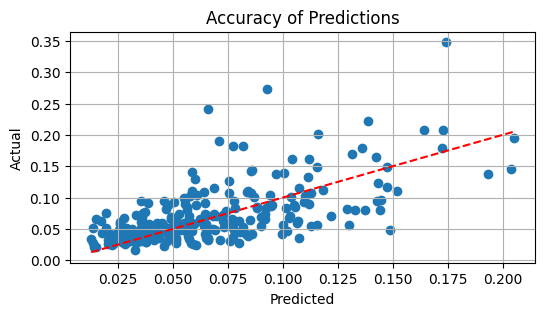




##### SIDE: 12.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=321.70, 	MAPE=0.5607, 	R^2=0.6923
2. vapour_height        	AIC=377.73, 	MAPE=0.7447, 	R^2=0.6157
3. liquid_pct           	AIC=493.41, 	MAPE=0.7816, 	R^2=0.3919
4. event_num            	AIC=463.16, 	MAPE=0.8348, 	R^2=0.4607
5. ID                   	AIC=421.53, 	MAPE=0.8417, 	R^2=0.5428


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 321.70, MAPE = 0.5607, R^2 = 0.6923):
1. superheated_status   	AIC=318.63, 	MAPE=0.5516, 	R^2=0.6985
2. net_sensor_dist      	AIC=317.94, 	MAPE=0.5528, 	R^2=0.6993
3. obstacle_h           	AIC=319.76, 	MAPE=0.5541, 	R^2=0.6971
4. obstacle_dist        	AIC=317.11, 	MAPE=0.5549, 	R^2=0.7003
5. liquid_pct           	AIC=323.01, 	MAPE=0.5552, 	R^2=0.6932


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.5607 
AIC:	321.70

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.692
Model:                            OLS   Adj. R-squared (uncentered):              0.691
Method:                 Least Squares   F-statistic:                              564.8
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                    3.42e-66
Time:                        22:21:39   Log-Likelihood:                         -159.85
No. Observations:                 252   AIC:                                      321.7
Df Residuals:                     251   BIC:                                      325.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0

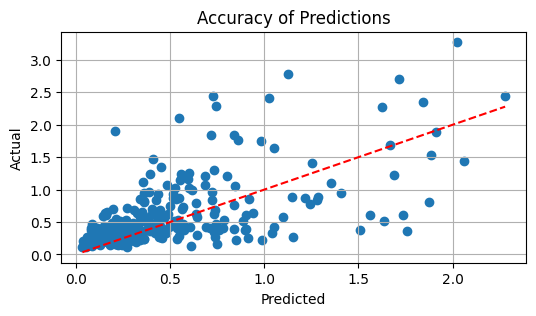




##### SIDE: 16.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. vapour_height        	AIC=359.13, 	MAPE=0.5887, 	R^2=0.6747
2. tank_volume          	AIC=431.23, 	MAPE=0.6384, 	R^2=0.5665
3. obstacle_h           	AIC=492.55, 	MAPE=0.7842, 	R^2=0.4465
4. failure_pressure     	AIC=453.60, 	MAPE=0.8088, 	R^2=0.5261
5. obstacle_thk         	AIC=483.16, 	MAPE=0.8257, 	R^2=0.4668


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = 359.13, MAPE = 0.5887, R^2 = 0.6747):
1. tank_volume          	AIC=313.22, 	MAPE=0.5588, 	R^2=0.7312
2. obstacle_w           	AIC=361.13, 	MAPE=0.5889, 	R^2=0.6747
3. obstacle_h           	AIC=352.30, 	MAPE=0.5890, 	R^2=0.6860
4. superheated_status   	AIC=361.11, 	MAPE=0.5892, 	R^2=0.6747
5. substance            	AIC=353.02, 	MAPE=0.5893, 	R^2=0.6851


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 313.22, MAPE = 0.5588, R^2 = 0.7312):
1. obstacle_angle       	AIC=313.36, 	MAPE=0.5410, 	R^2=0.7332
2. obstacle_w           	AIC=310.62, 	MAPE=0.5521, 	R^2=0.7361
3. superheated_status   	AIC=313.60, 	MAPE=0.5618, 	R^2=0.7330
4. substance            	AIC=313.42, 	MAPE=0.5633, 	R^2=0.7332
5. obstacle_thk         	AIC=315.05, 	MAPE=0.5641, 	R^2=0.7314


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.5588 
AIC:	313.22

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              338.8
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                    9.01e-72
Time:                        22:21:41   Log-Likelihood:                         -154.61
No. Observations:                 251   AIC:                                      313.2
Df Residuals:                     249   BIC:                                      320.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025     

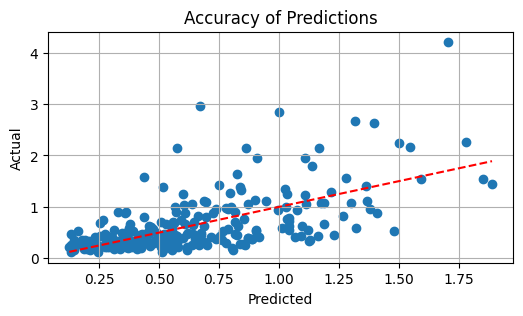




##### SIDE: 20.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=131.85, 	MAPE=0.5459, 	R^2=0.6714
2. vapour_height        	AIC=104.77, 	MAPE=0.5819, 	R^2=0.7046
3. obstacle_dist        	AIC=244.79, 	MAPE=0.6902, 	R^2=0.4874
4. failure_pressure     	AIC=185.41, 	MAPE=0.7023, 	R^2=0.5942
5. ID                   	AIC=165.47, 	MAPE=0.7036, 	R^2=0.6249


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = 131.85, MAPE = 0.5459, R^2 = 0.6714):
1. vapour_height        	AIC=3.15, 	MAPE=0.4812, 	R^2=0.8036
2. obstacle_dist        	AIC=113.75, 	MAPE=0.5053, 	R^2=0.6964
3. net_sensor_dist      	AIC=110.03, 	MAPE=0.5122, 	R^2=0.7008
4. failure_pressure     	AIC=48.79, 	MAPE=0.5126, 	R^2=0.7649
5. substance            	AIC=116.15, 	MAPE=0.5133, 	R^2=0.6935


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = 3.15, MAPE = 0.4812, R^2 = 0.8036):
1. substance            	AIC=2.39, 	MAPE=0.4799, 	R^2=0.8057
2. superheated_status   	AIC=4.33, 	MAPE=0.4813, 	R^2=0.8042
3. obstacle_h           	AIC=5.01, 	MAPE=0.4816, 	R^2=0.8037
4. liquid_pct           	AIC=3.98, 	MAPE=0.4833, 	R^2=0.8045
5. obstacle_w           	AIC=4.94, 	MAPE=0.4834, 	R^2=0.8037


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.4812 
AIC:	3.15

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.804
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              515.4
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                    8.82e-90
Time:                        22:21:44   Log-Likelihood:                         0.42522
No. Observations:                 254   AIC:                                      3.150
Df Residuals:                     252   BIC:                                      10.22
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0

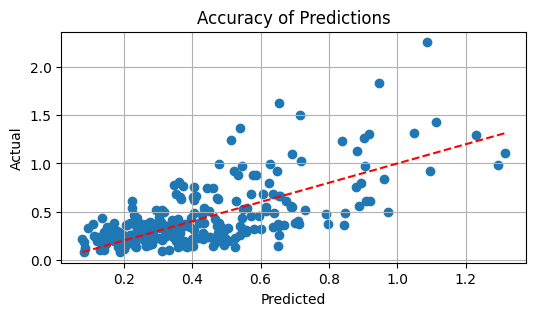




##### SIDE: 24.0 #####


Best variables (current: AIC = inf, MAPE = inf, R^2 = 0.0000):
1. tank_volume          	AIC=-414.29, 	MAPE=0.4994, 	R^2=0.7358
2. vapour_height        	AIC=-399.66, 	MAPE=0.5570, 	R^2=0.7201
3. liquid_temp          	AIC=-388.47, 	MAPE=0.6385, 	R^2=0.7075
4. failure_pressure     	AIC=-326.47, 	MAPE=0.6388, 	R^2=0.6267
5. ID                   	AIC=-361.85, 	MAPE=0.6452, 	R^2=0.6752


Variable to add (1-5):  1



### Adding tank_volume ###

Best variables (current: AIC = -414.29, MAPE = 0.4994, R^2 = 0.7358):
1. vapour_height        	AIC=-555.23, 	MAPE=0.4068, 	R^2=0.8495
2. failure_pressure     	AIC=-521.14, 	MAPE=0.4296, 	R^2=0.8279
3. vapour_temp          	AIC=-505.16, 	MAPE=0.4500, 	R^2=0.8167
4. ID                   	AIC=-507.08, 	MAPE=0.4504, 	R^2=0.8181
5. obstacle_dist        	AIC=-456.55, 	MAPE=0.4506, 	R^2=0.7781


Variable to add (1-5):  1



### Adding vapour_height ###

Best variables (current: AIC = -555.23, MAPE = 0.4068, R^2 = 0.8495):
1. failure_pressure     	AIC=-599.53, 	MAPE=0.3941, 	R^2=0.8746
2. substance            	AIC=-561.52, 	MAPE=0.4033, 	R^2=0.8543
3. obstacle_dist        	AIC=-553.97, 	MAPE=0.4048, 	R^2=0.8499
4. obstacle_w           	AIC=-554.27, 	MAPE=0.4050, 	R^2=0.8501
5. obstacle_angle       	AIC=-553.50, 	MAPE=0.4060, 	R^2=0.8497


Variable to add (1-5):  0




### METRICS ###
MAPE:	0.4068 
AIC:	-555.23

                                  OLS Regression Results                                
Dep. Variable:           tgt_pressure   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              711.2
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                   2.33e-104
Time:                        22:21:49   Log-Likelihood:                          279.62
No. Observations:                 254   AIC:                                     -555.2
Df Residuals:                     252   BIC:                                     -548.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025    

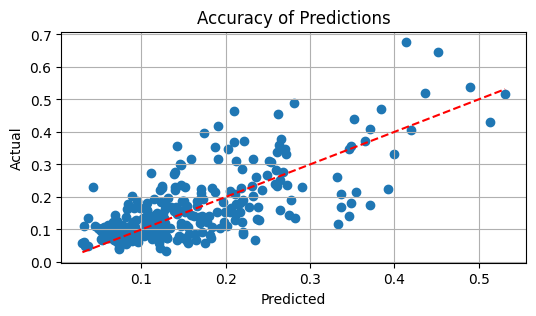

In [443]:
models = {}

for side, df in grpd_sensor:
    if side % 4 == 0:
        print(f"\n##### SIDE: {side} #####\n")
        model_side = f"model_{side}" 
        model = forward_selected_mape(df, "tgt_pressure", criterion='aic', k=False)
        models[model_side] = model
        print("\n")

In [104]:
sensor10 = ft_data.query("sensor_id == 10")

In [105]:
temp = sensor10.sort_values("tgt_pressure", ascending = False).round(2).drop(columns = ["ID", "event_num", "BLEVE_h", "obstacle_angle", "sensor_side", "sensor_id", "sensor_location"]).reset_index(drop = True)

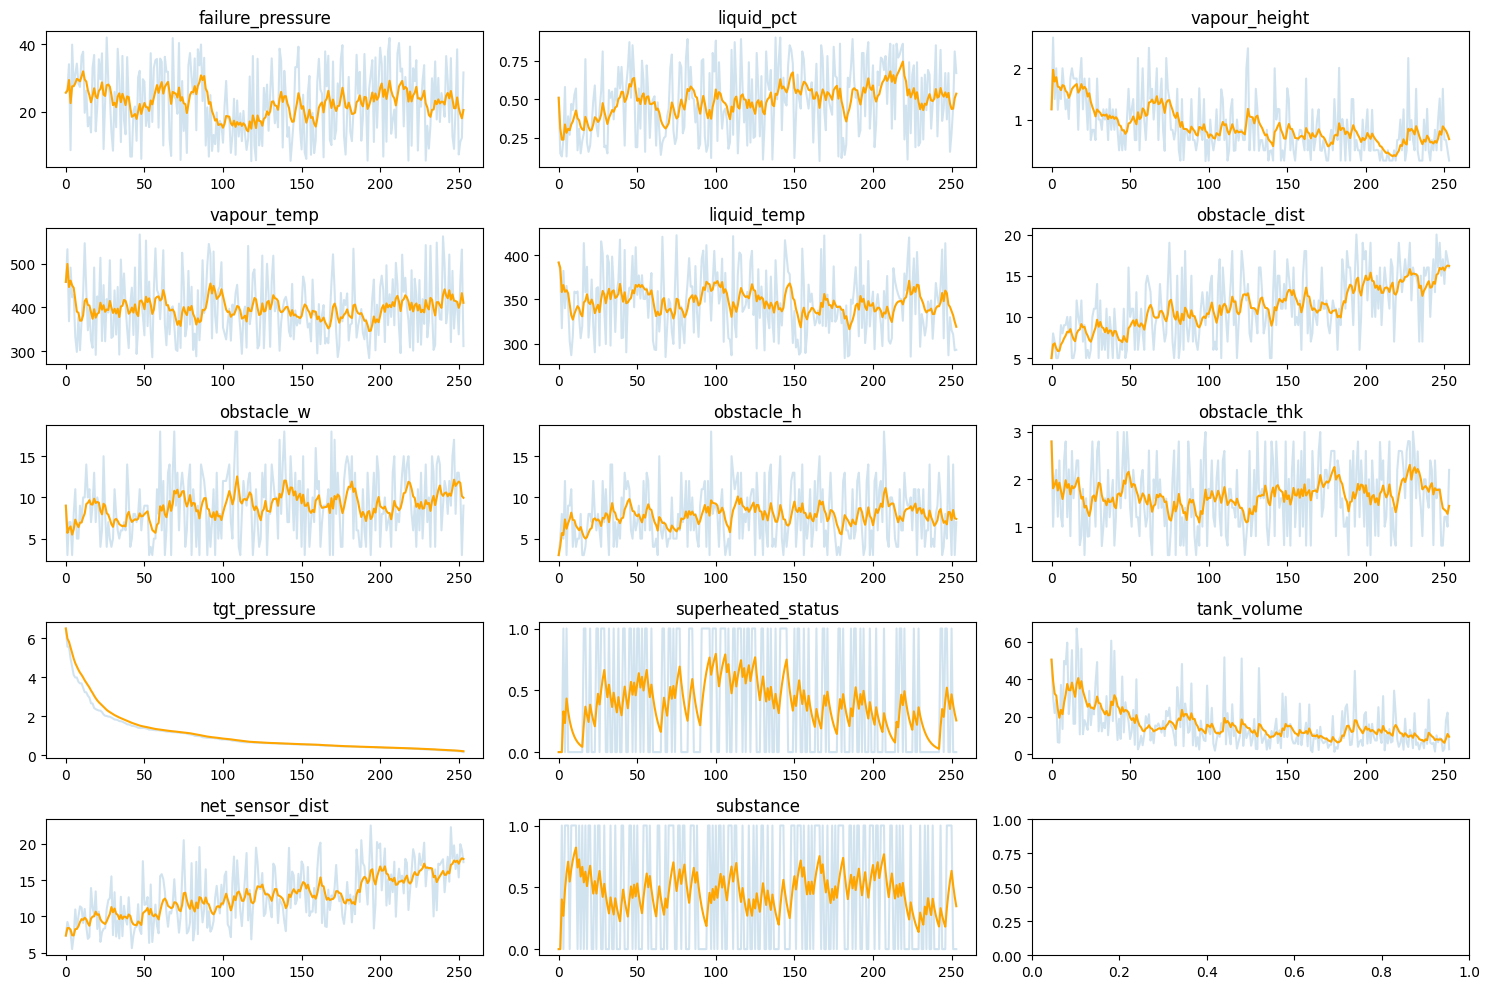

In [106]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(temp.columns):
    ax = axes[i]
    ax.plot(temp.index, temp[column], alpha = 0.2)
    ewma = temp[column].ewm(span=10).mean()
    ax.plot(temp.index, ewma, label='EWMA', color='orange')
    ax.set_title(column)

plt.tight_layout()
plt.show()


In [107]:
models = {}

m1 = ["tank_volume", "vapour_height", "net_sensor_dist", "failure_pressure"]
m2 = ["tank_volume", "vapour_height"]
m3 = ["tank_volume", "vapour_height"]

for side, df in grpd_sensor:
    if side <= 9:
        model_side = f"model_{int(side)}" 
        temp_formula = f"tgt_pressure ~ {' + '.join(m1)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model
        
    elif side <= 15:
        model_side = f"model_{int(side)}" 
        temp_formula = f"tgt_pressure ~ {' + '.join(m2)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model

    else:
        model_side = f"model_{int(side)}" 
    
        temp_formula = f"tgt_pressure ~ {' + '.join(m3)} - 1"
        temp_model = sm.OLS.from_formula(temp_formula, df).fit()
        temp_mape = mape_calc(df["tgt_pressure"], temp_model.predict(df))
        temp_r2 = temp_model.rsquared
    
        models[model_side] = temp_model

In [108]:
mapes = []
for model, (side, df) in zip(models.values(), grpd_sensor_vld):
    if side in [10,16]:
        print("\n")
    
    temp_r2, temp_mape = out_of_sample_test(model, df, print_output = False)
    mapes.append(temp_mape)

print(f"\nAverage MAPE: {sum(mapes)/len(mapes):.4f}")

R^2: 0.4501, MAPE: 0.2478
R^2: 0.3744, MAPE: 0.2669
R^2: 0.4162, MAPE: 0.3168
R^2: 0.5818, MAPE: 0.3959
R^2: 0.5745, MAPE: 0.3999
R^2: 0.2101, MAPE: 0.3504
R^2: 0.5153, MAPE: 0.2935
R^2: 0.3843, MAPE: 0.3217
R^2: 0.5316, MAPE: 0.3235


R^2: 0.2785, MAPE: 0.6384
R^2: 0.3542, MAPE: 0.5036
R^2: 0.4037, MAPE: 0.5596
R^2: 0.1490, MAPE: 0.7049
R^2: 0.1248, MAPE: 0.5209
R^2: 0.1152, MAPE: 0.5625


R^2: 0.2462, MAPE: 0.5336
R^2: 0.2650, MAPE: 0.4620
R^2: 0.3204, MAPE: 0.4882
R^2: 0.2767, MAPE: 0.4231
R^2: 0.2919, MAPE: 0.3809
R^2: 0.3875, MAPE: 0.3971
R^2: 0.3967, MAPE: 0.4072
R^2: 0.1920, MAPE: 0.4487
R^2: 0.3383, MAPE: 0.3790
R^2: 0.1214, MAPE: 0.4457
R^2: 0.0511, MAPE: 0.4171
R^2: 0.2699, MAPE: 0.3878

Average MAPE: 0.4288


In [109]:
for model, (side, df) in zip(models.values(), grpd_sensor_vld):
    if side in [10,16]:
        print("\n")
    out_of_sample_test(model, df)

R^2: 0.4501, MAPE: 0.2478
R^2: 0.3744, MAPE: 0.2669
R^2: 0.4162, MAPE: 0.3168
R^2: 0.5818, MAPE: 0.3959
R^2: 0.5745, MAPE: 0.3999
R^2: 0.2101, MAPE: 0.3504
R^2: 0.5153, MAPE: 0.2935
R^2: 0.3843, MAPE: 0.3217
R^2: 0.5316, MAPE: 0.3235


R^2: 0.2785, MAPE: 0.6384
R^2: 0.3542, MAPE: 0.5036
R^2: 0.4037, MAPE: 0.5596
R^2: 0.1490, MAPE: 0.7049
R^2: 0.1248, MAPE: 0.5209
R^2: 0.1152, MAPE: 0.5625


R^2: 0.2462, MAPE: 0.5336
R^2: 0.2650, MAPE: 0.4620
R^2: 0.3204, MAPE: 0.4882
R^2: 0.2767, MAPE: 0.4231
R^2: 0.2919, MAPE: 0.3809
R^2: 0.3875, MAPE: 0.3971
R^2: 0.3967, MAPE: 0.4072
R^2: 0.1920, MAPE: 0.4487
R^2: 0.3383, MAPE: 0.3790
R^2: 0.1214, MAPE: 0.4457
R^2: 0.0511, MAPE: 0.4171
R^2: 0.2699, MAPE: 0.3878


In [81]:
for model, (side, df) in zip(models.values(), grpd_sensor_test):
    model.predict(df).clip(0)

In [ ]:
preds = [model.predict(df).clip(0) for model, (_, df) in zip(models.values(), grpd_sensor_test)]
preds_concat = pd.concat(preds).sort_index()

In [ ]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

In [110]:
coefficients_df = pd.DataFrame()

for i, model in enumerate(models.values()):
    coefficients = model.params
    coefficients_df[f'{i+1}'] = coefficients

coefficients_df = coefficients_df.T
coefficients_df.index = coefficients_df.index.astype(int)

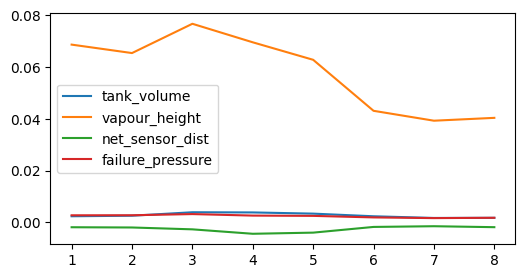

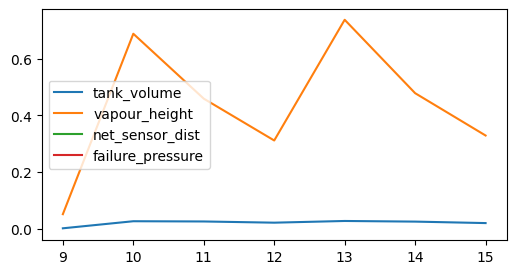

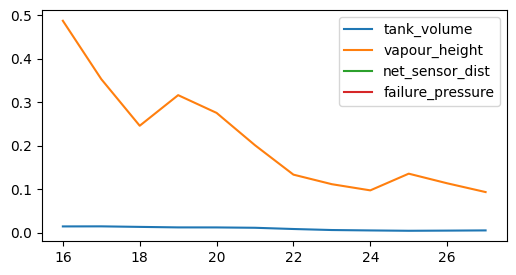

In [111]:
first_range = coefficients_df[coefficients_df.index < 9]
second_range = coefficients_df[(coefficients_df.index >= 9) & (coefficients_df.index <= 15)]
third_range = coefficients_df[coefficients_df.index > 15]

plt.figure(figsize=(6, 3))
for column in first_range.columns:
    plt.plot(first_range.index, first_range[column], label=column)
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
for column in second_range.columns:
    plt.plot(second_range.index, second_range[column], label=column)
plt.legend()
plt.show()

plt.figure(figsize=(6, 3))
for column in third_range.columns:
    plt.plot(third_range.index, third_range[column], label=column)
plt.legend()
plt.show()


In [144]:
# Implement standarisation
# df.dtypes --> check nums are nums (for erroneous vals)

# ML Implementation

In [92]:
# Use ReLU activation (or leaky ReLU if many neurons die)
# Hyperparams: grid search. Bayesian optimisation w ray tune and optuna

In [93]:
# Implement: RF, XGB, NN

In [94]:
mape_scorer = make_scorer(mape_calc, greater_is_better = False)

## Random Forest

### Data Preparation

In [95]:
dfs = ["grpd_sensor",
"grpd_sensor_vld", 
"grpd_sensor_tst",
"grpd_sensor_test"]

In [96]:
model_data = ft_data.copy()
model_val = validation_split.copy()
ext_test = raw_test_data3.copy()

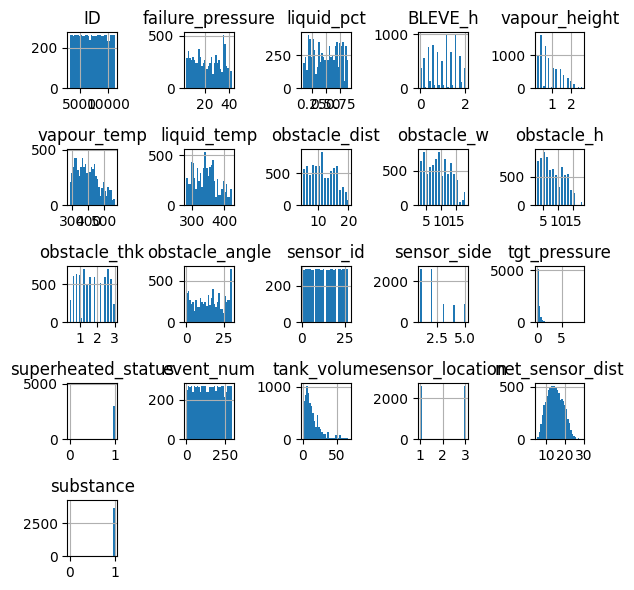

In [97]:
model_data.hist(bins = 30, figsize = (6,6))
plt.tight_layout()
plt.show()

Unnecessary data points:
* ID
* event_num
* sensor_location

In [98]:
model_data.drop(["ID", "event_num","sensor_location"], axis = 1, inplace = True)
model_val.drop(["ID", "event_num","sensor_location"], axis = 1, inplace = True)
ext_test.drop(["ID","sensor_location"], axis = 1, inplace = True)

### Initial Model

In [99]:
param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [3, 5, 8],
        'min_samples_leaf': [2, 3, 5]
    }

In [100]:
def rf_fxn(sensor_id, model_data, validation_split, param_grid, grid_search = True, prediction = False):
    train_data = model_data[model_data['sensor_id'] == sensor_id]
    
    X_train = train_data.drop(['tgt_pressure'], axis=1)
    y_train = train_data['tgt_pressure']
    
    val_data = validation_split[validation_split['sensor_id'] == sensor_id]
    
    X_val = val_data.drop(['tgt_pressure'], axis=1)
    y_val = val_data['tgt_pressure']


    if grid_search == True:
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring = mape_scorer, verbose = 0, cv = 3, n_jobs = -1)
    
        # temp_time = time.time()
        grid_search.fit(X_train, y_train)
        # print(f"{sensor_id} time: {time.time() - temp_time:.2f}")
        
        best_rf_model = grid_search.best_estimator_
        y_pred = best_rf_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape, grid_search.best_params_


    else:
        n_estimators = param_grid["n_estimators"]
        max_depth = param_grid["max_depth"]
        min_samples_leaf = param_grid["min_samples_leaf"]
        min_samples_split = param_grid["min_samples_split"]
        
        rf_model = RandomForestRegressor(n_estimators = n_estimators, 
                                         max_depth = max_depth, 
                                         min_samples_leaf = min_samples_leaf, 
                                         min_samples_split = min_samples_split, 
                                         random_state=42)
        rf_model.fit(X_train, y_train)
    
        if prediction == True:
            X_test = raw_test_data3[raw_test_data3['sensor_id'] == sensor_id]
        
            y_pred_array = rf_model.predict(X_test)
            y_pred = pd.Series(y_pred_array, X_test.index).clip(lower = 0)
            
            return y_pred
            
       
        y_pred = rf_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape

In [560]:
mapes = []
unique_sensors = model_data['sensor_id'].sort_values().unique()
params_dict = {}

for sensor in unique_sensors:
    mape, best_params = rf_train_and_eval(sensor, model_data, model_val, param_grid)
    sensor_str = str(int(sensor)).rjust(2)
    print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
    mapes.append(mape)
    params_dict[sensor] = best_params

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

params_df = pd.DataFrame(params_dict).T

 1: 0.15074 	 | {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}
 2: 0.16709 	 | {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 500}
 3: 0.21136 	 | {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 500}
 4: 0.33343 	 | {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}
 5: 0.32256 	 | {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
 6: 0.26123 	 | {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
 7: 0.23388 	 | {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
 8: 0.25320 	 | {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
 9: 0.23269 	 | {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}
10: 0.36504 	 | {'max_depth': None, 'min_samples_leaf': 3, 'min_samp

In [112]:
param_grid = {
        'n_estimators': [20, 50, 100],
        'max_depth': [None, 10, 15],
        'min_samples_split': [3],
        'min_samples_leaf': [1, 2, 3, 4]
    }

In [113]:
# After new data split
mapes = []
unique_sensors = model_data['sensor_id'].sort_values().unique()
params_dict = {}

for sensor in unique_sensors:
    mape, best_params = rf_fxn(sensor, model_data, model_val, param_grid)
    sensor_str = str(int(sensor)).rjust(2)
    print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
    mapes.append(mape)
    params_dict[sensor] = best_params

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

params_df = pd.DataFrame(params_dict).T
display(params_df)

 1: 0.18044 	 | {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
 2: 0.21267 	 | {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
 3: 0.32302 	 | {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
 4: 0.39864 	 | {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
 5: 0.36801 	 | {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
 6: 0.29660 	 | {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
 7: 0.26076 	 | {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
 8: 0.27056 	 | {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
 9: 0.29468 	 | {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
10: 0.38683 	 | {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split':

max_depth  min_samples_leaf  min_samples_split  n_estimators
1.0         NaN               3.0                3.0         100.0
2.0         NaN               2.0                3.0          50.0
3.0        10.0               3.0                3.0         100.0
4.0        10.0               3.0                3.0         100.0
5.0         NaN               3.0                3.0         100.0
6.0         NaN               2.0                3.0         100.0
7.0        10.0               2.0                3.0          50.0
8.0        10.0               3.0                3.0         100.0
9.0        10.0               2.0                3.0          50.0
10.0       10.0               3.0                3.0          50.0
11.0        NaN               2.0                3.0          50.0
12.0       10.0               2.0                3.0          20.0
13.0        NaN               3.0                3.0          50.0
14.0       10.0               3.0                3.0         100.0
15.0        NaN               2.0                3.0         100.0
16.0        NaN               3.0                3.0         100.0
17.0        NaN               2.0                3.0         100.0
18.0        NaN               3.0                3.0         100.0
19.0       10.0               1.0                3.0          50.0
20.0       10.0               2.0                3.0         100.0
21.0        NaN               2.0                3.0          20.0
22.0       10.0               2.0                3.0         100.0
23.0        NaN               2.0                3.0         100.0
24.0        NaN               3.0                3.0          50.0
25.0       10.0               3.0                3.0          50.0
26.0        NaN               4.0                3.0         100.0
27.0       10.0               3.0                3.0          50.0

In [575]:
mapes = []
unique_sensors = model_data['sensor_id'].sort_values().unique()
params_dict = {}

for sensor in unique_sensors:
    mape, best_params = rf_train_and_eval(sensor, model_data, model_val, param_grid)
    sensor_str = str(int(sensor)).rjust(2)
    print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
    mapes.append(mape)
    params_dict[sensor] = best_params

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

params_df = pd.DataFrame(params_dict).T
display(params_df)

 1: 0.15361 	 | {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 50}
 2: 0.16900 	 | {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
 3: 0.21091 	 | {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 20}
 4: 0.34764 	 | {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 50}
 5: 0.32548 	 | {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
 6: 0.26423 	 | {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
 7: 0.23561 	 | {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}
 8: 0.25782 	 | {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}
 9: 0.22820 	 | {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
10: 0.39914 	 | {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split'

In [577]:
for col in params_df:
    display(pd.DataFrame(params_df[col].value_counts()).reset_index())

max_depth  count
0       10.0     11
1       15.0      1

min_samples_leaf  count
0               3.0     12
1               2.0      8
2               1.0      4
3               4.0      3

min_samples_split  count
0                3.0     27

n_estimators  count
0         100.0     12
1          20.0      8
2          50.0      7

In [101]:
class TreeCV:
    """Perform a cross-validation for chosen hyperparameter"""

    def __init__(self, X, Y, hp="max_depth", tree_type = "rf"):
        """Save training data"""
        self.X = X    # features
        self.Y = Y    # targets
        self.hp = hp  # hyperparameter
        self.tree_type = tree_type

    def set_method(self, hp):
        """Set hyperparameter to use"""
        self.hp = hp

    def cross_me(self, *hp_vals):
        """Perform cross validation for given hyperparameter values"""
        self.scores = []  # the accuracy table
        self.best = None  # the best fit

        best_score = 0

        for hp in hp_vals:
            # create a tree with given hyperparameter cut
            if self.tree_type == "rf":
                fit = RandomForestRegressor(random_state=42, **{self.hp: hp})
            elif self.tree_type == "xgb":
                fit = XGBRegressor(random_state=42, **{self.hp: hp})
            else:
                raise ValueError("Invalid tree_type")

            # calculate a cross validation scores and a mean value
            score = cross_val_score(fit, self.X, self.Y).mean()

            # update best fit if necessary
            if score > best_score:
                self.best = fit
                best_score = score

            self.scores.append([hp, score])

        # train the best fit
        self.best.fit(self.X, self.Y)

    def plot(self):
        """Plot accuracy as a function of hyperparameter values and best fit"""
        plt.figure(figsize=(3, 2))

        plt.xlabel(self.hp)
        plt.ylabel("accuracy")

        plt.plot(*zip(*self.scores), marker = "o")
        plt.title(f"{self.hp}")

        plt.show()


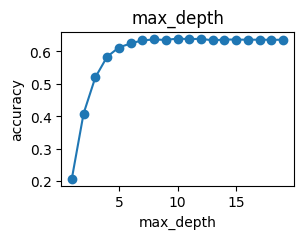

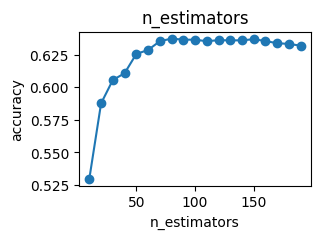

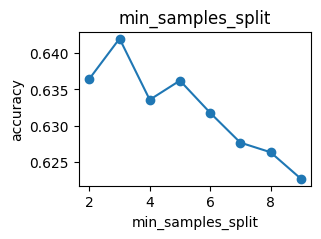

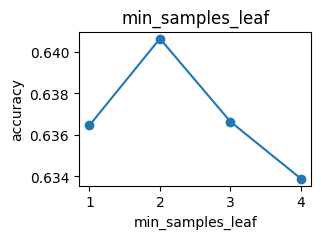

In [290]:
tree_handler = TreeCV(temp_x, temp_y, "max_depth")
tree_handler.cross_me(*range(1, 20))
tree_handler.plot()

tree_handler = TreeCV(temp_x, temp_y, "n_estimators")
tree_handler.cross_me(*range(10, 200, 10))
tree_handler.plot()

tree_handler = TreeCV(temp_x, temp_y, "min_samples_split")
tree_handler.cross_me(*range(2, 10))
tree_handler.plot()

tree_handler = TreeCV(temp_x, temp_y, "min_samples_leaf")
tree_handler.cross_me(*range(1, 5))
tree_handler.plot()

### Model Creation

In [128]:
final_param_grid = {
        'n_estimators': 100, 
        'max_depth': 10, 
        'min_samples_split': 3,
        'min_samples_leaf': 2
    }

In [703]:
preds = []
unique_sensors = model_data['sensor_id'].sort_values().unique()

for sensor in unique_sensors:
    temp_pred = rf_final(sensor, model_data, model_val, final_param_grid, prediction = True)
    preds.append(temp_pred)
    
preds_concat = pd.concat(preds).sort_index()


In [705]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

## XGBoost

In [107]:
# Saving train and val data for each sensor to "data_dict"
data_dict = {}

for sensor in unique_sensors:
    train_data = model_data[model_data['sensor_id'] == sensor]
    
    X_train = train_data.drop(['tgt_pressure'], axis=1)
    y_train = train_data['tgt_pressure']
    
    val_data = model_val[model_val['sensor_id'] == sensor]
    val_data.drop([])
    
    X_val = val_data.drop(['tgt_pressure'], axis=1)
    y_val = val_data['tgt_pressure']

    X_test_ext = ext_test[ext_test['sensor_id'] == sensor]
    
    data_dict[sensor] = (X_train, y_train, X_val, y_val, X_test_ext)

In [108]:
X_train_1, y_train_1, X_val_1, y_val_1, X_test_ext_1 = data_dict[1]

### Functions

In [115]:
def param_freq(params_df):
    for col in params_df.columns:
        display(pd.DataFrame(params_df[col].value_counts()).reset_index())

In [104]:
def gridCV_sim(fxn = "xgb", params_df = True):
    mapes = []
    params_dict = {}
    
    for sensor, dict_val in data_dict.items():
        if fxn == "xgb":
            mape, best_params = xgb_fxn(dict_val, param_grid)
        sensor_str = str(int(sensor)).rjust(2)
        print(f"{sensor_str}: {mape:.5f} \t | {best_params}")
        mapes.append(mape)
        params_dict[sensor] = best_params
    
    print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

    if params_df:
        params_df = pd.DataFrame(params_dict).T
        param_freq(params_df)

In [105]:
# Grid Search
def xgb_fxn(dict_val, param_grid, grid_search = True, prediction = False):
    
    X_train, y_train, X_val, y_val, X_test_ext = dict_val
    
    if grid_search == True:
        xgb_reg = XGBRegressor(random_state = 42,
                          # n_estimators = 50,
                          # max_depth = 6, 
                          early_stopping_rounds = 10,
                          eval_metric = "mape",
                         )
        
        grid_search = GridSearchCV(estimator = xgb_reg, 
                                   param_grid = param_grid, 
                                   scoring = mape_scorer, 
                                   verbose = 0, 
                                   cv = 3, 
                                   n_jobs = -1)
    
        # temp_time = time.time()
        grid_search.fit(X_train, 
                        y_train,
                        eval_set = [(X_val, y_val)],
                        verbose = False
                       )
        # print(f"{sensor_id} time: {time.time() - temp_time:.2f}")
        
        best_xgb_model = grid_search.best_estimator_
        y_pred = best_xgb_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape, grid_search.best_params_


    else:

        xgb_model = XGBRegressor(n_estimators = param_grid["n_estimators"], 
                                max_depth = param_grid["max_depth"], 
                                eta = param_grid["eta"],
                                min_child_weight = param_grid["min_child_weight"],
                                random_state=42)
        xgb_model.fit(X_train, y_train)
    
        if prediction == True:
            y_pred_array = xgb_model.predict(X_test_ext)
            y_pred = pd.Series(y_pred_array, X_test_ext.index).clip(lower = 0)
            
            return y_pred
            
            
        y_pred = xgb_model.predict(X_val)
        mape = mape_calc(y_val, y_pred)
        
        return mape


### Models

In [314]:
preds = []
mapes = []

for sensor, (X_train, y_train, X_val, y_val, X_test_ext) in data_dict.items():
    xgb_reg = XGBRegressor(random_state = 42,
                          n_estimators = 100,
                          # max_depth = 6, 
                          early_stopping_rounds = 20,
                          eval_metric = "mape",
                         )
    xgb_reg.fit(X_train, 
               y_train, 
               verbose = False,
               eval_set = [(X_val, y_val)],
              )

    evals_result = xgb_reg.evals_result()
    final_mape = evals_result["validation_0"]["mape"][-1]
    print(f"{str(int(sensor)).rjust(2)}: {final_mape:.5f}")
    mapes.append(final_mape)

#     y_pred_array = xg_reg.predict(X_test_ext)
#     y_pred = pd.Series(y_pred_array, X_test_ext.index).clip(lower = 0)
#     preds.append(y_pred)

# preds_concat = pd.concat(preds).sort_index()

print(f"\nAvg MAPE: {np.mean(mapes):.5f}")

 1: 0.13723
 2: 0.14704
 3: 0.21699
 4: 0.30881
 5: 0.32117
 6: 0.27866
 7: 0.25430
 8: 0.23226
 9: 0.20506
10: 0.38446
11: 0.32909
12: 0.29899
13: 0.29565
14: 0.34848
15: 0.33716
16: 0.25796
17: 0.25970
18: 0.29624
19: 0.27555
20: 0.25084
21: 0.27391
22: 0.22905
23: 0.22746
24: 0.21263
25: 0.23036
26: 0.23152
27: 0.26682

Avg MAPE: 0.26324


### Tree CV

In [308]:
params_treecv = {"eta": [i/100 for i in range(1, 30, 2)],
                 "max_depth": range(1,10),
                 "n_estimators": range(10, 200, 10),
                 "min_child_weight": range(1,15),
                 "max_leaves": range(1, 20)
                }


In [309]:
temp = model_data[model_data['sensor_id'] == 2]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


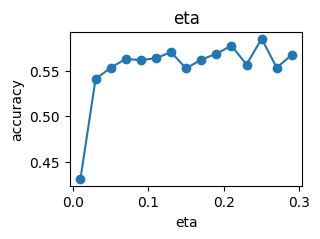

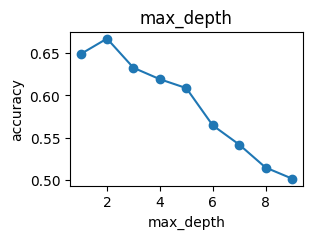

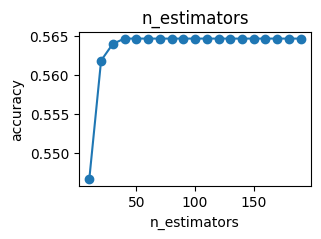

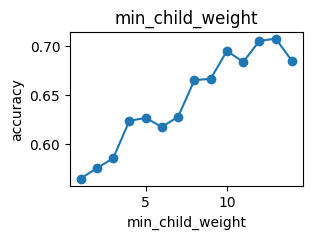

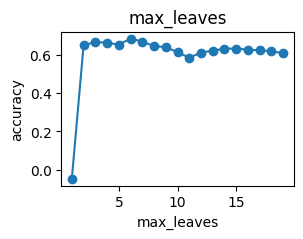

In [310]:
temp = model_data[model_data['sensor_id'] == 1]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


for hp, vals in params_treecv.items():
    tree_handler = TreeCV(temp_x, temp_y, hp, tree_type = "xgb")
    tree_handler.cross_me(*vals)
    tree_handler.plot()

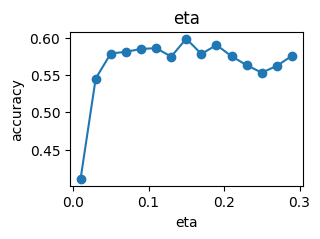

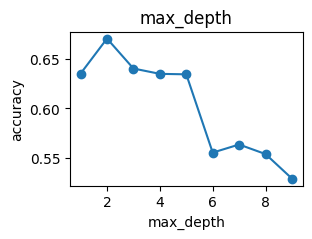

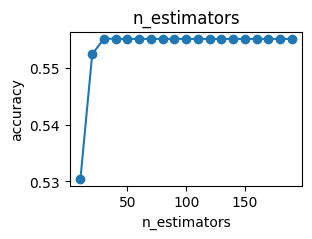

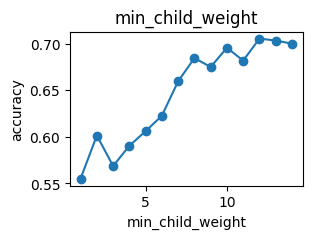

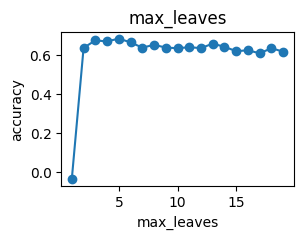

In [312]:
temp = model_data[model_data['sensor_id'] == 2]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


for hp, vals in params_treecv.items():
    tree_handler = TreeCV(temp_x, temp_y, hp, tree_type = "xgb")
    tree_handler.cross_me(*vals)
    tree_handler.plot()

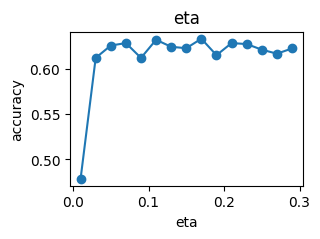

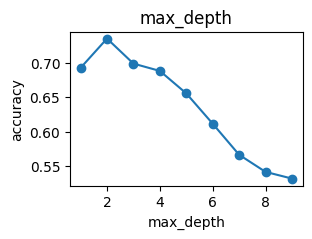

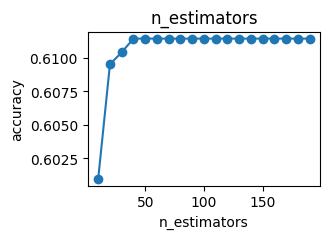

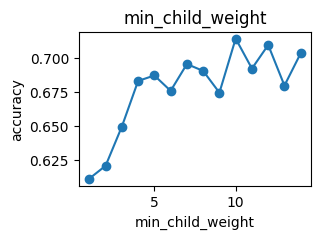

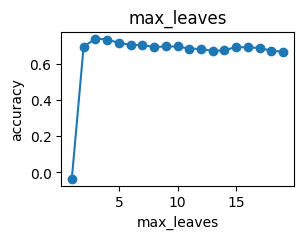

In [313]:
temp = model_data[model_data['sensor_id'] == 3]

temp_x = temp.drop(['tgt_pressure'], axis=1)
temp_y = temp['tgt_pressure']


for hp, vals in params_treecv.items():
    tree_handler = TreeCV(temp_x, temp_y, hp, tree_type = "xgb")
    tree_handler.cross_me(*vals)
    tree_handler.plot()

In [315]:
# Conclusion:
# eta = 0.1
# max_depth = 2
# n_estimators = 50

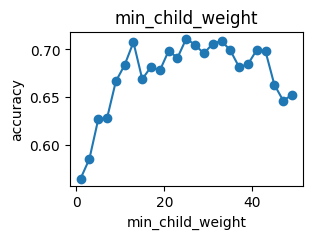

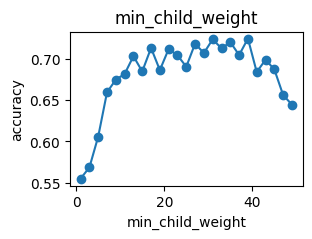

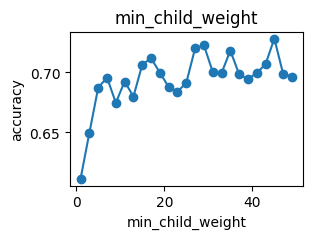

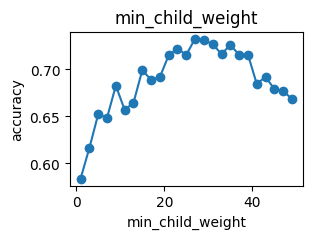

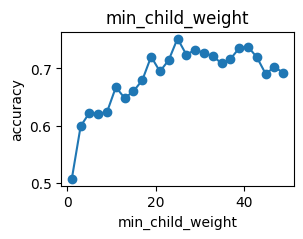

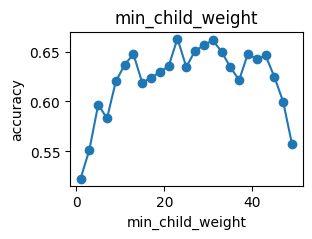

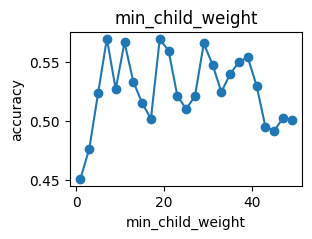

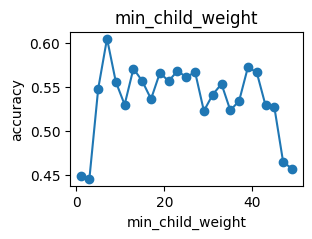

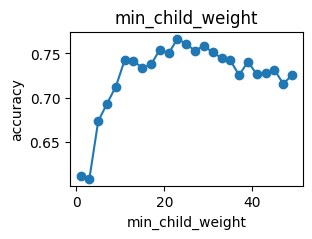

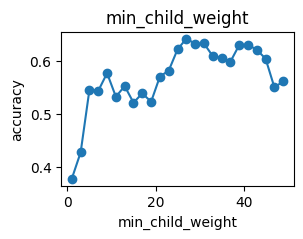

In [318]:
# Investigating min_child_weight further:
for i in range(10):
    temp = model_data[model_data['sensor_id'] == i+1]
    temp_x = temp.drop(['tgt_pressure'], axis=1)
    temp_y = temp['tgt_pressure']

    tree_handler = TreeCV(temp_x, temp_y, "min_child_weight", tree_type = "xgb")
    tree_handler.cross_me(*range(1,50,2))
    tree_handler.plot()

In [321]:
# Looking at the above data points, it apperas that maximum accuracy is generally achieved with a child weight bewteen 10 and 30

### Hyperparam Tuning

In [527]:
# After redefining train test split
gridCV_sim()

 1: 0.13782 	 | {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 20, 'n_estimators': 100}
 2: 0.16512 	 | {'eta': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
 3: 0.21914 	 | {'eta': 0.2, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100}
 4: 0.27946 	 | {'eta': 0.2, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100}
 5: 0.25837 	 | {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100}
 6: 0.24438 	 | {'eta': 0.2, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 50}
 7: 0.23319 	 | {'eta': 0.2, 'max_depth': 2, 'min_child_weight': 20, 'n_estimators': 100}
 8: 0.21410 	 | {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
 9: 0.18094 	 | {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100}
10: 0.32062 	 | {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
11: 0.36303 	 | {'eta': 0.2, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 50}
12: 0.33521 	 |

eta  count
0  0.2     16
1  0.1     11

max_depth  count
0        3.0     21
1        2.0      3
2        5.0      3

min_child_weight  count
0               1.0     13
1              10.0     11
2              20.0      3

n_estimators  count
0         100.0     25
1          50.0      2

In [528]:
param_grid = {
    'n_estimators': [80,100,150], 
    'max_depth': [1,2,3,4],
    "eta": [0.1,0.15,0.2],
    "min_child_weight": [3,5,10],
    }
gridCV_sim()

 1: 0.14761 	 | {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 80}
 2: 0.17036 	 | {'eta': 0.15, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100}
 3: 0.21914 	 | {'eta': 0.2, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 80}
 4: 0.32128 	 | {'eta': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100}
 5: 0.25826 	 | {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 150}
 6: 0.23416 	 | {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 150}
 7: 0.22190 	 | {'eta': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 150}
 8: 0.19868 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100}
 9: 0.17251 	 | {'eta': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 150}
10: 0.33742 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 80}
11: 0.36068 	 | {'eta': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 80}
12: 0.32013 	 | {

eta  count
0  0.15     13
1  0.20      8
2  0.10      6

max_depth  count
0        3.0     14
1        4.0     10
2        2.0      3

min_child_weight  count
0               3.0     12
1               5.0      8
2              10.0      7

n_estimators  count
0         150.0     12
1          80.0      8
2         100.0      7

In [529]:
param_grid = {
    'n_estimators': [80,150], 
    'max_depth': [3],
    "eta": [0.15],
    "min_child_weight": [5,8,10],
    }
gridCV_sim()

 1: 0.15551 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 150}
 2: 0.18060 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 80}
 3: 0.22837 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 80}
 4: 0.28086 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 150}
 5: 0.27030 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 80}
 6: 0.24494 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 80}
 7: 0.19443 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 150}
 8: 0.19868 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 150}
 9: 0.16758 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 150}
10: 0.31842 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 80}
11: 0.35131 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 150}
12: 0.32869 	

eta  count
0  0.15     27

max_depth  count
0        3.0     27

min_child_weight  count
0               5.0     13
1               8.0     10
2              10.0      4

n_estimators  count
0         150.0     20
1          80.0      7

In [530]:
param_grid = {
    'n_estimators': [100,], 
    'max_depth': [3],
    "eta": [0.15],
    "min_child_weight": [8],
    }
gridCV_sim()

 1: 0.14877 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
 2: 0.18060 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
 3: 0.22523 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
 4: 0.28086 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
 5: 0.27030 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
 6: 0.23305 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
 7: 0.20615 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
 8: 0.19885 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
 9: 0.16859 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
10: 0.33319 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
11: 0.30462 	 | {'eta': 0.15, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 100}
12: 0.3481

eta  count
0  0.15     27

max_depth  count
0        3.0     27

min_child_weight  count
0               8.0     27

n_estimators  count
0         100.0     27

In [531]:
final_param_grid = {
    'n_estimators': 100,
    'max_depth': 3,
    "eta": 0.15,
    "min_child_weight": 8,
    }

### Model Creation

In [541]:
# With the new data split
preds = []

for sensor, dict_val in data_dict.items():
    temp_pred = xgb_fxn(dict_val, final_param_grid, grid_search = False, prediction = True)
    preds.append(temp_pred)

preds_concat = pd.concat(preds).sort_index()

In [542]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)

## Neural Networks

In [116]:
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return (math.exp(2*x) - 1) / (math.exp(2*x) + 1)

def leaky_relu(x, alpha=0.01):
    return x if x >= 0 else alpha * x

In [117]:
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, pred, targets):
        return torch.mean(torch.abs(1 - pred / targets))


class torchNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(17,30),
            nn.ReLU(),
            nn.Linear(30,30),
            nn.ReLU(),
            nn.Linear(30,30),
            nn.ReLU(),
            nn.Linear(30,1),
        )

    def forward(self, x):
        x = self.layers(x)
        return x

In [118]:
torch_nn = torchNN()

In [119]:
criterion = CustomLoss()  # nn.MSELoss()
optimizer = torch.optim.Adam(torch_nn.parameters(), lr=0.001) # can try adamW

In [303]:
torch.manual_seed(42)

mapes = []

for sensor, (X_train, y_train, X_val, y_val, X_test_ext) in data_dict.items():
    torch_nn = torchNN()
    criterion = CustomLoss()  # nn.MSELoss()
    optimizer = torch.optim.Adam(torch_nn.parameters(), lr=0.001) # can try adamW
    
    X_torch = torch.tensor(X_train.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)


    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 20
    patience = patience_val
    
    n_epochs = 1000
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        output = torch_nn(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()
        print(f"{epoch}: {loss:.4f}")
    
        torch_nn.eval()
    
        with torch.no_grad():
            y_pred = pd.Series(torch_nn(X_val_torch).numpy().flatten(), index = X_val.index)
            mape = mape_calc(y_val, y_pred)
    
        if mape < best_score:
            best_score = mape
            best_model_weights = copy.deepcopy(torch_nn.state_dict())  # Deep copy here      
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

    mapes.append(mape)
    print(f"{str(int(sensor)).rjust(2)}: {best_score:.5f}\n")
    

np.mean(mapes)

0: 55.6679
1: 42.8511
2: 30.8155
3: 20.1696
4: 10.1161
5: 2.9328
6: 7.4042
7: 11.5240
8: 13.1130
9: 12.9312
10: 11.4662
11: 9.0367
12: 5.9132
13: 3.1110
14: 2.4488
15: 4.5378
16: 6.0792
17: 6.5187
18: 6.0440
19: 4.7925
20: 2.9555
21: 1.6760
22: 2.1663
23: 3.4376
24: 3.9291
25: 3.5490
26: 2.4753
27: 1.3715
28: 1.4684
29: 2.1997
30: 2.5464
31: 2.2443
32: 1.4521
33: 0.8916
34: 1.4612
35: 1.9397
36: 1.7326
37: 1.0058
38: 0.8137
39: 1.3423
40: 1.4955
41: 1.1100
42: 0.6758
43: 0.9778
44: 1.2129
45: 0.9437
46: 0.6504
47: 0.8897
48: 1.0180
49: 0.7982
50: 0.6376
51: 0.8250
52: 0.8393
53: 0.6361
54: 0.6648
55: 0.8038
56: 0.6550
57: 0.5789
58: 0.6881
59: 0.6170
60: 0.4944
61: 0.6337
62: 0.4658
63: 0.5610
64: 0.5313
65: 0.4301
66: 0.5084
67: 0.3867
68: 0.4664
69: 0.3679
70: 0.4602
71: 0.3459
72: 0.4111
73: 0.3490
74: 0.4021
75: 0.3341
76: 0.3794
77: 0.3315
78: 0.3607
79: 0.3180
80: 0.3405
81: 0.3087
82: 0.3389
83: 0.3177
84: 0.3271
85: 0.3165
86: 0.2967
87: 0.3148
88: 0.2919
89: 0.3291
90: 0.3033


0.685290389154563

In [120]:
torch.manual_seed(42)

mapes = []

for sensor, (X_train, y_train, X_val, y_val, X_test_ext) in data_dict.items():
    torch_nn = torchNN()
    criterion = CustomLoss()  # nn.MSELoss()
    optimizer = torch.optim.Adam(torch_nn.parameters(), lr=0.001) # can try adamW
    
    X_torch = torch.tensor(X_train.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)

    n_epochs = 1000
    
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        output = torch_nn(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()
    
    torch_nn.eval()

    with torch.no_grad():
        y_pred = pd.Series(torch_nn(X_val_torch).numpy().flatten(), index = X_val.index)
        # print(y_pred, y_val)
    # display(y_pred.head())
    # display(y_pred.shape, y_val.shape)
    mape = mape_calc(y_val, y_pred)
    mapes.append(mape)
    print(f"{str(int(sensor)).rjust(2)}: {mape:.5f}")

np.mean(mapes)

 1: 0.21372
 2: 0.20088
 3: 0.24356
 4: 0.34921
 5: 0.78063
 6: 0.42000
 7: 0.29010
 8: 0.26939
 9: 0.29051
10: 0.30116
11: 0.33184
12: 0.31576
13: 0.26190
14: 0.30164
15: 0.32796
16: 0.24857
17: 0.27402
18: 0.30270
19: 0.29278
20: 0.34822
21: 0.41999
22: 0.31917
23: 0.26275
24: 0.27244
25: 0.31658
26: 0.23256
27: 0.35964


0.31658109736468965

### Bayesian Optimisation

#### Set-Up and First Optimisation

In [123]:
def model_builder(trial):
    n_layers = trial.suggest_int("n_layers", 1, 5)
    layers = []
    
    in_features = 17
    activation = trial.suggest_categorical("activation", ["ReLU","Tanh","LeakyReLU"])
    
    for i in range(n_layers):
        out_features = trial.suggest_int(f"n_units_l{i}", 4, 128)
        layers.append(nn.Linear(in_features, out_features))

        if activation == "Tanh":
            layers.append(nn.Tanh())
        elif activation == "LeakyReLU":
            layers.append(nn.LeakyReLU())
        else: 
            layers.append(nn.ReLU())
        
        # p = trial.suggest_float(f"dropout_l{i}", 0.1, 0.5)
        # layers.append(nn.Drouput(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)


def objective(trial):    
    X_torch = torch.tensor(X_train_1.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train_1.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val_1.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val_1.values, dtype=torch.float32).reshape(-1, 1)
    
    nn_model = model_builder(trial)
    # print(nn_model)

    optimizer_name = trial.suggest_categorical("optimizer",["Adam","SGD"])
    lr = trial.suggest_float("lr",1e-5,5e-2, log = True)
    optimizer = getattr(torch.optim,optimizer_name)(nn_model.parameters(), lr = lr)
    criteron = CustomLoss()
    
    n_epochs = 100    
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        output = nn_model(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()

    nn_model.eval()
    with torch.no_grad():        
        y_pred = pd.Series(nn_model(X_val_torch).numpy().flatten(), index = X_val_1.index)
        score = mape_calc(y_val_1, y_pred)

    

    return score
    
    

In [146]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))

[I 2024-04-27 16:13:48,700] A new study created in memory with name: no-name-adb1cbaa-3208-4df2-8b22-c0c2764b363d


In [147]:
study.optimize(objective, n_trials = 200, n_jobs = -1)

[I 2024-04-27 16:13:49,266] Trial 5 finished with value: 0.2901982160045882 and parameters: {'n_layers': 1, 'activation': 'ReLU', 'n_units_l0': 107, 'optimizer': 'SGD', 'lr': 0.0013555575343473269}. Best is trial 5 with value: 0.2901982160045882.
[I 2024-04-27 16:13:49,297] Trial 7 finished with value: 0.3296182630870931 and parameters: {'n_layers': 1, 'activation': 'Tanh', 'n_units_l0': 13, 'optimizer': 'SGD', 'lr': 0.0005193950196543275}. Best is trial 5 with value: 0.2901982160045882.
[I 2024-04-27 16:13:49,356] Trial 2 finished with value: 0.4807255270713842 and parameters: {'n_layers': 2, 'activation': 'ReLU', 'n_units_l0': 69, 'n_units_l1': 6, 'optimizer': 'SGD', 'lr': 4.8358729189803605e-05}. Best is trial 5 with value: 0.2901982160045882.
[I 2024-04-27 16:13:49,416] Trial 1 finished with value: 1.002124283488276 and parameters: {'n_layers': 2, 'activation': 'Tanh', 'n_units_l0': 5, 'n_units_l1': 48, 'optimizer': 'SGD', 'lr': 0.0013298392981955789}. Best is trial 5 with value: 0

In [149]:
# output of various sim:
display(pd.DataFrame(Out[135].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[132].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[129].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[126].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[144].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[148].items(), columns = ["params", "vals"]),
       )

params      vals
0    n_layers         2
1  activation      ReLU
2  n_units_l0        84
3  n_units_l1        83
4   optimizer      Adam
5          lr  0.012059

params       vals
0    n_layers          4
1  activation  LeakyReLU
2  n_units_l0         61
3  n_units_l1        102
4  n_units_l2         28
5  n_units_l3         68
6   optimizer       Adam
7          lr   0.001767

params       vals
0    n_layers          2
1  activation  LeakyReLU
2  n_units_l0        128
3  n_units_l1         10
4   optimizer       Adam
5          lr    0.01663

params       vals
0    n_layers          2
1  activation  LeakyReLU
2  n_units_l0         69
3  n_units_l1         25
4   optimizer       Adam
5          lr   0.024097

params       vals
0    n_layers          3
1  activation  LeakyReLU
2  n_units_l0         95
3  n_units_l1         25
4  n_units_l2          8
5   optimizer       Adam
6          lr   0.010875

params       vals
0    n_layers          3
1  activation  LeakyReLU
2  n_units_l0        112
3  n_units_l1         75
4  n_units_l2         59
5   optimizer       Adam
6          lr   0.014411

In [770]:
study.best_params

{'n_layers': 5,
 'activation': 'LeakyReLU',
 'n_units_l0': 77,
 'n_units_l1': 37,
 'n_units_l2': 82,
 'n_units_l3': 55,
 'n_units_l4': 73,
 'optimizer': 'Adam',
 'lr': 0.03223297066702189}

[I 2024-04-27 16:18:56,239] A new study created in memory with name: filtered_study


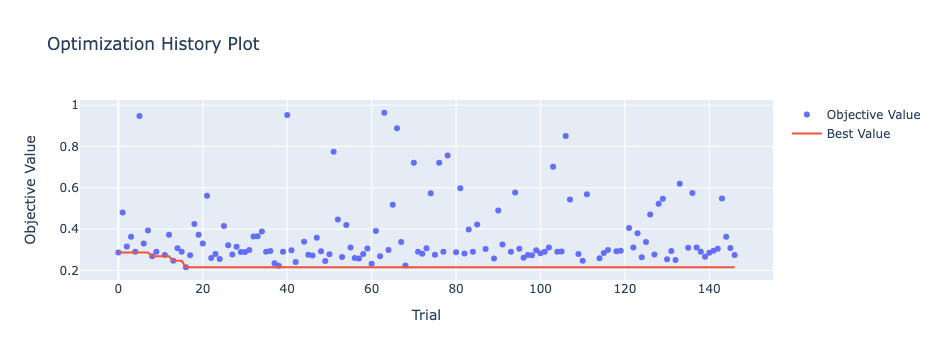

In [161]:
def outlier_trial(trial):
    return trial.value is not None and trial.value > 1
    
all_trials = study.trials
filtered_trials = [trial for trial in all_trials if not outlier_trial(trial)]
filtered_study = optuna.create_study(study_name='filtered_study')
for trial in filtered_trials:
    filtered_study.add_trial(trial)

opt_vis.plot_optimization_history(filtered_study)

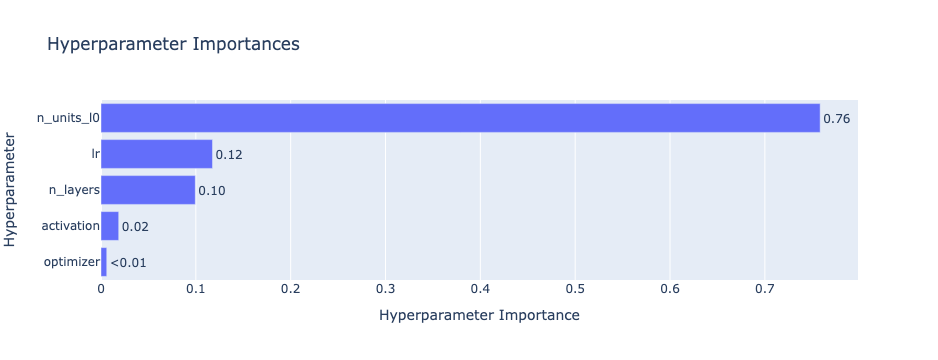

In [167]:
opt_vis.plot_param_importances(study)

#### Further Optimisation

In [312]:
def model_builder(trial):
    n_layers = trial.suggest_int("n_layers", 1, 5)
    layers = []
    
    in_features = 17
    
    for i in range(n_layers):
        out_features = trial.suggest_int(f"n_units_l{i}", 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU())
  
        p = trial.suggest_float(f"dropout_l{i}", 0.1, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)


def objective(trial):    
    X_torch = torch.tensor(X_train_1.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train_1.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val_1.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val_1.values, dtype=torch.float32).reshape(-1, 1)
    
    nn_model = model_builder(trial)
    # print(nn_model)

    optimizer_name = trial.suggest_categorical("optimizer",["Adam","AdamW"])
    lr = trial.suggest_float("lr",1e-5,5e-2, log = True)
    optimizer = getattr(torch.optim,optimizer_name)(nn_model.parameters(), lr = lr)
    criteron = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    # n_epochs = trial.suggest_int("n_epochs", 100, 1000)    
    for epoch in range(1000):
        optimizer.zero_grad()
        output = nn_model(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()

        nn_model.eval()
        with torch.no_grad():        
            y_pred = pd.Series(nn_model(X_val_torch).numpy().flatten(), index = X_val_1.index)
            score = mape_calc(y_val_1, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(nn_model.state_dict())  # Deep copy here      
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

        
        trial.report(score, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()
            
    nn_model.load_state_dict(best_model_weights)
    return score
    
    

In [313]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(objective, n_trials = 50, n_jobs = -1)

study.best_params

[I 2024-04-27 19:22:38,449] A new study created in memory with name: no-name-72108373-42d9-4706-91c8-14397aea76c3
[I 2024-04-27 19:22:40,655] Trial 5 finished with value: 4.711608891161328 and parameters: {'n_layers': 1, 'n_units_l0': 66, 'dropout_l0': 0.12048969491572406, 'optimizer': 'AdamW', 'lr': 0.0019410558574087869}. Best is trial 5 with value: 4.711608891161328.
[I 2024-04-27 19:22:42,261] Trial 7 finished with value: 0.7615261829593718 and parameters: {'n_layers': 3, 'n_units_l0': 103, 'dropout_l0': 0.18774196482525296, 'n_units_l1': 85, 'dropout_l1': 0.11265175818881584, 'n_units_l2': 110, 'dropout_l2': 0.2580739403514517, 'optimizer': 'Adam', 'lr': 0.0015679490236654673}. Best is trial 7 with value: 0.7615261829593718.
[I 2024-04-27 19:22:44,868] Trial 9 finished with value: 4.961552819296488 and parameters: {'n_layers': 2, 'n_units_l0': 31, 'dropout_l0': 0.2960493069914863, 'n_units_l1': 76, 'dropout_l1': 0.3679801860886477, 'optimizer': 'AdamW', 'lr': 0.0012603334174245593

{'n_layers': 3,
 'n_units_l0': 54,
 'dropout_l0': 0.2509600306128804,
 'n_units_l1': 23,
 'dropout_l1': 0.2828844763232583,
 'n_units_l2': 31,
 'dropout_l2': 0.18848461056866372,
 'optimizer': 'Adam',
 'lr': 0.006967722434161013}

In [278]:
study = optuna.create_study(direction = "minimize", sampler = optuna.samplers.RandomSampler(seed = 42))
study.optimize(objective, n_trials = 50, n_jobs = -1)

study.best_params

[I 2024-04-27 18:27:22,933] A new study created in memory with name: no-name-8c5e3624-fbbe-45d8-9811-4b38201abb62
[I 2024-04-27 18:27:25,628] Trial 3 finished with value: 0.27998726541459673 and parameters: {'n_layers': 5, 'n_units_l0': 94, 'dropout_l0': 0.419395880886715, 'n_units_l1': 16, 'dropout_l1': 0.3851879080050681, 'n_units_l2': 55, 'dropout_l2': 0.4932266339704302, 'n_units_l3': 103, 'dropout_l3': 0.13282362831585962, 'n_units_l4': 66, 'dropout_l4': 0.35658585012233657, 'optimizer': 'Adam', 'lr': 0.00438060125044677, 'n_epochs': 42}. Best is trial 3 with value: 0.27998726541459673.
[I 2024-04-27 18:27:28,781] Trial 1 finished with value: 1.5419090512807765 and parameters: {'n_layers': 2, 'n_units_l0': 52, 'dropout_l0': 0.10923955450874506, 'n_units_l1': 99, 'dropout_l1': 0.24153089553099782, 'optimizer': 'AdamW', 'lr': 5.615612116160092e-05, 'n_epochs': 250}. Best is trial 3 with value: 0.27998726541459673.
[I 2024-04-27 18:27:29,182] Trial 5 finished with value: 0.2884712269

{'n_layers': 1,
 'n_units_l0': 9,
 'dropout_l0': 0.464062536347162,
 'optimizer': 'AdamW',
 'lr': 0.044309246848602046,
 'n_epochs': 535}

In [279]:
display(pd.DataFrame(Out[175].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[188].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[210].items(), columns = ["params", "vals"]),
        # increased number of layers to 10, removed "RMSprop" optimiser
        pd.DataFrame(Out[219].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[223].items(), columns = ["params", "vals"]),
        pd.DataFrame(Out[278].items(), columns = ["params", "vals"]),
       )

params      vals
0     n_layers         4
1   n_units_l0       120
2   dropout_l0  0.369332
3   n_units_l1         5
4   dropout_l1  0.455533
5   n_units_l2        77
6   dropout_l2  0.447019
7   n_units_l3       107
8   dropout_l3  0.210902
9    optimizer      Adam
10          lr  0.012189
11    n_epochs       368

params      vals
0     n_layers         5
1   n_units_l0        76
2   dropout_l0  0.324922
3   n_units_l1       118
4   dropout_l1  0.439195
5   n_units_l2        74
6   dropout_l2  0.167699
7   n_units_l3       111
8   dropout_l3  0.395965
9   n_units_l4        60
10  dropout_l4  0.486075
11   optimizer     AdamW
12          lr  0.003019
13    n_epochs       520

params      vals
0     n_layers         5
1   n_units_l0       103
2   dropout_l0  0.415548
3   n_units_l1         6
4   dropout_l1  0.285396
5   n_units_l2        68
6   dropout_l2  0.461832
7   n_units_l3        56
8   dropout_l3  0.157785
9   n_units_l4        80
10  dropout_l4  0.383792
11   optimizer     AdamW
12          lr   0.00283
13    n_epochs       554

params      vals
0     n_layers         4
1   n_units_l0        90
2   dropout_l0  0.266034
3   n_units_l1        75
4   dropout_l1   0.27338
5   n_units_l2        53
6   dropout_l2  0.330681
7   n_units_l3        83
8   dropout_l3  0.476674
9    optimizer      Adam
10          lr  0.007003
11    n_epochs       881

params      vals
0     n_layers         8
1   n_units_l0       117
2   dropout_l0  0.351107
3   n_units_l1        86
4   dropout_l1  0.218607
5   n_units_l2       101
6   dropout_l2  0.218974
7   n_units_l3        83
8   dropout_l3  0.173403
9   n_units_l4        20
10  dropout_l4  0.269529
11  n_units_l5         5
12  dropout_l5  0.245447
13  n_units_l6        70
14  dropout_l6  0.231957
15  n_units_l7        72
16  dropout_l7  0.371379
17   optimizer     AdamW
18          lr  0.003487
19    n_epochs       411

params      vals
0    n_layers         1
1  n_units_l0         9
2  dropout_l0  0.464063
3   optimizer     AdamW
4          lr  0.044309
5    n_epochs       535

[I 2024-04-27 16:55:17,816] A new study created in memory with name: filtered_study


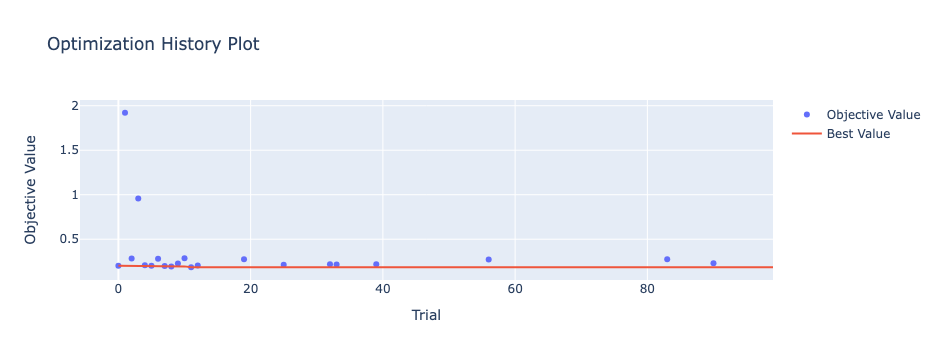

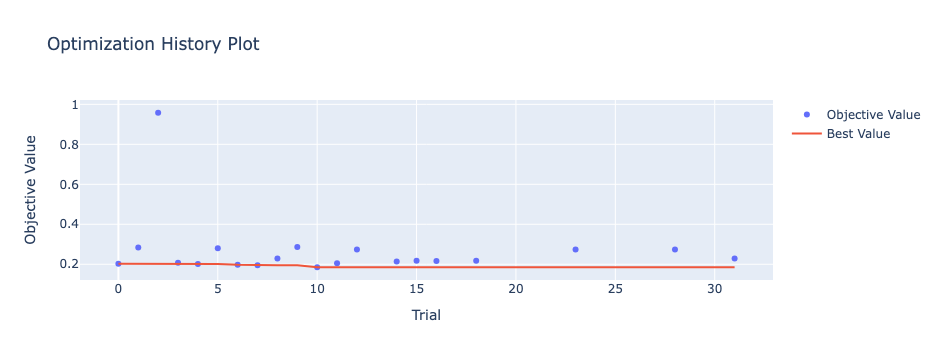

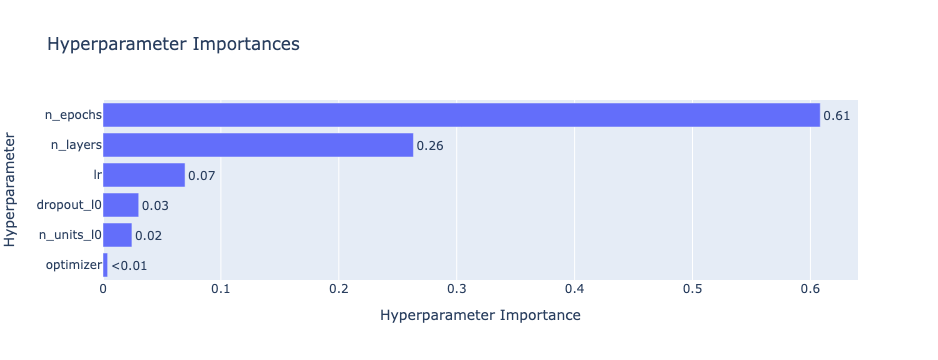

In [236]:
def outlier_trial(trial):
    return trial.value is not None and trial.value > 1

all_trials = study.trials
filtered_trials = [trial for trial in all_trials if not outlier_trial(trial)]
filtered_study = optuna.create_study(study_name='filtered_study')
for trial in filtered_trials:
    filtered_study.add_trial(trial)

display(opt_vis.plot_optimization_history(study),
        opt_vis.plot_optimization_history(filtered_study),
        opt_vis.plot_param_importances(filtered_study),
       )

#### Extending To All Sensor & Predictions

In [323]:
def objective(trial, X_train, y_train, X_val, y_val):    
    X_torch = torch.tensor(X_train.values, dtype = torch.float32)
    y_torch = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
    X_val_torch = torch.tensor(X_val.values, dtype = torch.float32)
    y_val_torch = torch.tensor(y_val.values, dtype=torch.float32).reshape(-1, 1)
    
    nn_model = model_builder(trial)
    # print(nn_model)

    lr = trial.suggest_float("lr",1e-5,5e-2, log = True)
    # optimizer_name = trial.suggest_categorical("optimizer",["Adam","AdamW"])
    # optimizer = getattr(torch.optim,optimizer_name)(nn_model.parameters(), lr = lr)
    optimizer = torch.optim.Adam(nn_model.parameters(), lr = lr)
    criteron = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    # n_epochs = trial.suggest_int("n_epochs", 10, 1000)    
    for epoch in range(1000):
        optimizer.zero_grad()
        output = nn_model(X_torch)
        loss = criterion(output, y_torch)
        loss.backward()
        optimizer.step()

        nn_model.eval()
        with torch.no_grad():        
            y_pred = pd.Series(nn_model(X_val_torch).numpy().flatten(), index = X_val.index)
            score = mape_calc(y_val, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(nn_model.state_dict()) 
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break

        
        trial.report(score, epoch)

        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    nn_model.load_state_dict(best_model_weights)
    return best_score



def final_model(best_params):
    n_layers = best_params["n_layers"]
    layers = []
    
    in_features = 17
    
    for i in range(n_layers):
        out_features = best_params[f"n_units_l{i}"]
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.LeakyReLU())
  
        p = best_params[f"dropout_l{i}"]
        layers.append(nn.Dropout(p))

        in_features = out_features

    layers.append(nn.Linear(in_features, 1))
    
    return nn.Sequential(*layers)


def train_best_nn(X_train, y_train, best_params):
    model = final_model(best_params)

    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)

    optimizer = torch.optim.Adam(model.parameters(), lr=best_params['lr'])
    criterion = CustomLoss()

    #Initialize Variables for EarlyStopping
    best_score = float('inf')
    best_model_weights = None
    patience_val = 50
    patience = patience_val
    
    for epoch in range(1000):
        optimizer.zero_grad()
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()
        
        model.eval()
        with torch.no_grad():   
            return X_val_torch, X_val
            y_pred = pd.Series(model(X_val_torch).numpy().flatten(), index = X_val.index)
            score = mape_calc(y_val, y_pred)

        if score < best_score:
            best_score = score
            best_model_weights = copy.deepcopy(nn_model.state_dict()) 
            patience = patience_val 
        else:
            patience -= 1
            if patience == 0:
                # print(f"### {epoch-patience_val}: {best_score:.5f} ###")
                break


    return model


def predict(model, X_test_ext):
    X_ext_tensor = torch.tensor(X_test_ext.values, dtype=torch.float32)

    with torch.no_grad():
        preds_array = model(X_ext_tensor).numpy().flatten()
        pred = pd.Series(preds_array, X_test_ext.index).clip(lower = 0)

    return pred

In [324]:
result = {}
preds = []

start_time = time.time()
for sensor, (X_train, y_train, X_val, y_val, ext_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params

    best_nn = train_best_nn(X_train, y_train, best_params)
    temp_pred = predict(best_nn, ext_test)
    preds.append(temp_pred)

    result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = ((time.time() - start_time) * (27/sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

[I 2024-04-27 19:32:59,114] A new study created in memory with name: no-name-bd778adc-d74c-4846-b164-712dbd7efa43
[I 2024-04-27 19:33:02,286] Trial 4 finished with value: 1.8951338442629304 and parameters: {'n_layers': 2, 'n_units_l0': 120, 'dropout_l0': 0.3446167478214038, 'n_units_l1': 94, 'dropout_l1': 0.49311912331453633, 'lr': 0.002459033506943257}. Best is trial 4 with value: 1.8951338442629304.
[I 2024-04-27 19:33:05,634] Trial 7 finished with value: 0.3166887550720645 and parameters: {'n_layers': 3, 'n_units_l0': 78, 'dropout_l0': 0.11880725621307389, 'n_units_l1': 106, 'dropout_l1': 0.2396596361172576, 'n_units_l2': 111, 'dropout_l2': 0.4114444457750933, 'lr': 0.00015477930247709433}. Best is trial 7 with value: 0.3166887550720645.
[I 2024-04-27 19:33:06,243] Trial 3 finished with value: 0.3263719323051454 and parameters: {'n_layers': 3, 'n_units_l0': 79, 'dropout_l0': 0.34264800596773815, 'n_units_l1': 49, 'dropout_l1': 0.3708415695392835, 'n_units_l2': 33, 'dropout_l2': 0.15

ValueError: Length of values (75) does not match length of index (76)

In [270]:
result = {}
preds = []

for sensor, (X_train, y_train, X_val, y_val, ext_test) in data_dict.items():
    temp_time = time.time()
    study = optuna.create_study(direction="minimize", sampler=optuna.samplers.RandomSampler(seed=42))
    study.optimize(lambda trial: objective(trial, X_train, y_train, X_val, y_val), n_trials=50, n_jobs=-1)
    
    best_score = study.best_value
    best_params = study.best_params

    best_nn = train_best_nn(X_train, y_train, best_params)
    temp_pred = predict(best_nn, ext_test)
    preds.append(temp_pred)

    result[sensor] = round(best_score,5)    

    total_time = time.time() - temp_time
    rem_time = (total_time * (27 - sensor))/60
    print(f"{sensor}: {best_score:.5f} \t {total_time:.2f}s \t Rem: {rem_time:.2f}m")

preds_concat = pd.concat(preds).sort_index()

# display(pd.DataFrame(result))

[I 2024-04-27 18:03:02,662] A new study created in memory with name: no-name-bcd5d06a-ca3d-47ee-812b-faacc30b7612
[I 2024-04-27 18:03:04,137] Trial 1 finished with value: 0.2902818119995863 and parameters: {'n_layers': 6, 'n_units_l0': 112, 'dropout_l0': 0.14332782928865476, 'n_units_l1': 5, 'dropout_l1': 0.2922850142313337, 'n_units_l2': 11, 'dropout_l2': 0.2346104194175488, 'n_units_l3': 75, 'dropout_l3': 0.31229102933282804, 'n_units_l4': 60, 'dropout_l4': 0.1393525566819748, 'n_units_l5': 57, 'dropout_l5': 0.32824866933504393, 'lr': 0.007146325456544938, 'optimizer': 'Adam', 'n_epochs': 37}. Best is trial 1 with value: 0.2902818119995863.
[I 2024-04-27 18:03:04,145] Trial 6 finished with value: 0.2874019446104092 and parameters: {'n_layers': 7, 'n_units_l0': 49, 'dropout_l0': 0.4317568441904045, 'n_units_l1': 55, 'dropout_l1': 0.41095522434442133, 'n_units_l2': 38, 'dropout_l2': 0.35998962126157186, 'n_units_l3': 60, 'dropout_l3': 0.11525740588246514, 'n_units_l4': 86, 'dropout_l4'

1.0: 0.16824 	 47.87s 	 Rem: 20.75m


[I 2024-04-27 18:03:51,090] Trial 3 finished with value: 12.623230923265993 and parameters: {'n_layers': 1, 'n_units_l0': 78, 'dropout_l0': 0.12033723767455805, 'lr': 3.871245051660033e-05, 'optimizer': 'AdamW', 'n_epochs': 46}. Best is trial 3 with value: 12.623230923265993.
[I 2024-04-27 18:03:57,756] Trial 6 finished with value: 3.6492792854416267 and parameters: {'n_layers': 1, 'n_units_l0': 77, 'dropout_l0': 0.4225677272027272, 'lr': 0.0028693802156043325, 'optimizer': 'Adam', 'n_epochs': 645}. Best is trial 6 with value: 3.6492792854416267.
[I 2024-04-27 18:03:58,893] Trial 8 finished with value: 0.27217171343658947 and parameters: {'n_layers': 5, 'n_units_l0': 27, 'dropout_l0': 0.4844421362299175, 'n_units_l1': 99, 'dropout_l1': 0.3004773010506522, 'n_units_l2': 16, 'dropout_l2': 0.37647884037625834, 'n_units_l3': 86, 'dropout_l3': 0.45333582709683906, 'n_units_l4': 87, 'dropout_l4': 0.2969037860987325, 'lr': 0.014633731074309694, 'optimizer': 'AdamW', 'n_epochs': 197}. Best is 

2.0: 0.20838 	 80.70s 	 Rem: 33.63m


[I 2024-04-27 18:05:14,856] Trial 6 finished with value: 3.011657394655986 and parameters: {'n_layers': 2, 'n_units_l0': 102, 'dropout_l0': 0.4095495291172707, 'n_units_l1': 62, 'dropout_l1': 0.14704841901989343, 'lr': 0.0007075669407157205, 'optimizer': 'Adam', 'n_epochs': 218}. Best is trial 6 with value: 3.011657394655986.
[I 2024-04-27 18:05:15,636] Trial 3 finished with value: 0.7076247150832163 and parameters: {'n_layers': 8, 'n_units_l0': 102, 'dropout_l0': 0.35926278390470445, 'n_units_l1': 27, 'dropout_l1': 0.18792541339967453, 'n_units_l2': 113, 'dropout_l2': 0.18600022475811595, 'n_units_l3': 75, 'dropout_l3': 0.39947981375280706, 'n_units_l4': 15, 'dropout_l4': 0.2868668954217438, 'n_units_l5': 107, 'dropout_l5': 0.3629556811786384, 'n_units_l6': 36, 'dropout_l6': 0.13412398495962533, 'n_units_l7': 105, 'dropout_l7': 0.49491575585296854, 'lr': 1.040707319539081e-05, 'optimizer': 'AdamW', 'n_epochs': 84}. Best is trial 3 with value: 0.7076247150832163.
[I 2024-04-27 18:05:16

3.0: 0.24448 	 40.29s 	 Rem: 16.12m


[I 2024-04-27 18:05:52,680] Trial 7 finished with value: 0.48756391840005664 and parameters: {'n_layers': 6, 'n_units_l0': 82, 'dropout_l0': 0.3337986459543678, 'n_units_l1': 41, 'dropout_l1': 0.4324475347168272, 'n_units_l2': 54, 'dropout_l2': 0.14969003484876883, 'n_units_l3': 14, 'dropout_l3': 0.30085136538257684, 'n_units_l4': 68, 'dropout_l4': 0.40281168145459745, 'n_units_l5': 124, 'dropout_l5': 0.3991280788420639, 'lr': 0.012064824634960085, 'optimizer': 'AdamW', 'n_epochs': 30}. Best is trial 7 with value: 0.48756391840005664.
[I 2024-04-27 18:05:53,005] Trial 5 finished with value: 10.968381262263472 and parameters: {'n_layers': 1, 'n_units_l0': 109, 'dropout_l0': 0.4355818343704194, 'lr': 0.04828643083679716, 'optimizer': 'Adam', 'n_epochs': 147}. Best is trial 7 with value: 0.48756391840005664.
[I 2024-04-27 18:06:01,117] Trial 0 finished with value: 0.49616360871906506 and parameters: {'n_layers': 2, 'n_units_l0': 40, 'dropout_l0': 0.31253872274496525, 'n_units_l1': 124, 'd

4.0: 0.26352 	 39.12s 	 Rem: 14.99m


[I 2024-04-27 18:06:32,847] Trial 5 finished with value: 0.4376168827356572 and parameters: {'n_layers': 10, 'n_units_l0': 73, 'dropout_l0': 0.2570376583277816, 'n_units_l1': 119, 'dropout_l1': 0.16568504373503293, 'n_units_l2': 9, 'dropout_l2': 0.44352482073039357, 'n_units_l3': 101, 'dropout_l3': 0.16398439660893266, 'n_units_l4': 30, 'dropout_l4': 0.4901077966204004, 'n_units_l5': 76, 'dropout_l5': 0.46151284200599607, 'n_units_l6': 122, 'dropout_l6': 0.34725311664539193, 'n_units_l7': 35, 'dropout_l7': 0.36951658317582126, 'n_units_l8': 126, 'dropout_l8': 0.18777191891055614, 'n_units_l9': 24, 'dropout_l9': 0.3407842143389461, 'lr': 0.0004152249804693633, 'optimizer': 'AdamW', 'n_epochs': 36}. Best is trial 5 with value: 0.4376168827356572.
[I 2024-04-27 18:06:34,631] Trial 8 finished with value: 14.4223111212212 and parameters: {'n_layers': 2, 'n_units_l0': 99, 'dropout_l0': 0.3598359682194284, 'n_units_l1': 127, 'dropout_l1': 0.3913221456523015, 'lr': 0.0011384669688707261, 'opti

5.0: 0.27630 	 33.59s 	 Rem: 12.32m


[I 2024-04-27 18:07:05,245] Trial 5 finished with value: 4.382353527060459 and parameters: {'n_layers': 1, 'n_units_l0': 73, 'dropout_l0': 0.43838254210582195, 'lr': 0.04281825652882998, 'optimizer': 'AdamW', 'n_epochs': 95}. Best is trial 5 with value: 4.382353527060459.
[I 2024-04-27 18:07:05,862] Trial 1 finished with value: 6.187986653405617 and parameters: {'n_layers': 2, 'n_units_l0': 77, 'dropout_l0': 0.39073789378722834, 'n_units_l1': 125, 'dropout_l1': 0.3417539581457604, 'lr': 3.614655626114733e-05, 'optimizer': 'AdamW', 'n_epochs': 86}. Best is trial 5 with value: 4.382353527060459.
[I 2024-04-27 18:07:10,969] Trial 6 finished with value: 0.43612633039465654 and parameters: {'n_layers': 5, 'n_units_l0': 45, 'dropout_l0': 0.2417045746758559, 'n_units_l1': 102, 'dropout_l1': 0.43217892541790404, 'n_units_l2': 97, 'dropout_l2': 0.4080730845940198, 'n_units_l3': 46, 'dropout_l3': 0.13764082208897432, 'n_units_l4': 8, 'dropout_l4': 0.48499860306349285, 'lr': 0.02704451005191592, 

6.0: 0.24613 	 45.34s 	 Rem: 15.87m


[I 2024-04-27 18:07:50,930] Trial 2 finished with value: 133.85196324677352 and parameters: {'n_layers': 2, 'n_units_l0': 52, 'dropout_l0': 0.2865251339347126, 'n_units_l1': 74, 'dropout_l1': 0.23808648630186277, 'lr': 1.4004775167159994e-05, 'optimizer': 'AdamW', 'n_epochs': 81}. Best is trial 2 with value: 133.85196324677352.
[I 2024-04-27 18:07:54,207] Trial 4 finished with value: 0.39223358108509637 and parameters: {'n_layers': 8, 'n_units_l0': 93, 'dropout_l0': 0.21349935786442487, 'n_units_l1': 100, 'dropout_l1': 0.24048148718895546, 'n_units_l2': 7, 'dropout_l2': 0.13634525328775832, 'n_units_l3': 70, 'dropout_l3': 0.40570324708230354, 'n_units_l4': 48, 'dropout_l4': 0.1140195150543784, 'n_units_l5': 48, 'dropout_l5': 0.37445545192653207, 'n_units_l6': 87, 'dropout_l6': 0.1401065140758132, 'n_units_l7': 95, 'dropout_l7': 0.2042805550164154, 'lr': 0.029863570078311245, 'optimizer': 'AdamW', 'n_epochs': 100}. Best is trial 4 with value: 0.39223358108509637.
[I 2024-04-27 18:07:58,

7.0: 0.18859 	 49.61s 	 Rem: 16.54m


[I 2024-04-27 18:08:41,719] Trial 4 finished with value: 0.28732950931901885 and parameters: {'n_layers': 3, 'n_units_l0': 21, 'dropout_l0': 0.1583698191714904, 'n_units_l1': 112, 'dropout_l1': 0.4529486833963289, 'n_units_l2': 101, 'dropout_l2': 0.42003514701618916, 'lr': 0.013163569771927832, 'optimizer': 'Adam', 'n_epochs': 128}. Best is trial 4 with value: 0.28732950931901885.
[I 2024-04-27 18:08:41,730] Trial 0 finished with value: 1.6220687082370484 and parameters: {'n_layers': 2, 'n_units_l0': 72, 'dropout_l0': 0.2278421270085973, 'n_units_l1': 48, 'dropout_l1': 0.15755818873953864, 'lr': 0.0006538482027150589, 'optimizer': 'AdamW', 'n_epochs': 162}. Best is trial 4 with value: 0.28732950931901885.
[I 2024-04-27 18:08:47,260] Trial 9 finished with value: 0.3907350538128415 and parameters: {'n_layers': 6, 'n_units_l0': 15, 'dropout_l0': 0.10213707892927255, 'n_units_l1': 71, 'dropout_l1': 0.21765120963770235, 'n_units_l2': 119, 'dropout_l2': 0.4893330819498726, 'n_units_l3': 41, 

8.0: 0.21678 	 49.37s 	 Rem: 15.63m


[I 2024-04-27 18:09:30,582] Trial 5 finished with value: 249.19925631663213 and parameters: {'n_layers': 1, 'n_units_l0': 16, 'dropout_l0': 0.2816108909527518, 'lr': 1.4603982241066283e-05, 'optimizer': 'AdamW', 'n_epochs': 197}. Best is trial 5 with value: 249.19925631663213.
[I 2024-04-27 18:09:35,363] Trial 6 finished with value: 0.37323261725267287 and parameters: {'n_layers': 6, 'n_units_l0': 27, 'dropout_l0': 0.19763248364082753, 'n_units_l1': 35, 'dropout_l1': 0.28380986222515303, 'n_units_l2': 14, 'dropout_l2': 0.3045237726571216, 'n_units_l3': 121, 'dropout_l3': 0.3392964531746575, 'n_units_l4': 7, 'dropout_l4': 0.44344834348657425, 'n_units_l5': 33, 'dropout_l5': 0.16598868011131157, 'lr': 0.000559927177278724, 'optimizer': 'Adam', 'n_epochs': 201}. Best is trial 6 with value: 0.37323261725267287.
[I 2024-04-27 18:09:35,505] Trial 2 finished with value: 0.8692883433111348 and parameters: {'n_layers': 2, 'n_units_l0': 87, 'dropout_l0': 0.43068706501508236, 'n_units_l1': 61, 'd

9.0: 0.18346 	 39.19s 	 Rem: 11.76m


[I 2024-04-27 18:10:10,957] Trial 1 finished with value: 0.3836729938553327 and parameters: {'n_layers': 2, 'n_units_l0': 40, 'dropout_l0': 0.33471153056601277, 'n_units_l1': 24, 'dropout_l1': 0.3762019299569016, 'lr': 0.0014784159739443647, 'optimizer': 'Adam', 'n_epochs': 224}. Best is trial 1 with value: 0.3836729938553327.
[I 2024-04-27 18:10:11,074] Trial 0 finished with value: 0.42943830915264364 and parameters: {'n_layers': 1, 'n_units_l0': 91, 'dropout_l0': 0.38219687908749944, 'lr': 0.000268395562319163, 'optimizer': 'AdamW', 'n_epochs': 310}. Best is trial 1 with value: 0.3836729938553327.
[I 2024-04-27 18:10:15,774] Trial 8 finished with value: 0.31776971002380777 and parameters: {'n_layers': 3, 'n_units_l0': 39, 'dropout_l0': 0.148535720419101, 'n_units_l1': 11, 'dropout_l1': 0.40093290758528544, 'n_units_l2': 90, 'dropout_l2': 0.21155426519481635, 'lr': 0.010339788306771073, 'optimizer': 'Adam', 'n_epochs': 262}. Best is trial 8 with value: 0.31776971002380777.
[I 2024-04-

10.0: 0.26459 	 49.07s 	 Rem: 13.90m


[I 2024-04-27 18:11:02,424] Trial 1 finished with value: 0.496474186897507 and parameters: {'n_layers': 3, 'n_units_l0': 104, 'dropout_l0': 0.11625539208720444, 'n_units_l1': 115, 'dropout_l1': 0.4577371801133091, 'n_units_l2': 28, 'dropout_l2': 0.34685298255076247, 'lr': 1.085947061503439e-05, 'optimizer': 'AdamW', 'n_epochs': 228}. Best is trial 1 with value: 0.496474186897507.
[I 2024-04-27 18:11:03,811] Trial 6 finished with value: 0.34714335237673916 and parameters: {'n_layers': 2, 'n_units_l0': 30, 'dropout_l0': 0.2426888087928898, 'n_units_l1': 107, 'dropout_l1': 0.4113271152423913, 'lr': 0.01674157080599125, 'optimizer': 'AdamW', 'n_epochs': 418}. Best is trial 6 with value: 0.34714335237673916.
[I 2024-04-27 18:11:05,763] Trial 7 finished with value: 0.455214421125548 and parameters: {'n_layers': 2, 'n_units_l0': 38, 'dropout_l0': 0.4365718137781709, 'n_units_l1': 7, 'dropout_l1': 0.2564104560879804, 'lr': 0.0009995589741954628, 'optimizer': 'Adam', 'n_epochs': 631}. Best is t

11.0: 0.32820 	 22.78s 	 Rem: 6.07m


[I 2024-04-27 18:11:21,965] Trial 6 finished with value: 119.20371699993974 and parameters: {'n_layers': 1, 'n_units_l0': 21, 'dropout_l0': 0.342541754234601, 'lr': 1.5879814822583007e-05, 'optimizer': 'AdamW', 'n_epochs': 220}. Best is trial 6 with value: 119.20371699993974.
[I 2024-04-27 18:11:23,907] Trial 4 finished with value: 0.894307657705725 and parameters: {'n_layers': 10, 'n_units_l0': 122, 'dropout_l0': 0.3727266775592498, 'n_units_l1': 78, 'dropout_l1': 0.4126489564228242, 'n_units_l2': 38, 'dropout_l2': 0.4315001870943288, 'n_units_l3': 14, 'dropout_l3': 0.14306946332470738, 'n_units_l4': 111, 'dropout_l4': 0.2490872674335714, 'n_units_l5': 24, 'dropout_l5': 0.19772665863823846, 'n_units_l6': 33, 'dropout_l6': 0.3277230639742794, 'n_units_l7': 84, 'dropout_l7': 0.4031030117120581, 'n_units_l8': 43, 'dropout_l8': 0.3710924185884482, 'n_units_l9': 102, 'dropout_l9': 0.3536050299718836, 'lr': 1.045881284916531e-05, 'optimizer': 'AdamW', 'n_epochs': 62}. Best is trial 4 with v

12.0: 0.26233 	 60.29s 	 Rem: 15.07m


[I 2024-04-27 18:12:21,908] Trial 6 finished with value: 0.4785185019916957 and parameters: {'n_layers': 5, 'n_units_l0': 86, 'dropout_l0': 0.20974468317323774, 'n_units_l1': 128, 'dropout_l1': 0.2789945116715432, 'n_units_l2': 101, 'dropout_l2': 0.40478190227282895, 'n_units_l3': 100, 'dropout_l3': 0.4797193554554322, 'n_units_l4': 84, 'dropout_l4': 0.4619313825007113, 'lr': 2.3028692254470314e-05, 'optimizer': 'AdamW', 'n_epochs': 61}. Best is trial 6 with value: 0.4785185019916957.
[I 2024-04-27 18:12:25,662] Trial 2 finished with value: 0.36001804538834675 and parameters: {'n_layers': 5, 'n_units_l0': 22, 'dropout_l0': 0.2380211346505579, 'n_units_l1': 109, 'dropout_l1': 0.2107900992625243, 'n_units_l2': 39, 'dropout_l2': 0.33052691698290604, 'n_units_l3': 97, 'dropout_l3': 0.2865485232489918, 'n_units_l4': 20, 'dropout_l4': 0.30901021999707323, 'lr': 0.0003044359549212425, 'optimizer': 'AdamW', 'n_epochs': 193}. Best is trial 2 with value: 0.36001804538834675.
[I 2024-04-27 18:12:

13.0: 0.24388 	 22.48s 	 Rem: 5.24m


[I 2024-04-27 18:12:50,254] Trial 0 finished with value: 0.35694041844647123 and parameters: {'n_layers': 1, 'n_units_l0': 26, 'dropout_l0': 0.4740260811608068, 'lr': 0.00027746529892829066, 'optimizer': 'Adam', 'n_epochs': 822}. Best is trial 0 with value: 0.35694041844647123.
[I 2024-04-27 18:12:53,202] Trial 4 finished with value: 0.361750084004115 and parameters: {'n_layers': 5, 'n_units_l0': 53, 'dropout_l0': 0.48562566988076117, 'n_units_l1': 8, 'dropout_l1': 0.18681705525439202, 'n_units_l2': 16, 'dropout_l2': 0.3609942994463792, 'n_units_l3': 13, 'dropout_l3': 0.15971544204981214, 'n_units_l4': 96, 'dropout_l4': 0.49849155320482874, 'lr': 0.00015507604231934668, 'optimizer': 'AdamW', 'n_epochs': 395}. Best is trial 0 with value: 0.35694041844647123.
[I 2024-04-27 18:12:54,061] Trial 2 finished with value: 0.46128447967068115 and parameters: {'n_layers': 8, 'n_units_l0': 75, 'dropout_l0': 0.45738448230513074, 'n_units_l1': 11, 'dropout_l1': 0.2988008775960399, 'n_units_l2': 96, 

14.0: 0.26687 	 27.29s 	 Rem: 5.91m


[I 2024-04-27 18:13:12,831] Trial 7 finished with value: 0.32249694560868314 and parameters: {'n_layers': 1, 'n_units_l0': 50, 'dropout_l0': 0.11001535511642212, 'lr': 0.014187267714198364, 'optimizer': 'AdamW', 'n_epochs': 302}. Best is trial 7 with value: 0.32249694560868314.
[I 2024-04-27 18:13:16,820] Trial 4 finished with value: 0.45316643000539764 and parameters: {'n_layers': 2, 'n_units_l0': 85, 'dropout_l0': 0.2759596088780572, 'n_units_l1': 87, 'dropout_l1': 0.4298153455892352, 'lr': 0.000324197535944993, 'optimizer': 'Adam', 'n_epochs': 459}. Best is trial 7 with value: 0.32249694560868314.
[I 2024-04-27 18:13:19,354] Trial 8 finished with value: 0.3812341178354938 and parameters: {'n_layers': 1, 'n_units_l0': 66, 'dropout_l0': 0.47194040648765667, 'lr': 0.04803111381548749, 'optimizer': 'Adam', 'n_epochs': 644}. Best is trial 7 with value: 0.32249694560868314.
[I 2024-04-27 18:13:21,434] Trial 9 finished with value: 0.2635898978959914 and parameters: {'n_layers': 6, 'n_units

15.0: 0.25605 	 36.51s 	 Rem: 7.30m


[I 2024-04-27 18:13:46,421] Trial 6 finished with value: 18.564897925174296 and parameters: {'n_layers': 1, 'n_units_l0': 73, 'dropout_l0': 0.33236058003044266, 'lr': 0.000879283475468883, 'optimizer': 'Adam', 'n_epochs': 16}. Best is trial 6 with value: 18.564897925174296.
[I 2024-04-27 18:13:46,810] Trial 4 finished with value: 0.9613825635899987 and parameters: {'n_layers': 8, 'n_units_l0': 101, 'dropout_l0': 0.3473543746825267, 'n_units_l1': 83, 'dropout_l1': 0.3702169396399778, 'n_units_l2': 12, 'dropout_l2': 0.3028678318063571, 'n_units_l3': 9, 'dropout_l3': 0.30634759977526793, 'n_units_l4': 26, 'dropout_l4': 0.48805182038687145, 'n_units_l5': 53, 'dropout_l5': 0.36386703421620603, 'n_units_l6': 75, 'dropout_l6': 0.22212036928016998, 'n_units_l7': 84, 'dropout_l7': 0.4158008181867807, 'lr': 6.228176394448694e-05, 'optimizer': 'Adam', 'n_epochs': 12}. Best is trial 4 with value: 0.9613825635899987.
[I 2024-04-27 18:13:48,699] Trial 2 finished with value: 0.2718886722733271 and pa

16.0: 0.23064 	 31.46s 	 Rem: 5.77m


[I 2024-04-27 18:14:18,285] Trial 6 finished with value: 0.40424847548899673 and parameters: {'n_layers': 3, 'n_units_l0': 10, 'dropout_l0': 0.46525361069512794, 'n_units_l1': 105, 'dropout_l1': 0.19532046326889474, 'n_units_l2': 83, 'dropout_l2': 0.38742700585705736, 'lr': 0.0017217301811687017, 'optimizer': 'Adam', 'n_epochs': 31}. Best is trial 6 with value: 0.40424847548899673.
[I 2024-04-27 18:14:18,921] Trial 2 finished with value: 0.6100700511874515 and parameters: {'n_layers': 3, 'n_units_l0': 81, 'dropout_l0': 0.1097435414577792, 'n_units_l1': 26, 'dropout_l1': 0.12376910027630306, 'n_units_l2': 19, 'dropout_l2': 0.3578485299363645, 'lr': 0.002653993949875318, 'optimizer': 'Adam', 'n_epochs': 57}. Best is trial 6 with value: 0.40424847548899673.
[I 2024-04-27 18:14:24,685] Trial 0 finished with value: 0.23004136086314295 and parameters: {'n_layers': 2, 'n_units_l0': 77, 'dropout_l0': 0.43143692317566495, 'n_units_l1': 16, 'dropout_l1': 0.4508209001140905, 'lr': 0.0104119515084

17.0: 0.23004 	 23.53s 	 Rem: 3.92m


[I 2024-04-27 18:14:49,698] Trial 3 finished with value: 0.4046495601127319 and parameters: {'n_layers': 8, 'n_units_l0': 115, 'dropout_l0': 0.2446009205241324, 'n_units_l1': 81, 'dropout_l1': 0.19938406746311832, 'n_units_l2': 14, 'dropout_l2': 0.4834001530103659, 'n_units_l3': 84, 'dropout_l3': 0.296353339115121, 'n_units_l4': 26, 'dropout_l4': 0.23692284301299626, 'n_units_l5': 69, 'dropout_l5': 0.25029697508420146, 'n_units_l6': 45, 'dropout_l6': 0.176826821446848, 'n_units_l7': 124, 'dropout_l7': 0.27753391380023384, 'lr': 0.005401390127434268, 'optimizer': 'AdamW', 'n_epochs': 133}. Best is trial 3 with value: 0.4046495601127319.
[I 2024-04-27 18:14:58,340] Trial 0 finished with value: 0.31514276657275 and parameters: {'n_layers': 9, 'n_units_l0': 123, 'dropout_l0': 0.1660601859460206, 'n_units_l1': 37, 'dropout_l1': 0.18906507182318993, 'n_units_l2': 89, 'dropout_l2': 0.1352690524828685, 'n_units_l3': 42, 'dropout_l3': 0.47065547853530687, 'n_units_l4': 11, 'dropout_l4': 0.24608

18.0: 0.22423 	 68.48s 	 Rem: 10.27m


[I 2024-04-27 18:15:50,275] Trial 4 finished with value: 0.7005863932558747 and parameters: {'n_layers': 1, 'n_units_l0': 82, 'dropout_l0': 0.20137739756995612, 'lr': 0.016557288102703044, 'optimizer': 'Adam', 'n_epochs': 50}. Best is trial 4 with value: 0.7005863932558747.
[I 2024-04-27 18:16:00,781] Trial 3 finished with value: 1.325065890092192 and parameters: {'n_layers': 1, 'n_units_l0': 70, 'dropout_l0': 0.38259243354367756, 'lr': 7.800849407084563e-05, 'optimizer': 'Adam', 'n_epochs': 643}. Best is trial 4 with value: 0.7005863932558747.
[I 2024-04-27 18:16:06,322] Trial 5 finished with value: 0.3789384862584466 and parameters: {'n_layers': 8, 'n_units_l0': 103, 'dropout_l0': 0.40196280959882424, 'n_units_l1': 39, 'dropout_l1': 0.15371366268292383, 'n_units_l2': 17, 'dropout_l2': 0.30422172327889363, 'n_units_l3': 94, 'dropout_l3': 0.15362475806097767, 'n_units_l4': 8, 'dropout_l4': 0.11112688255560732, 'n_units_l5': 39, 'dropout_l5': 0.37902920385388683, 'n_units_l6': 106, 'dro

19.0: 0.25645 	 75.41s 	 Rem: 10.06m


[I 2024-04-27 18:17:08,197] Trial 7 finished with value: 2.510929676023156 and parameters: {'n_layers': 1, 'n_units_l0': 98, 'dropout_l0': 0.4006514270841096, 'lr': 5.308638985341036e-05, 'optimizer': 'Adam', 'n_epochs': 284}. Best is trial 7 with value: 2.510929676023156.
[I 2024-04-27 18:17:08,508] Trial 5 finished with value: 0.996534298309367 and parameters: {'n_layers': 9, 'n_units_l0': 53, 'dropout_l0': 0.1583496831948064, 'n_units_l1': 121, 'dropout_l1': 0.353734116612316, 'n_units_l2': 12, 'dropout_l2': 0.2537969033253987, 'n_units_l3': 37, 'dropout_l3': 0.45357578714721514, 'n_units_l4': 74, 'dropout_l4': 0.19950941398059882, 'n_units_l5': 111, 'dropout_l5': 0.37831854030135337, 'n_units_l6': 83, 'dropout_l6': 0.2703417869529923, 'n_units_l7': 21, 'dropout_l7': 0.2829932857826294, 'n_units_l8': 94, 'dropout_l8': 0.3777938132648394, 'lr': 1.7098324624366428e-05, 'optimizer': 'AdamW', 'n_epochs': 58}. Best is trial 5 with value: 0.996534298309367.
[I 2024-04-27 18:17:09,355] Tri

20.0: 0.30379 	 35.59s 	 Rem: 4.15m


[I 2024-04-27 18:17:43,817] Trial 2 finished with value: 0.531759263210591 and parameters: {'n_layers': 2, 'n_units_l0': 110, 'dropout_l0': 0.23964664857000512, 'n_units_l1': 20, 'dropout_l1': 0.32572432177638266, 'lr': 0.0003612110222086157, 'optimizer': 'Adam', 'n_epochs': 212}. Best is trial 2 with value: 0.531759263210591.
[I 2024-04-27 18:17:47,636] Trial 6 finished with value: 0.39769391844813734 and parameters: {'n_layers': 8, 'n_units_l0': 69, 'dropout_l0': 0.4311697912315192, 'n_units_l1': 32, 'dropout_l1': 0.10664973335260451, 'n_units_l2': 79, 'dropout_l2': 0.13007302170037469, 'n_units_l3': 63, 'dropout_l3': 0.25644863406584967, 'n_units_l4': 20, 'dropout_l4': 0.42960821618754197, 'n_units_l5': 94, 'dropout_l5': 0.4494044430348251, 'n_units_l6': 113, 'dropout_l6': 0.3254802846766519, 'n_units_l7': 91, 'dropout_l7': 0.12614467898680448, 'lr': 0.026999585115317946, 'optimizer': 'Adam', 'n_epochs': 157}. Best is trial 6 with value: 0.39769391844813734.
[I 2024-04-27 18:17:48,6

21.0: 0.27792 	 33.43s 	 Rem: 3.34m


[I 2024-04-27 18:18:15,120] Trial 4 finished with value: 3.519089539473225 and parameters: {'n_layers': 3, 'n_units_l0': 61, 'dropout_l0': 0.2210312736046475, 'n_units_l1': 100, 'dropout_l1': 0.3819573492891356, 'n_units_l2': 20, 'dropout_l2': 0.22626587990003424, 'lr': 0.0001820537325371697, 'optimizer': 'AdamW', 'n_epochs': 51}. Best is trial 4 with value: 3.519089539473225.
[I 2024-04-27 18:18:19,361] Trial 6 finished with value: 0.500039047851201 and parameters: {'n_layers': 4, 'n_units_l0': 16, 'dropout_l0': 0.4927524669688843, 'n_units_l1': 52, 'dropout_l1': 0.4014273417998764, 'n_units_l2': 29, 'dropout_l2': 0.38696885831271777, 'n_units_l3': 12, 'dropout_l3': 0.4316164723769339, 'lr': 4.841058747309289e-05, 'optimizer': 'AdamW', 'n_epochs': 234}. Best is trial 6 with value: 0.500039047851201.
[I 2024-04-27 18:18:25,515] Trial 9 finished with value: 12.786241237450417 and parameters: {'n_layers': 1, 'n_units_l0': 21, 'dropout_l0': 0.3884069324861069, 'lr': 5.3897545831870705e-05

22.0: 0.24909 	 39.06s 	 Rem: 3.26m


[I 2024-04-27 18:18:53,480] Trial 7 finished with value: 1.2430970095730343 and parameters: {'n_layers': 4, 'n_units_l0': 63, 'dropout_l0': 0.3398832762155646, 'n_units_l1': 111, 'dropout_l1': 0.3980594484592914, 'n_units_l2': 76, 'dropout_l2': 0.18983195393675195, 'n_units_l3': 61, 'dropout_l3': 0.37755277885440774, 'lr': 0.0007916176722285731, 'optimizer': 'Adam', 'n_epochs': 12}. Best is trial 7 with value: 1.2430970095730343.
[I 2024-04-27 18:18:56,881] Trial 4 finished with value: 3.16226496629475 and parameters: {'n_layers': 2, 'n_units_l0': 89, 'dropout_l0': 0.2997011370372511, 'n_units_l1': 23, 'dropout_l1': 0.38740314996982605, 'lr': 1.2703829498361445e-05, 'optimizer': 'AdamW', 'n_epochs': 270}. Best is trial 7 with value: 1.2430970095730343.
[I 2024-04-27 18:19:02,266] Trial 1 finished with value: 0.2523379867177451 and parameters: {'n_layers': 5, 'n_units_l0': 117, 'dropout_l0': 0.35903481500494294, 'n_units_l1': 38, 'dropout_l1': 0.4393135506453235, 'n_units_l2': 93, 'drop

23.0: 0.19301 	 42.47s 	 Rem: 2.83m


[I 2024-04-27 18:19:38,798] Trial 2 finished with value: 17.575009220320446 and parameters: {'n_layers': 1, 'n_units_l0': 111, 'dropout_l0': 0.37654348667301374, 'lr': 1.3346031208479347e-05, 'optimizer': 'Adam', 'n_epochs': 298}. Best is trial 2 with value: 17.575009220320446.
[I 2024-04-27 18:19:39,843] Trial 3 finished with value: 0.370586382341987 and parameters: {'n_layers': 10, 'n_units_l0': 90, 'dropout_l0': 0.33207303231267293, 'n_units_l1': 45, 'dropout_l1': 0.24720703051709858, 'n_units_l2': 5, 'dropout_l2': 0.20438537456043726, 'n_units_l3': 26, 'dropout_l3': 0.4881853148170223, 'n_units_l4': 70, 'dropout_l4': 0.1375478470688779, 'n_units_l5': 99, 'dropout_l5': 0.3525604510535546, 'n_units_l6': 16, 'dropout_l6': 0.46922235579243987, 'n_units_l7': 29, 'dropout_l7': 0.4477449452904817, 'n_units_l8': 120, 'dropout_l8': 0.3907372243320222, 'n_units_l9': 34, 'dropout_l9': 0.17334089623700394, 'lr': 0.00011810869416811936, 'optimizer': 'AdamW', 'n_epochs': 72}. Best is trial 3 wit

24.0: 0.17444 	 43.86s 	 Rem: 2.19m


[I 2024-04-27 18:20:21,603] Trial 6 finished with value: 0.3882296935566537 and parameters: {'n_layers': 7, 'n_units_l0': 13, 'dropout_l0': 0.4922089966720129, 'n_units_l1': 6, 'dropout_l1': 0.12132783405052594, 'n_units_l2': 63, 'dropout_l2': 0.42592259026943846, 'n_units_l3': 80, 'dropout_l3': 0.2440311990164494, 'n_units_l4': 21, 'dropout_l4': 0.3562547618073376, 'n_units_l5': 34, 'dropout_l5': 0.3098299534292134, 'n_units_l6': 94, 'dropout_l6': 0.26564889772809447, 'lr': 0.0001711514762680609, 'optimizer': 'Adam', 'n_epochs': 56}. Best is trial 6 with value: 0.3882296935566537.
[I 2024-04-27 18:20:22,592] Trial 1 finished with value: 2.2243139244355388 and parameters: {'n_layers': 1, 'n_units_l0': 106, 'dropout_l0': 0.21904700639295155, 'lr': 0.03699222526702251, 'optimizer': 'Adam', 'n_epochs': 313}. Best is trial 6 with value: 0.3882296935566537.
[I 2024-04-27 18:20:23,330] Trial 9 finished with value: 5.612074498171694 and parameters: {'n_layers': 1, 'n_units_l0': 75, 'dropout_l

25.0: 0.17076 	 50.63s 	 Rem: 1.69m


[I 2024-04-27 18:21:11,313] Trial 2 finished with value: 0.955391176113008 and parameters: {'n_layers': 2, 'n_units_l0': 57, 'dropout_l0': 0.38770272269250494, 'n_units_l1': 60, 'dropout_l1': 0.4475758979091441, 'lr': 0.0006037946475257452, 'optimizer': 'AdamW', 'n_epochs': 76}. Best is trial 2 with value: 0.955391176113008.
[I 2024-04-27 18:21:14,129] Trial 5 finished with value: 3.8581414040051367 and parameters: {'n_layers': 1, 'n_units_l0': 29, 'dropout_l0': 0.15629205538437804, 'lr': 0.004402003480670539, 'optimizer': 'Adam', 'n_epochs': 417}. Best is trial 2 with value: 0.955391176113008.
[I 2024-04-27 18:21:15,589] Trial 1 finished with value: 0.8237331952698378 and parameters: {'n_layers': 3, 'n_units_l0': 102, 'dropout_l0': 0.3343775644313657, 'n_units_l1': 67, 'dropout_l1': 0.4493107511268438, 'n_units_l2': 36, 'dropout_l2': 0.1073835709352915, 'lr': 0.000781825816962377, 'optimizer': 'Adam', 'n_epochs': 267}. Best is trial 1 with value: 0.8237331952698378.
[I 2024-04-27 18:2

26.0: 0.19764 	 31.81s 	 Rem: 0.53m


[I 2024-04-27 18:21:44,899] Trial 0 finished with value: 0.3737696254165224 and parameters: {'n_layers': 7, 'n_units_l0': 116, 'dropout_l0': 0.18731088684611952, 'n_units_l1': 12, 'dropout_l1': 0.46498163824061567, 'n_units_l2': 39, 'dropout_l2': 0.12285053631546915, 'n_units_l3': 73, 'dropout_l3': 0.4807387217187591, 'n_units_l4': 34, 'dropout_l4': 0.13863240690382686, 'n_units_l5': 65, 'dropout_l5': 0.45563841211646183, 'n_units_l6': 62, 'dropout_l6': 0.3870986803631533, 'lr': 0.00028648315806566817, 'optimizer': 'AdamW', 'n_epochs': 73}. Best is trial 0 with value: 0.3737696254165224.
[I 2024-04-27 18:21:45,845] Trial 7 finished with value: 0.31472979554595565 and parameters: {'n_layers': 7, 'n_units_l0': 20, 'dropout_l0': 0.26393725210999486, 'n_units_l1': 90, 'dropout_l1': 0.3162155251964599, 'n_units_l2': 92, 'dropout_l2': 0.4075431573690822, 'n_units_l3': 15, 'dropout_l3': 0.12198433206683293, 'n_units_l4': 9, 'dropout_l4': 0.43555256625521255, 'n_units_l5': 24, 'dropout_l5': 0.

27.0: 0.19160 	 39.19s 	 Rem: 0.00m


In [276]:
display(pd.DataFrame(result.values()))

0
0   0.16824
1   0.20838
2   0.24448
3   0.26352
4   0.27630
5   0.24613
6   0.18859
7   0.21678
8   0.18346
9   0.26459
10  0.32820
11  0.26233
12  0.24388
13  0.26687
14  0.25605
15  0.23064
16  0.23004
17  0.22423
18  0.25645
19  0.30379
20  0.27792
21  0.24909
22  0.19301
23  0.17444
24  0.17076
25  0.19764
26  0.19160

In [274]:
output_df = pd.DataFrame({'ID': preds_concat.index, 'Target Pressure (bar)': preds_concat.values})
output_df.to_csv('predictions.csv', index=False)